# (0). Background for the given data analytics problem and dataset.
### All uesed packeges

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import dataframe_image as dfi
from matplotlib.backends.backend_pdf import PdfPages
from pandas.plotting import table

# hide ipykernel warnings 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# (1). Prepare a data quality report for the CSV file.

### Reading data from a csv file

In [2]:
# Reading from a csv file, into a data frame
data = pd.read_csv('/Users/wutong/Desktop/Semester-2/Data_analytics/assigment/homework1/covid19-cdc-22205061.csv', keep_default_na=True, delimiter=',', skipinitialspace=True, encoding='Windows-1252')

#output how many rows and columns does the file has.
data.shape

(20000, 19)

### Output the head five and tail rows

In [3]:
#output the top five rows.
data.head(5)

case_month res_state  state_fips_code   res_county  county_fips_code  \
0    2020-12        SC             45.0  SPARTANBURG           45083.0   
1    2021-08        FL             12.0   MIAMI-DADE           12086.0   
2    2021-01        RI             44.0   PROVIDENCE           44007.0   
3    2021-01        CA              6.0    SAN DIEGO            6073.0   
4    2020-12        PA             42.0       BEAVER           42007.0   

   age_group     sex   race            ethnicity  \
0  65+ years    Male  White  Non-Hispanic/Latino   
1  65+ years    Male  White      Hispanic/Latino   
2  65+ years  Female  White  Non-Hispanic/Latino   
3  65+ years  Female  White  Non-Hispanic/Latino   
4  65+ years  Female  White  Non-Hispanic/Latino   

   case_positive_specimen_interval  case_onset_interval  process exposure_yn  \
0                              NaN                  NaN  Missing     Missing   
1                              0.0                  NaN  Missing     Missing   
2                              NaN                  NaN  Missing     Missing   
3                              NaN                  0.0  Missing     Missing   
4                              0.0                  0.0  Missing     Missing   

              current_status symptom_status  hosp_yn   icu_yn death_yn  \
0  Laboratory-confirmed case        Missing      Yes  Missing      Yes   
1  Laboratory-confirmed case        Missing       No  Missing      Yes   
2  Laboratory-confirmed case        Missing  Missing  Missing      Yes   
3  Laboratory-confirmed case    Symptomatic       No  Missing      Yes   
4  Laboratory-confirmed case    Symptomatic      Yes       No      Yes   

  underlying_conditions_yn  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      Yes

In [4]:
data.tail(5)

case_month res_state  state_fips_code   res_county  county_fips_code  \
19995    2022-01        NV             32.0       WASHOE           32031.0   
19996    2020-04        TX             48.0        SMITH           48423.0   
19997    2022-01        FL             12.0   MIAMI-DADE           12086.0   
19998    2022-05        NY             36.0  SCHENECTADY           36093.0   
19999    2021-01        OR             41.0       MARION           41047.0   

            age_group     sex   race            ethnicity  \
19995    0 - 17 years    Male  White  Non-Hispanic/Latino   
19996  18 to 49 years  Female    NaN                  NaN   
19997  18 to 49 years    Male  White  Non-Hispanic/Latino   
19998  18 to 49 years  Female    NaN                  NaN   
19999  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  \
19995                              1.0                  0.0   
19996                              NaN                  NaN   
19997                              NaN                  NaN   
19998                              NaN                  NaN   
19999                              0.0                  0.0   

                   process exposure_yn             current_status  \
19995  Clinical evaluation     Missing  Laboratory-confirmed case   
19996              Missing     Missing  Laboratory-confirmed case   
19997              Missing     Missing  Laboratory-confirmed case   
19998              Missing     Missing  Laboratory-confirmed case   
19999  Laboratory reported         Yes  Laboratory-confirmed case   

      symptom_status  hosp_yn   icu_yn death_yn underlying_conditions_yn  
19995    Symptomatic       No  Missing       No                      NaN  
19996        Missing  Unknown  Missing       No                      NaN  
19997        Missing       No  Missing       No                      NaN  
19998        Missing  Missing  Missing       No                      NaN  
19999    Symptomatic       No  Missing       No                      NaN

In [5]:
# columns = []
# count = []
# missing = []
# dataT=data.T
# for column in dataT.columns:
#     columns.append(column)
#     missing_count = dataT[dataT[column] == "Missing"].shape[0]
#     unknown_count = dataT[dataT[column] == "Unknown"].shape[0]
#     null_count = missing_count + unknown_count+dataT[column].isnull().sum()
#     count.append(null_count)
#     miss_percentage = ("%.2f"%(null_count / len(dataT[column]) * 100))
#     if (float(miss_percentage) > 50.0):
#         missing.append(miss_percentage)

# #Using DataFrame to output a table of empty values.
# miss_df = pd.DataFrame({'Column Name': columns, 'Count':count, 'Missing%':missing})
# miss_df

### Convert features to appropriate datatypes

In [6]:
#check the data type of each column
data.dtypes

case_month                          object
res_state                           object
state_fips_code                    float64
res_county                          object
county_fips_code                   float64
age_group                           object
sex                                 object
race                                object
ethnicity                           object
case_positive_specimen_interval    float64
case_onset_interval                float64
process                             object
exposure_yn                         object
current_status                      object
symptom_status                      object
hosp_yn                             object
icu_yn                              object
death_yn                            object
underlying_conditions_yn            object
dtype: object

In [7]:
#Covert selected columns to approriate.
#I was going to conver the case_month column to 'datetime64'.
#But I found that the time will be set by default to the start of the first day of the corresponding month.
#For example, 2020-12 will be converted to 2020-12-01
#So, I think the data type is not approriate.
#Therefore I will convert the case_month column to category.

#To convert columns what its data type is object
object_columns = data.select_dtypes(['object']).columns
for column in object_columns:
    data[column] = data[column].astype('category')

#To convert columns what its data type is numeric features
numeric_columns = data.select_dtypes(['float64']).columns
for column in numeric_columns:
        data[column] = data[column].astype('Int64')
        
data['state_fips_code'] = data['state_fips_code'].astype('category')
data['county_fips_code'] = data['county_fips_code'].astype('category')
#Convert the type of case_month column to datetime64
data['case_month'] = data['case_month'].astype('datetime64', 'D')

#check whether or not the data type of each column is approriate.
data.dtypes

case_month                         datetime64[ns]
res_state                                category
state_fips_code                          category
res_county                               category
county_fips_code                         category
age_group                                category
sex                                      category
race                                     category
ethnicity                                category
case_positive_specimen_interval             Int64
case_onset_interval                         Int64
process                                  category
exposure_yn                              category
current_status                           category
symptom_status                           category
hosp_yn                                  category
icu_yn                                   category
death_yn                                 category
underlying_conditions_yn                 category
dtype: object

### Check for the dupilcate rows and columns

In [8]:
#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', data.duplicated().sum())

# Check for duplicate rows. 
# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including first) in the table is:', data[data.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  1078
Number of duplicate rows (including first) in the table is: 1915


In [9]:
# Check for duplicate columns
#First transpose the df, so columns become rows, then apply the same check as above
dataT = data.T
print("Number of duplicate (excluding first) columns in the table is: ", dataT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ", dataT[dataT.duplicated(keep = False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


### Show all duplicated rows.

In [10]:
data[data.duplicated(keep = False)]

case_month res_state state_fips_code    res_county county_fips_code  \
1     2021-08-01        FL              12    MIAMI-DADE            12086   
2     2021-01-01        RI              44    PROVIDENCE            44007   
6     2021-03-01        RI              44    PROVIDENCE            44007   
7     2021-10-01        PA              42  WESTMORELAND            42129   
8     2020-04-01        NY              36         KINGS            36047   
...          ...       ...             ...           ...              ...   
19960 2022-01-01        WI              55          DANE            55025   
19964 2021-12-01        NY              36        NASSAU            36059   
19973 2022-01-01        NJ              34         OCEAN            34029   
19982 2022-07-01        TX              48        HARRIS            48201   
19990 2021-12-01        NY              36        NASSAU            36059   

            age_group     sex     race            ethnicity  \
1           65+ years    Male    White      Hispanic/Latino   
2           65+ years  Female    White  Non-Hispanic/Latino   
6           65+ years    Male    White  Non-Hispanic/Latino   
7           65+ years    Male    White  Non-Hispanic/Latino   
8           65+ years    Male    Black  Non-Hispanic/Latino   
...               ...     ...      ...                  ...   
19960    0 - 17 years    Male    White  Non-Hispanic/Latino   
19964  18 to 49 years  Female  Unknown              Unknown   
19973  18 to 49 years  Female    White  Non-Hispanic/Latino   
19982  18 to 49 years  Female    Black  Non-Hispanic/Latino   
19990  18 to 49 years    Male  Unknown              Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
1                                    0                 <NA>  Missing   
2                                 <NA>                 <NA>  Missing   
6                                 <NA>                 <NA>  Missing   
7                                    0                    0  Missing   
8                                    0                 <NA>  Missing   
...                                ...                  ...      ...   
19960                             <NA>                    0  Missing   
19964                             <NA>                 <NA>  Missing   
19973                                0                 <NA>  Missing   
19982                             <NA>                 <NA>  Missing   
19990                             <NA>                 <NA>  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
1         Missing  Laboratory-confirmed case        Missing       No  Missing   
2         Missing  Laboratory-confirmed case        Missing  Missing  Missing   
6         Missing  Laboratory-confirmed case        Missing  Missing  Missing   
7             Yes  Laboratory-confirmed case    Symptomatic      Yes       No   
8         Missing  Laboratory-confirmed case        Unknown      Yes  Unknown   
...           ...                        ...            ...      ...      ...   
19960     Missing  Laboratory-confirmed case    Symptomatic       No  Missing   
19964     Missing  Laboratory-confirmed case        Missing  Missing  Missing   
19973     Missing  Laboratory-confirmed case        Missing       No  Missing   
19982     Missing              Probable Case        Missing       No  Missing   
19990     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
1          Yes                      NaN  
2          Yes                      NaN  
6          Yes                      NaN  
7          Yes                      Yes  
8          Yes                      Yes  
...        ...                      ...  
19960       No                      NaN  
19964       No                      NaN  
19973       No                      NaN  
19982       No                      NaN  
19990       No          

### Drop duplicated rows and check for the dupilcate rows

In [11]:
#Drop the duplicated rows
data = data.drop_duplicates()
#To check whether or not the duplicated rows are deleted.
print('Number of duplicate (excluding first) rows in the table is: ', data.duplicated().sum())
print('Number of duplicate rows (including first) in the table is:', data[data.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  0
Number of duplicate rows (including first) in the table is: 0


All duplicated rows is dropped successfully.

### Check for constant columns

In [12]:
#Output the table of all categorical data columns
data.select_dtypes(['category']).describe().T

count unique                        top   freq
res_state                 18922     49                         NY   1946
state_fips_code           18922     49                         36   1946
res_county                17780    868                 MIAMI-DADE    370
county_fips_code          17780   1210                      12086    370
age_group                 18768      5             18 to 49 years   7226
sex                       18530      4                     Female   9521
race                      16666      8                      White  11797
ethnicity                 16463      4        Non-Hispanic/Latino  11500
process                   18922      9                    Missing  17187
exposure_yn               18922      3                    Missing  16185
current_status            18922      2  Laboratory-confirmed case  16006
symptom_status            18922      4                Symptomatic   8799
hosp_yn                   18922      4                         No   9501
icu_yn                    18922      4                    Missing  14668
death_yn                  18922      2                         No  14365
underlying_conditions_yn   1704      2                        Yes   1684

In [13]:
# Save as png file
dfi.export(data.select_dtypes(['category']).describe().T, 'categoriacl_features.png')

79351 bytes written to file /var/folders/0n/b2w4fz9j2x79z9m58fwg1k2h0000gp/T/tmpxtqus251/temp.png


There is no constant column.

In [14]:
#Output the table of all numerical data columns
data.select_dtypes(include=['int64']).describe().T

count      mean       std   min  25%  50%  \
case_positive_specimen_interval  10114.0  0.197548  1.961745 -56.0  0.0  0.0   
case_onset_interval               8336.0 -0.053983  2.004306 -81.0  0.0  0.0   

                                 75%   max  
case_positive_specimen_interval  0.0  53.0  
case_onset_interval              0.0  65.0

In [15]:
# Save as png file
dfi.export(data.select_dtypes(include=['int64']).describe().T, 'continuous_features.png')

21482 bytes written to file /var/folders/0n/b2w4fz9j2x79z9m58fwg1k2h0000gp/T/tmphijitgh5/temp.png


### Check for Null Values
I think that Null, Missing, Unknown and empty values are considered as the same condition.

In [16]:
columns = []
count = []
missing = []
for column in data.columns:
    columns.append(column)
    missing_count = data[data[column] == "Missing"].shape[0]
    unknown_count = data[data[column] == "Unknown"].shape[0]
    null_count = missing_count + unknown_count+data[column].isnull().sum()
    count.append(null_count)
    miss_percentage = ("%.2f"%(null_count / len(data[column]) * 100))
    missing.append(miss_percentage)

#Using DataFrame to output a table of empty values.
miss_df = pd.DataFrame({'ColumnName': columns, 'Count':count,'Missing%':missing})
miss_df


ColumnName  Count Missing%
0                        case_month      0     0.00
1                         res_state      0     0.00
2                   state_fips_code      0     0.00
3                        res_county   1142     6.04
4                  county_fips_code   1142     6.04
5                         age_group    184     0.97
6                               sex    493     2.61
7                              race   4510    23.83
8                         ethnicity   5831    30.82
9   case_positive_specimen_interval   8808    46.55
10              case_onset_interval  10586    55.95
11                          process  17244    91.13
12                      exposure_yn  16953    89.59
13                   current_status      0     0.00
14                   symptom_status   9801    51.80
15                          hosp_yn   6259    33.08
16                           icu_yn  17279    91.32
17                         death_yn      0     0.00
18         underlying_conditions_yn  17218    90.99

### Save the update csv and data frame to a new csv file

In [17]:
data.to_csv('22205061_homework1_cleaned_first.csv', index = False)

In [18]:
#Check current amount of columns and rows
data.shape

(18922, 19)

## Descriptive Statistics: Continuous Features

In [19]:
#Select all continuous features
continuous_features = data.select_dtypes(['Int64']).columns
continuous_features

Index(['case_positive_specimen_interval', 'case_onset_interval'], dtype='object')

In [20]:
#The amount of each value of each column
for feature in continuous_features:
    print(feature)
    print("----------\n")
    print("Range {} is: ".format(feature), (data[feature].max() - data[feature].min()))
    print("----------")
    print('{0:.5}  {1}'.format("Value", "Number of Instances"))
    print(data[feature].value_counts(), "\n\n\n")

case_positive_specimen_interval
----------

Range case_positive_specimen_interval is:  109
----------
Value  Number of Instances
0      8934
1       916
2       117
-1       34
3        19
5        12
4        10
-3        8
-2        6
12        3
21        3
52        3
9         3
6         2
16        2
25        2
28        2
10        2
-7        2
33        2
7         2
-6        2
31        2
-34       1
14        1
-9        1
-56       1
-15       1
38        1
24        1
8         1
-5        1
19        1
15        1
30        1
-12       1
-4        1
26        1
-26       1
36        1
13        1
11        1
-16       1
-14       1
-10       1
51        1
34        1
22        1
53        1
Name: case_positive_specimen_interval, dtype: Int64 



case_onset_interval
----------

Range case_onset_interval is:  146
----------
Value  Number of Instances
0      7971
-1      172
-2       49
-3       30
1        22
-4       10
-7        9
-5        8
-6        7
2         5
4 

### Prepare a table with descriptive statistics for all the continuous features

In [21]:
# Print table with descriptive statistics for all the continuous features
continuous_columns = data.select_dtypes(['Int64']).columns
data[continuous_columns].describe().T

count      mean       std   min  25%  50%  \
case_positive_specimen_interval  10114.0  0.197548  1.961745 -56.0  0.0  0.0   
case_onset_interval               8336.0 -0.053983  2.004306 -81.0  0.0  0.0   

                                 75%   max  
case_positive_specimen_interval  0.0  53.0  
case_onset_interval              0.0  65.0

### Prepare a table with descriptive statistics for all the categorical features

In [22]:
# Print table with descriptive statistics for all the category features
category_columns = data.select_dtypes(['category']).columns
data[category_columns].describe().T

count unique                        top   freq
res_state                 18922     49                         NY   1946
state_fips_code           18922     49                         36   1946
res_county                17780    868                 MIAMI-DADE    370
county_fips_code          17780   1210                      12086    370
age_group                 18768      5             18 to 49 years   7226
sex                       18530      4                     Female   9521
race                      16666      8                      White  11797
ethnicity                 16463      4        Non-Hispanic/Latino  11500
process                   18922      9                    Missing  17187
exposure_yn               18922      3                    Missing  16185
current_status            18922      2  Laboratory-confirmed case  16006
symptom_status            18922      4                Symptomatic   8799
hosp_yn                   18922      4                         No   9501
icu_yn                    18922      4                    Missing  14668
death_yn                  18922      2                         No  14365
underlying_conditions_yn   1704      2                        Yes   1684

### Plot histograms summary for all the continuous features

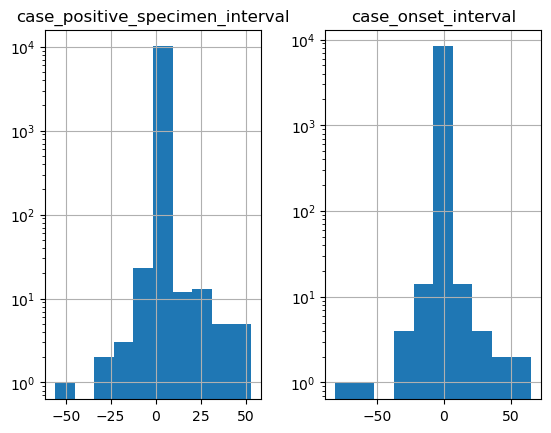

In [23]:
data[continuous_columns].hist(log = True)
plt.savefig('continuous_histogramsplots_summary.pdf')
plt.savefig('continuous_histogramsplots_summary.jpg')

### Plot histograms individual for all the continuous features

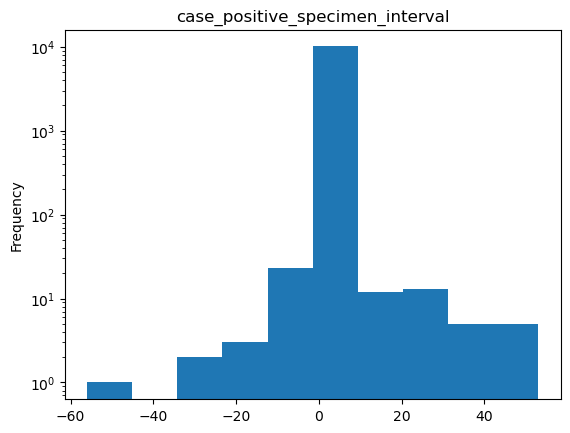

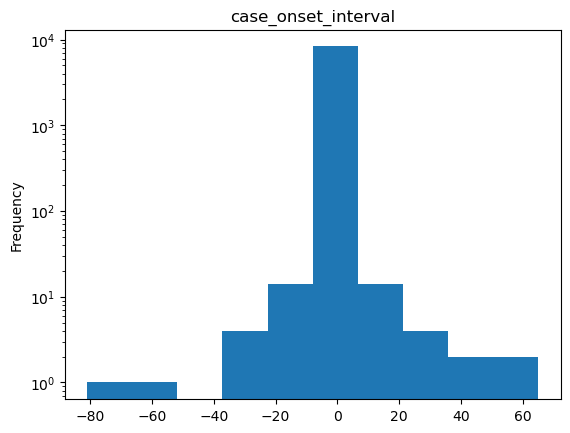

In [24]:
with PdfPages('continuous_histogramplots.pdf') as pp:
    for col in continuous_columns:
            f = data[col].plot(kind='hist', logy= True)
            plt.title(col)
            plt.ylabel('Frequency')
            pp.savefig(f.get_figure())
            plt.show() 

### Plot box plots summary for all the continuous features

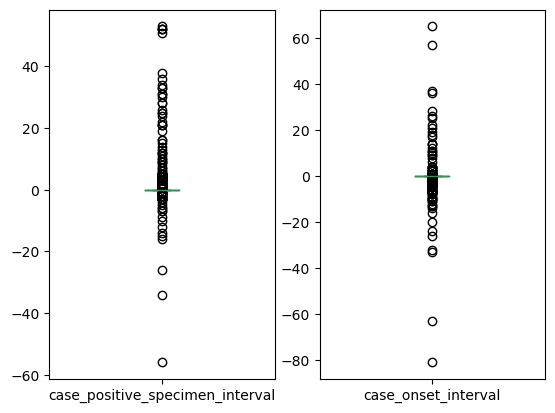

In [25]:
data[continuous_columns].plot(kind='box', subplots=True,sharex=False, sharey=False)
plt.savefig("continuous_boxplots_summary.pdf")
plt.savefig("continuous_boxplots_summary.jpg")

From the boxplots we can quickly see outliers in some of the features

### Plot box plots individual for all the continuous features

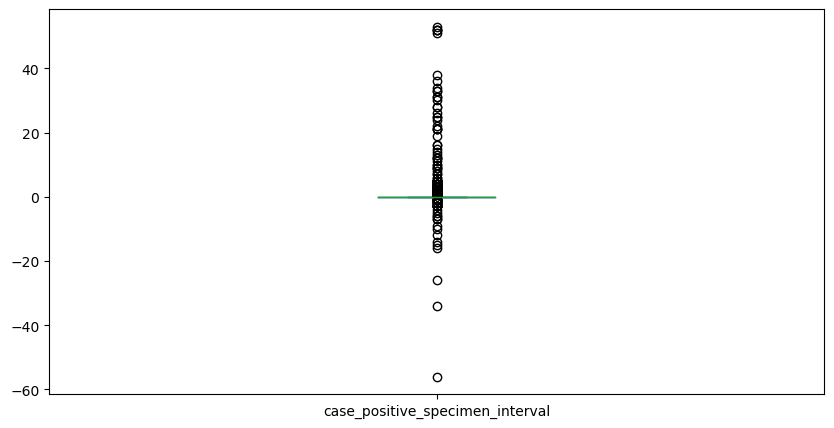

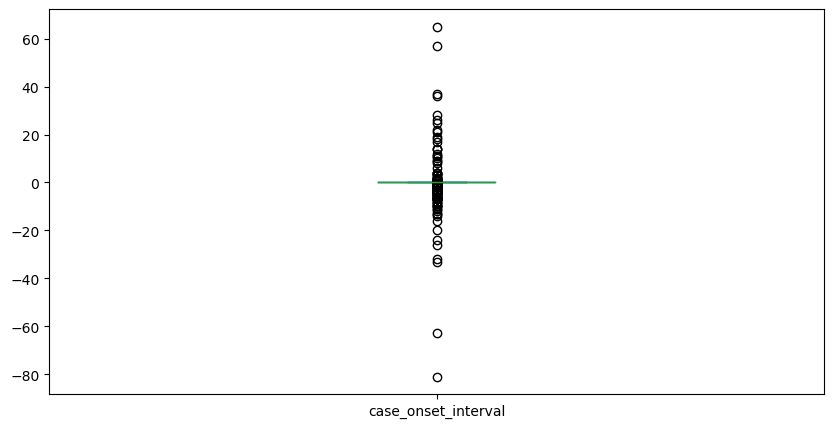

In [26]:
# Plot box plots for all the continuous features and save in a PDF file
with PdfPages('continuous_boxplots.pdf') as pp:
    for col in continuous_columns:
        f = data[col].plot(kind='box', figsize=(10,5))
        pp.savefig(f.get_figure())
        plt.show()    

### Plot bar plots summary for all the categorical features

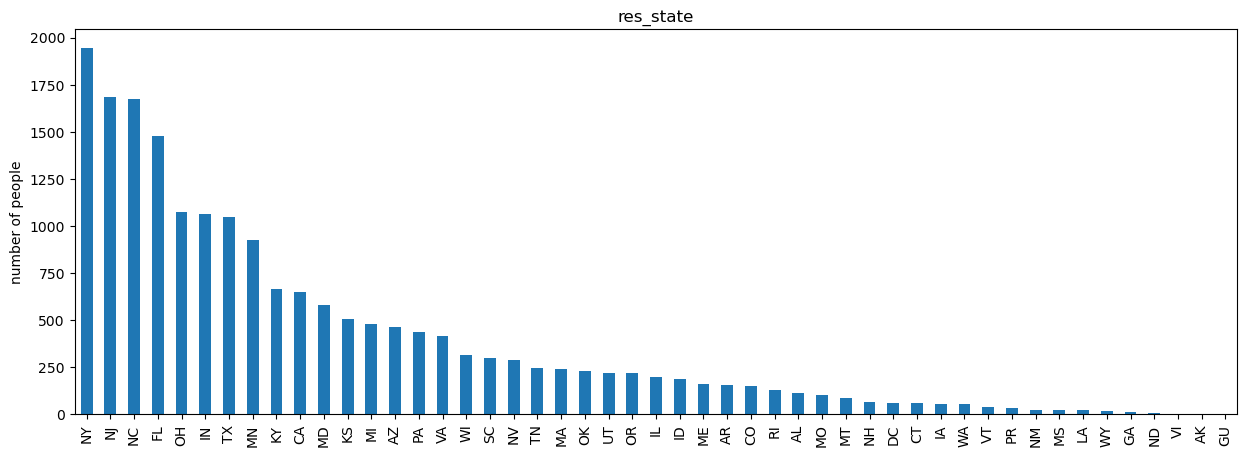

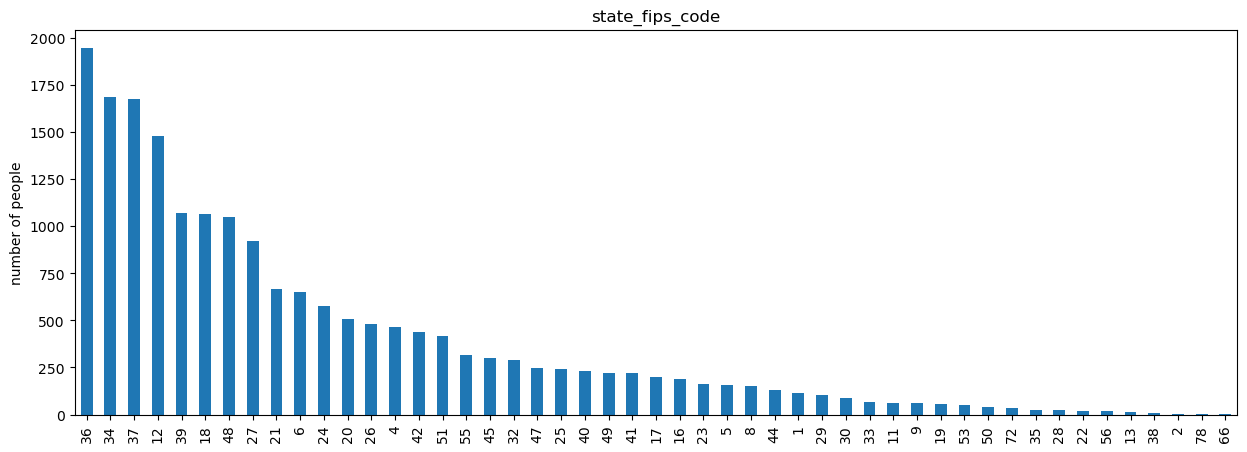

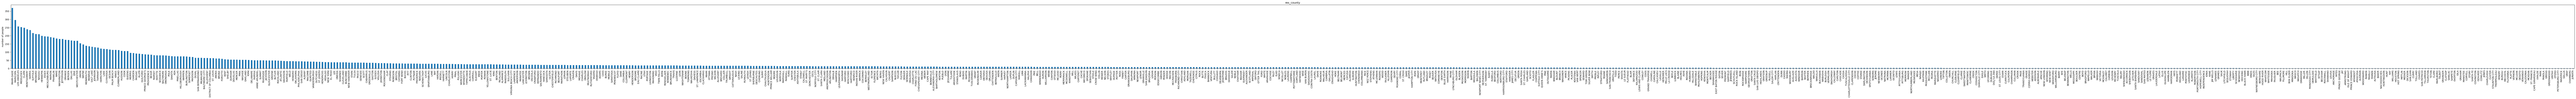

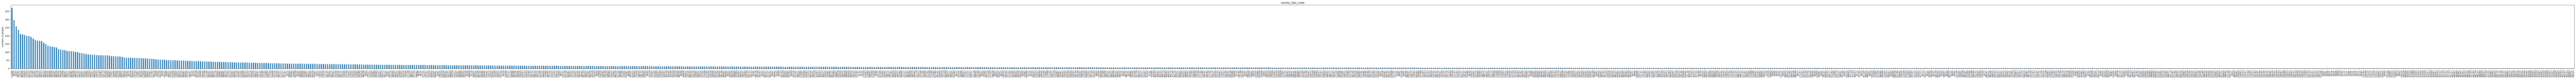

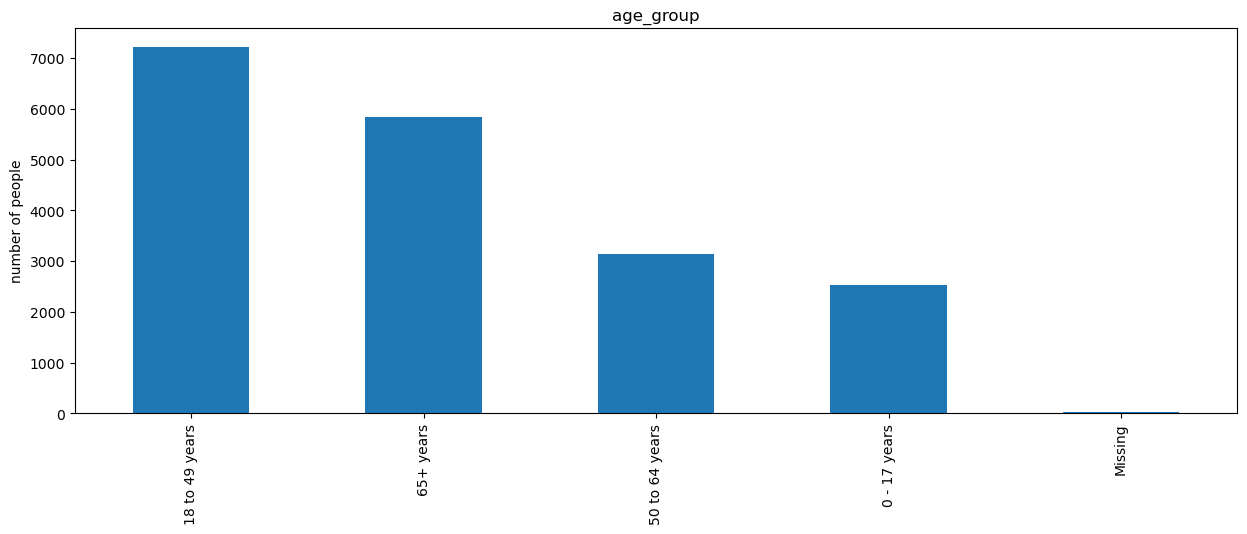

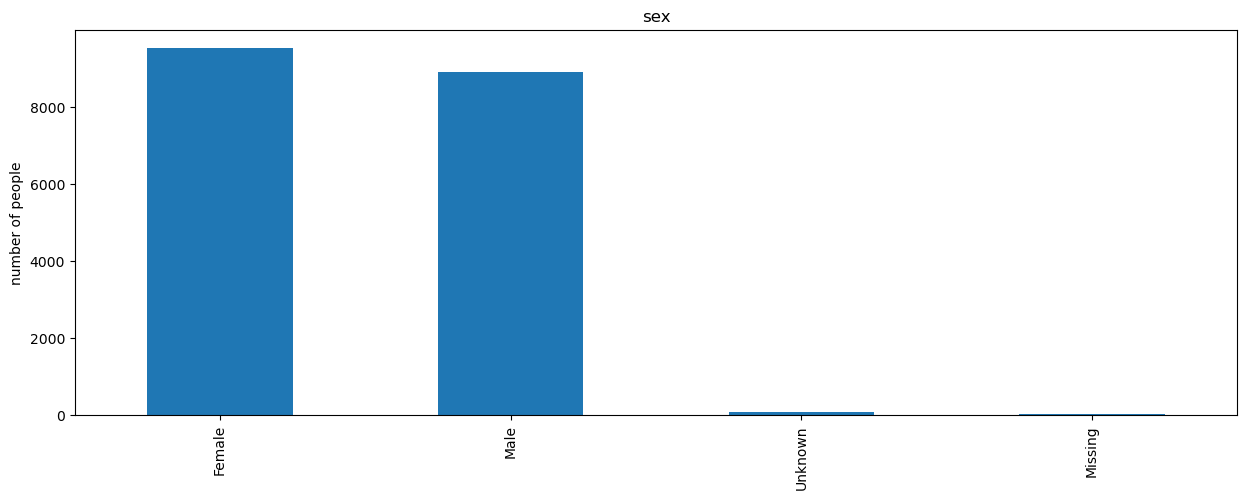

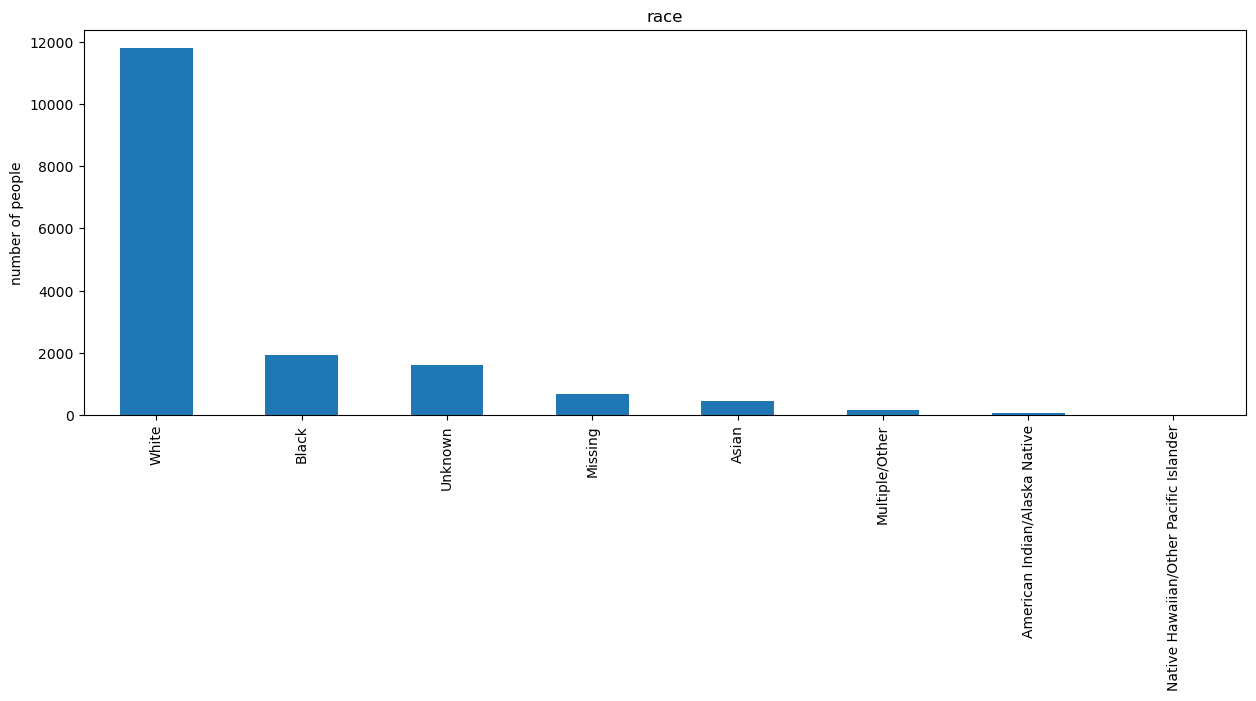

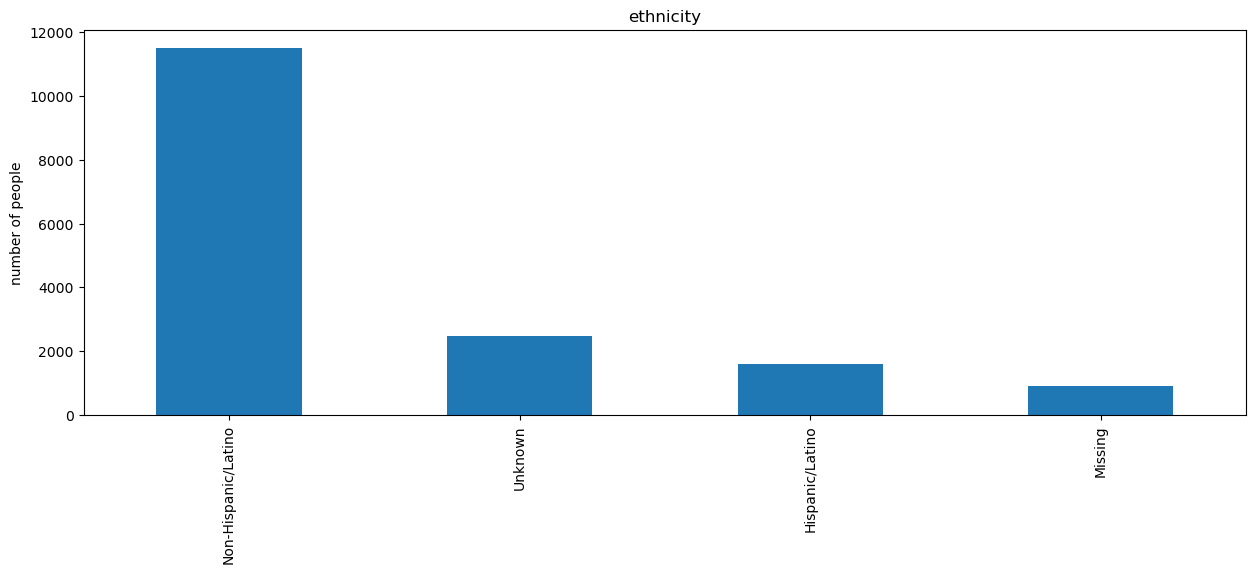

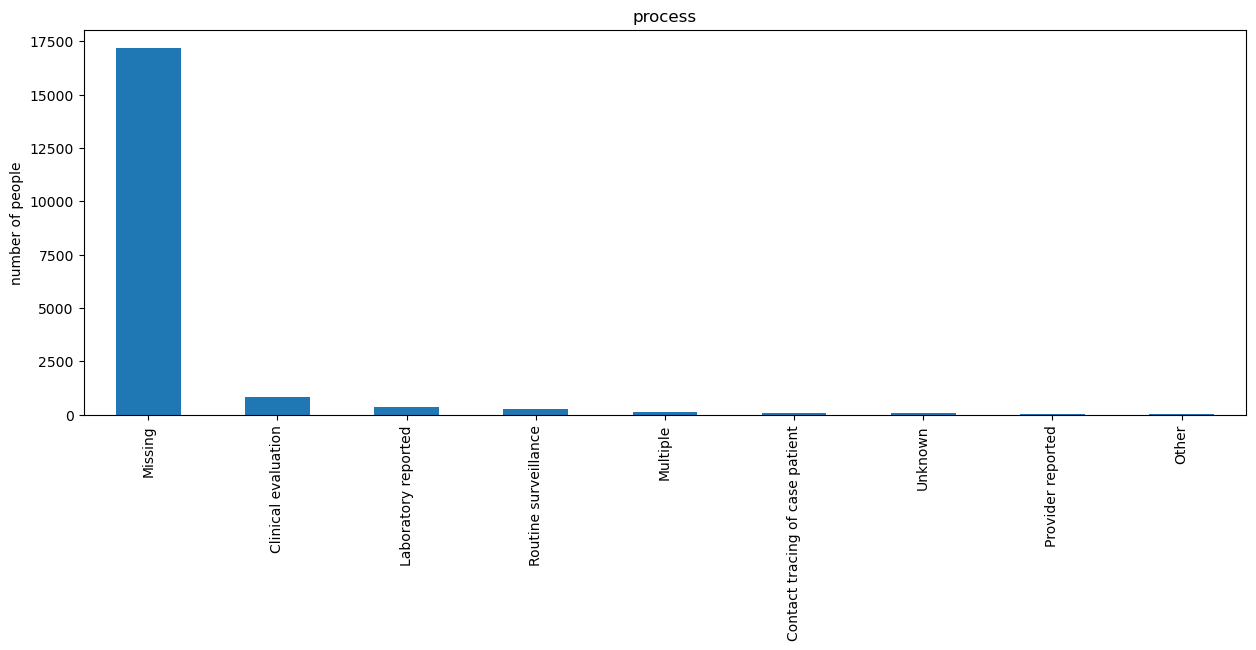

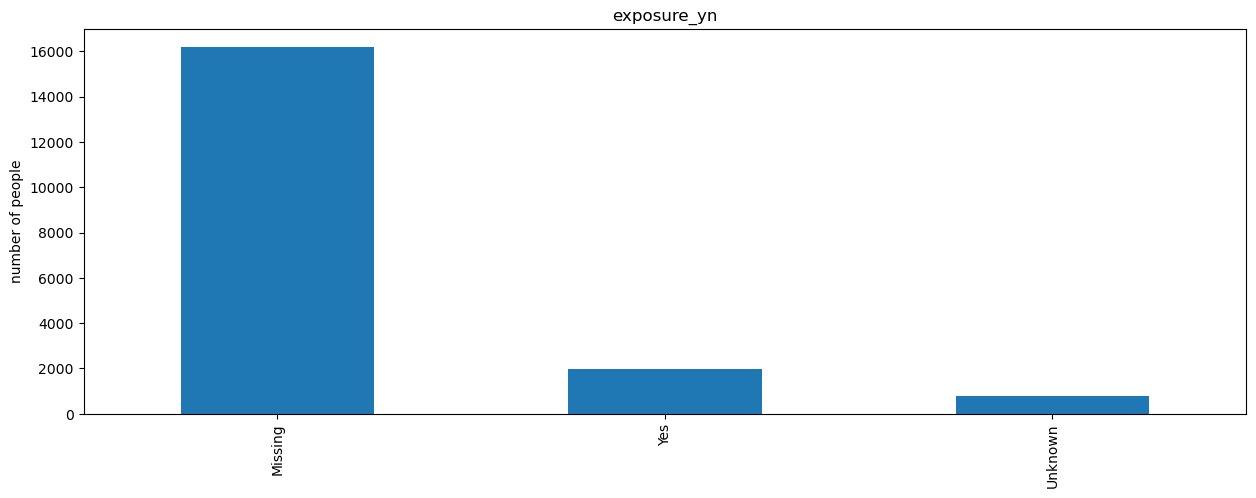

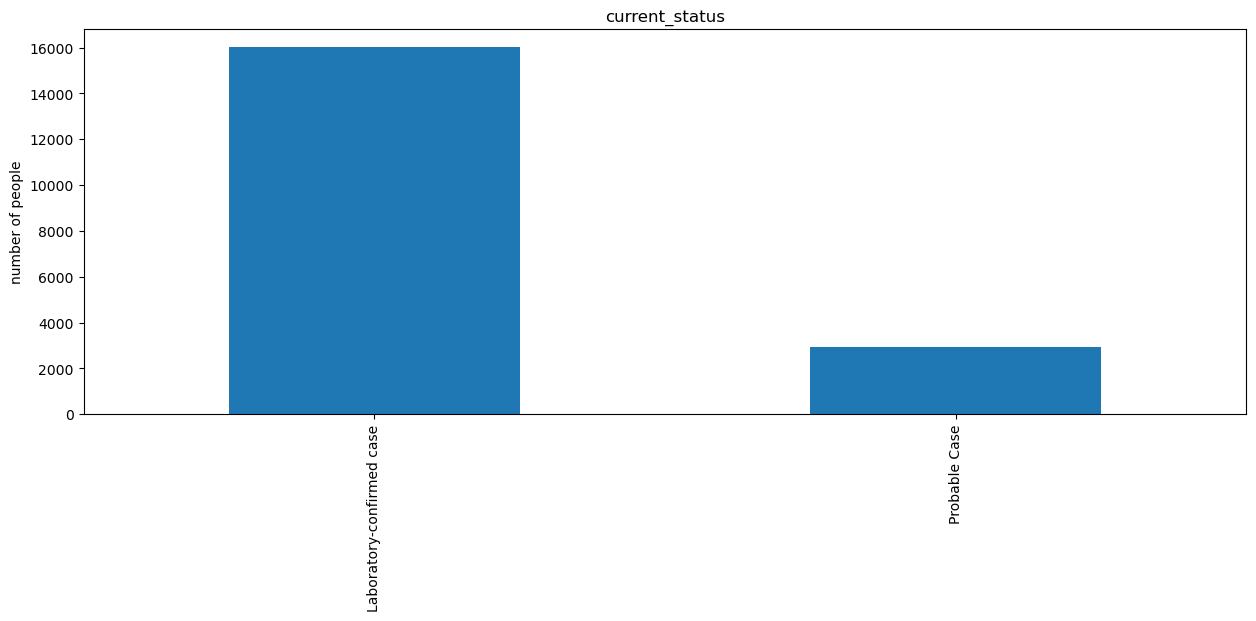

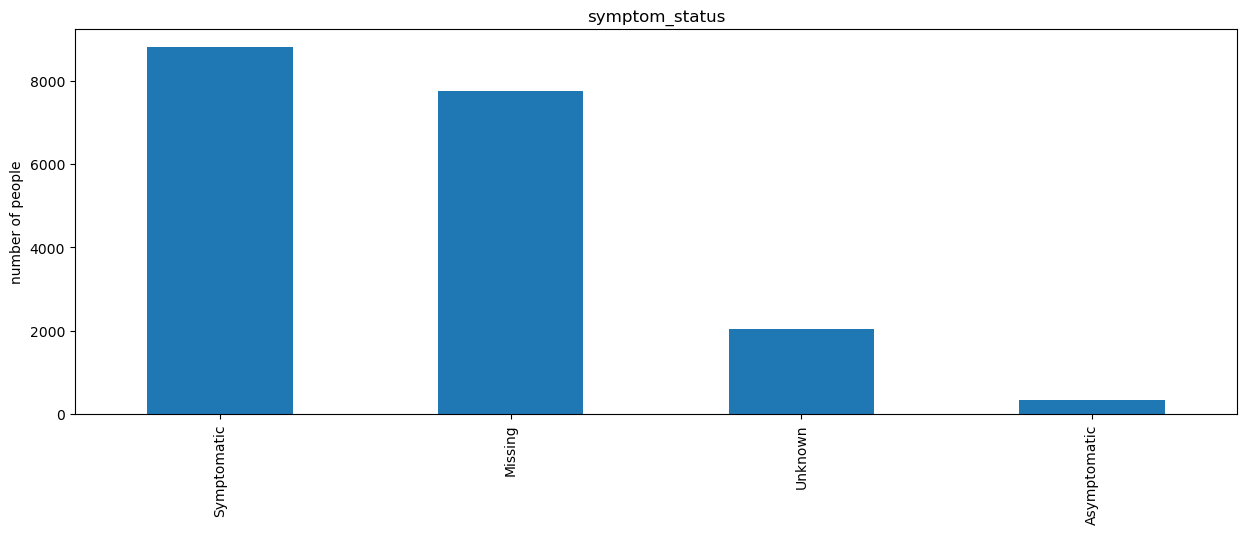

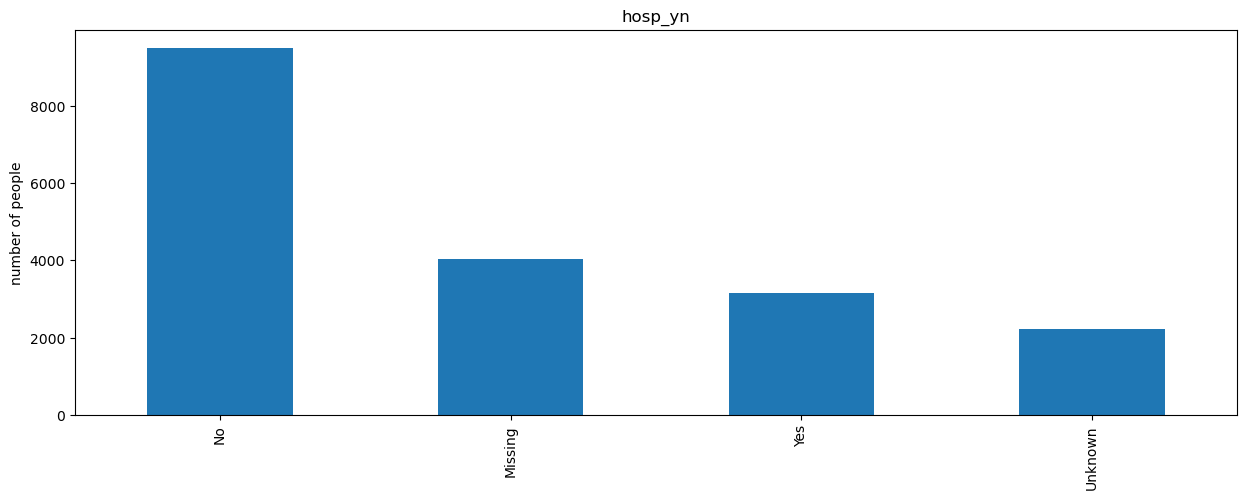

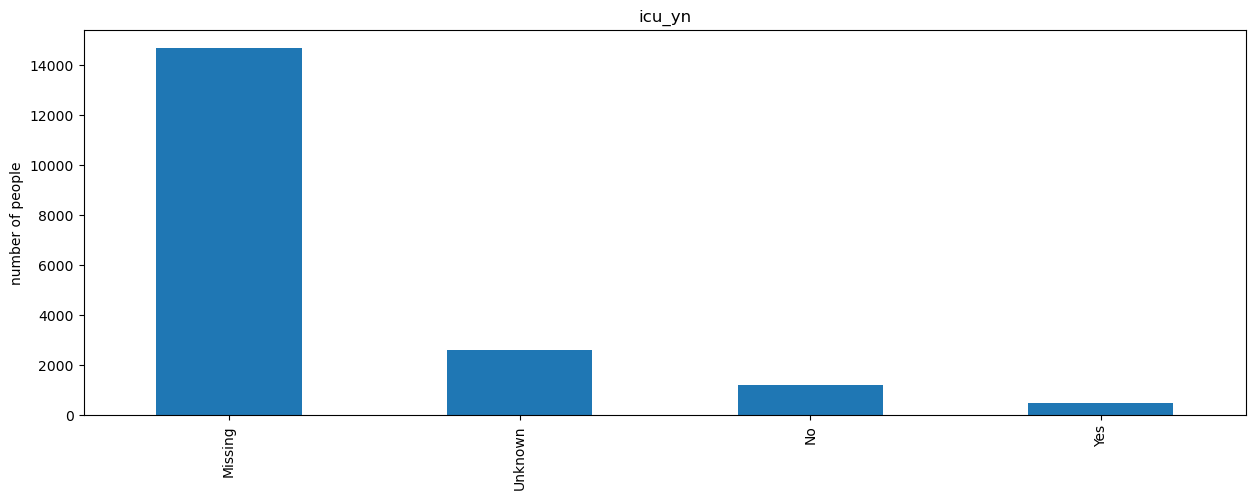

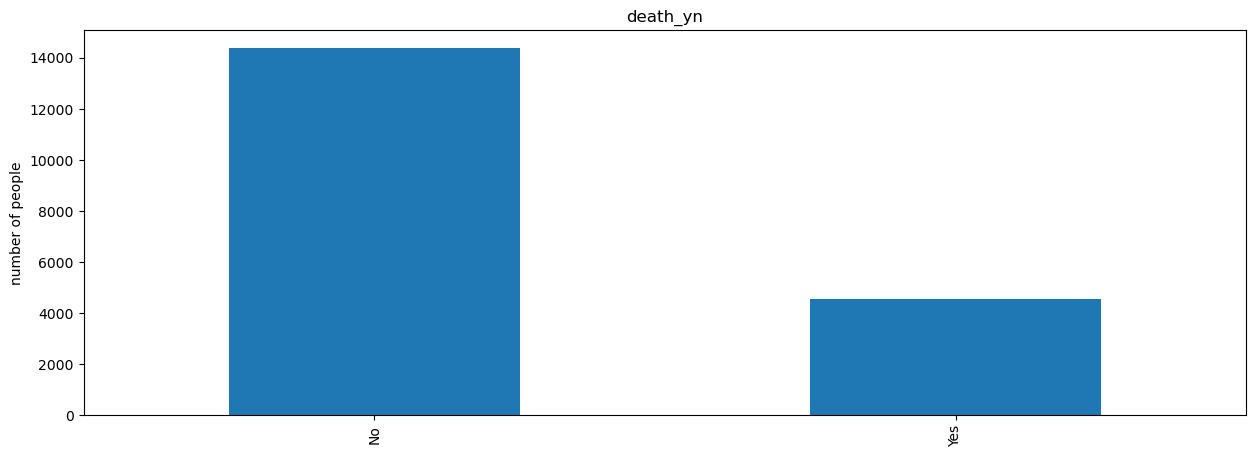

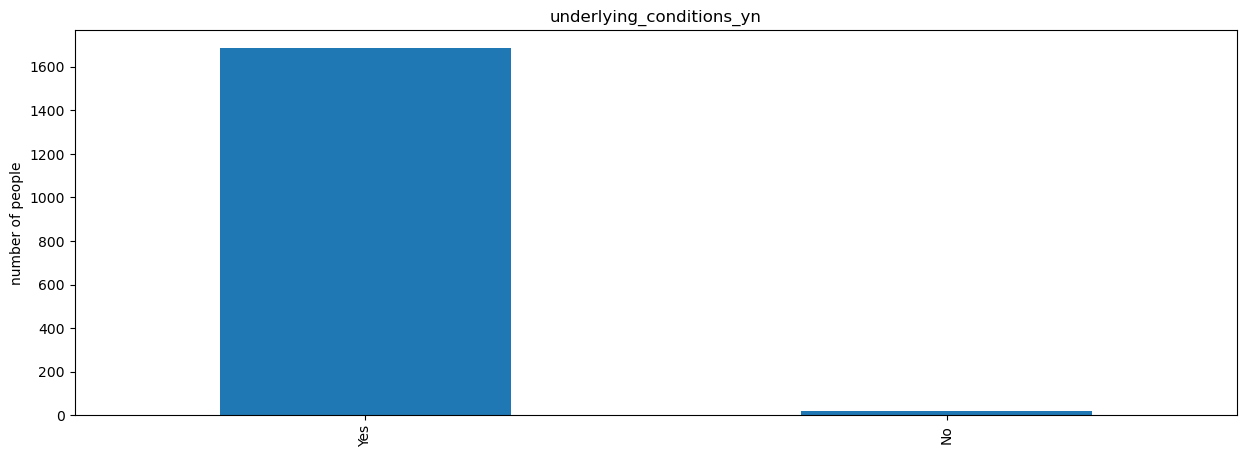

In [27]:
# Plot bar plots for all the catagorical features and save them in a single PDF file
with PdfPages('categorical_barplots.pdf') as pp:
    for col in category_columns:
        if col == 'res_county' or col == 'county_fips_code':
            f = data[col].value_counts().plot(kind='bar', figsize=(200,5))
        else:
            f = data[col].value_counts().plot(kind='bar', figsize=(15,5))
        plt.title(col)
        plt.ylabel('number of people')
        pp.savefig(f.get_figure())
        plt.show()

### Plot bar plots for each state

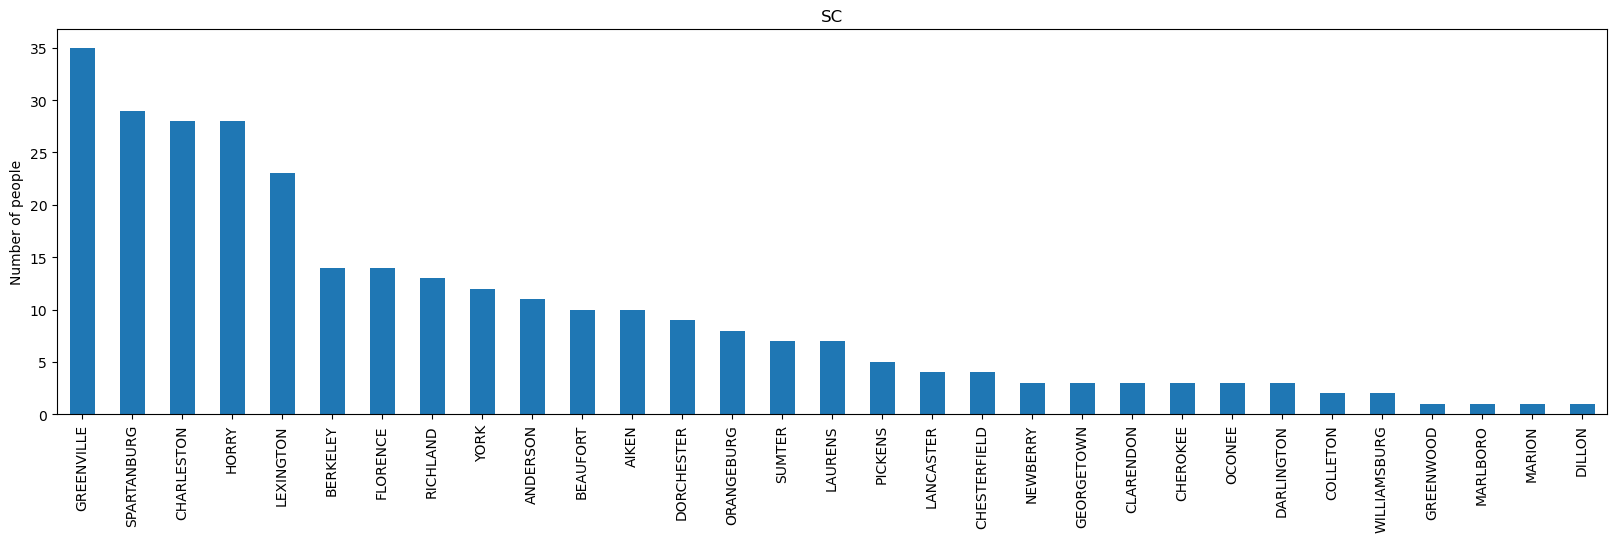

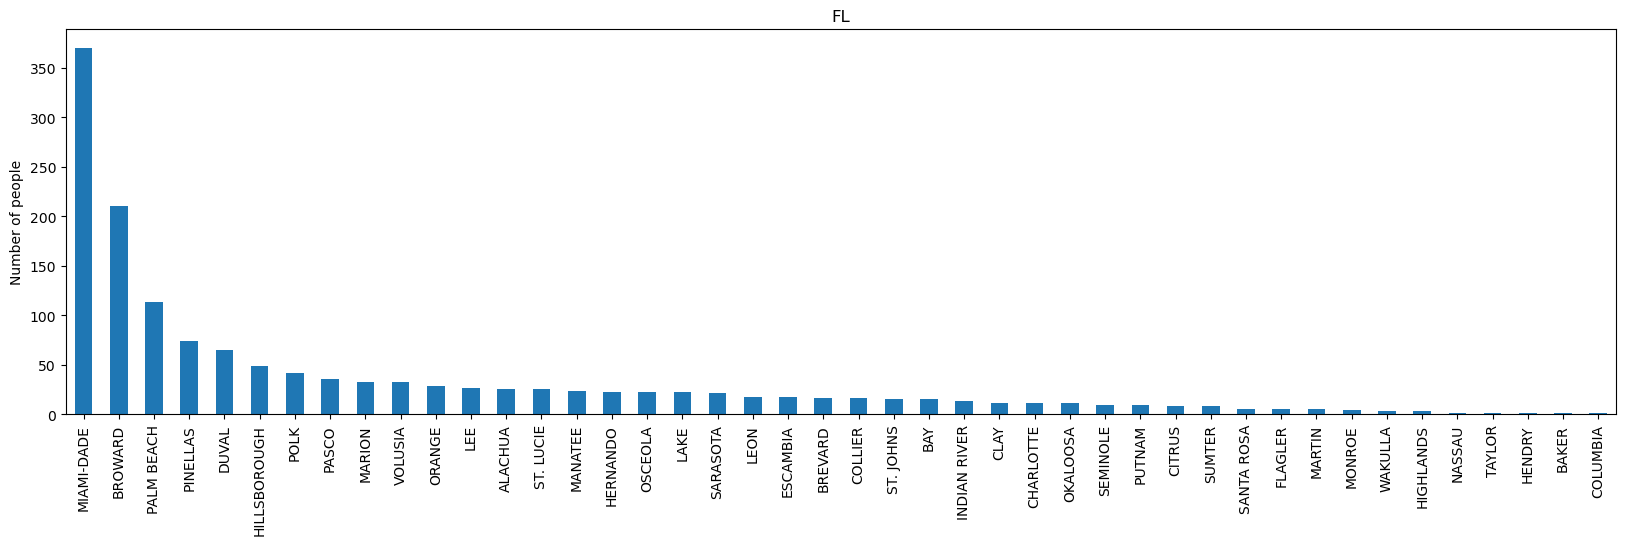

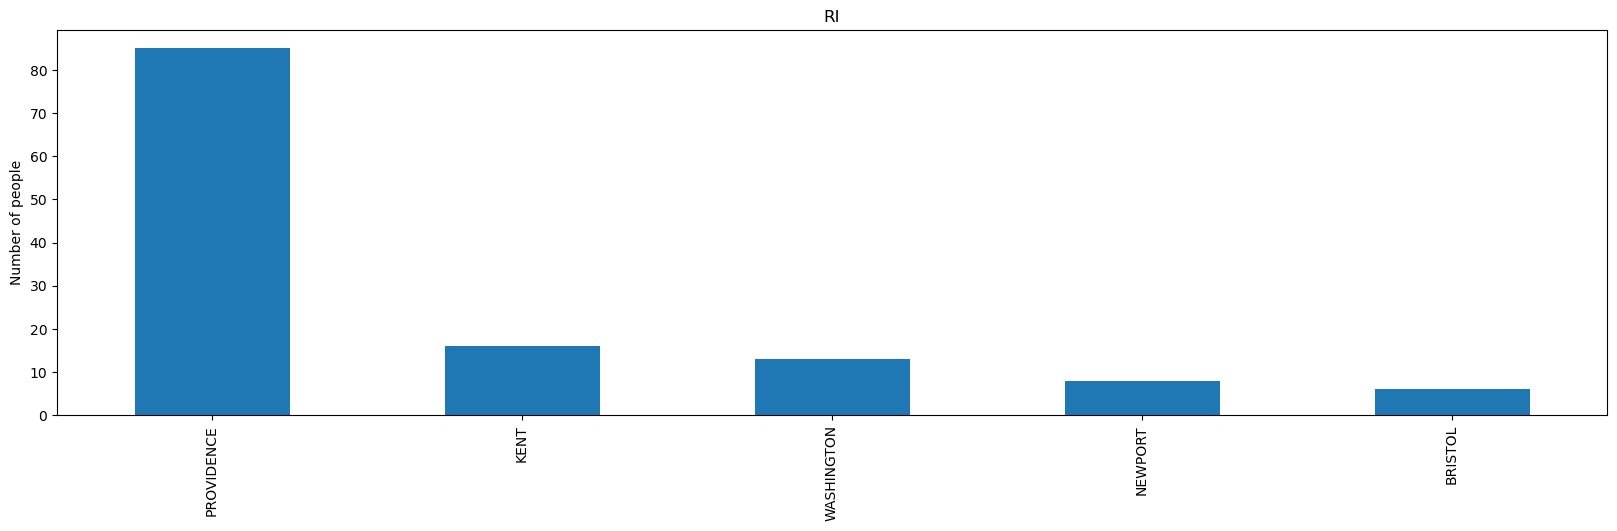

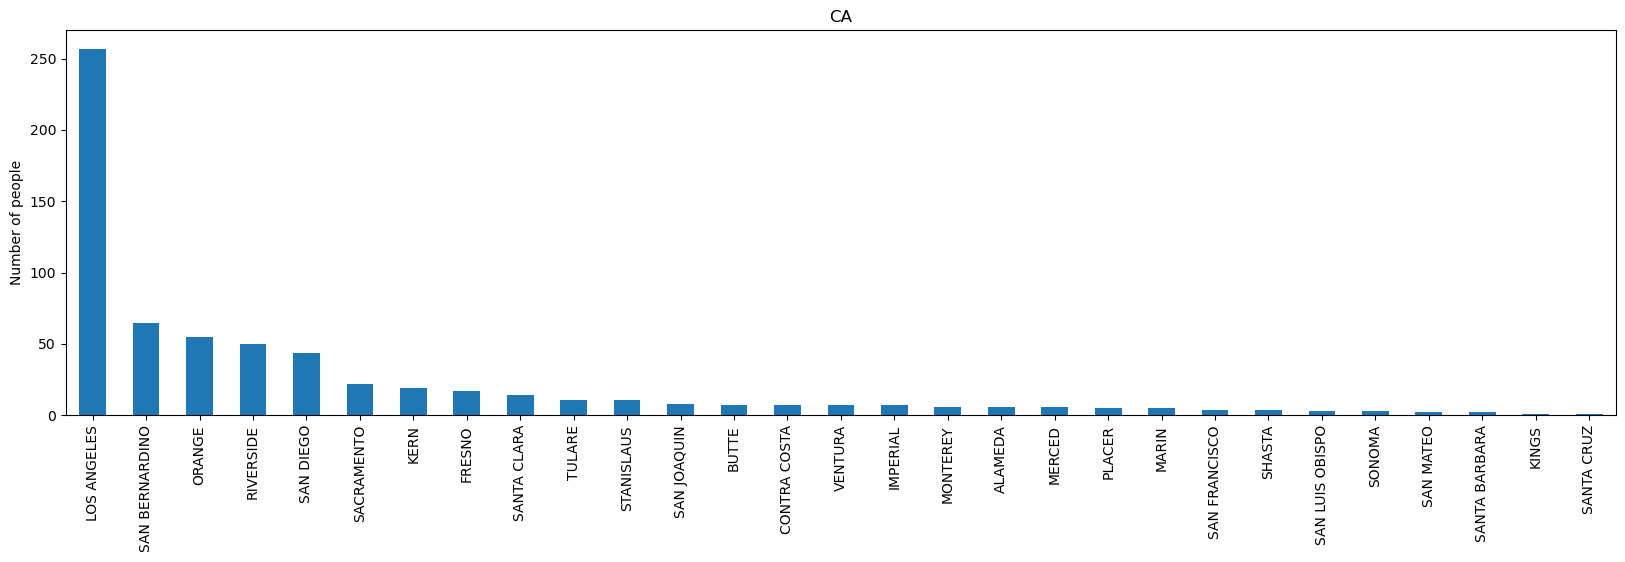

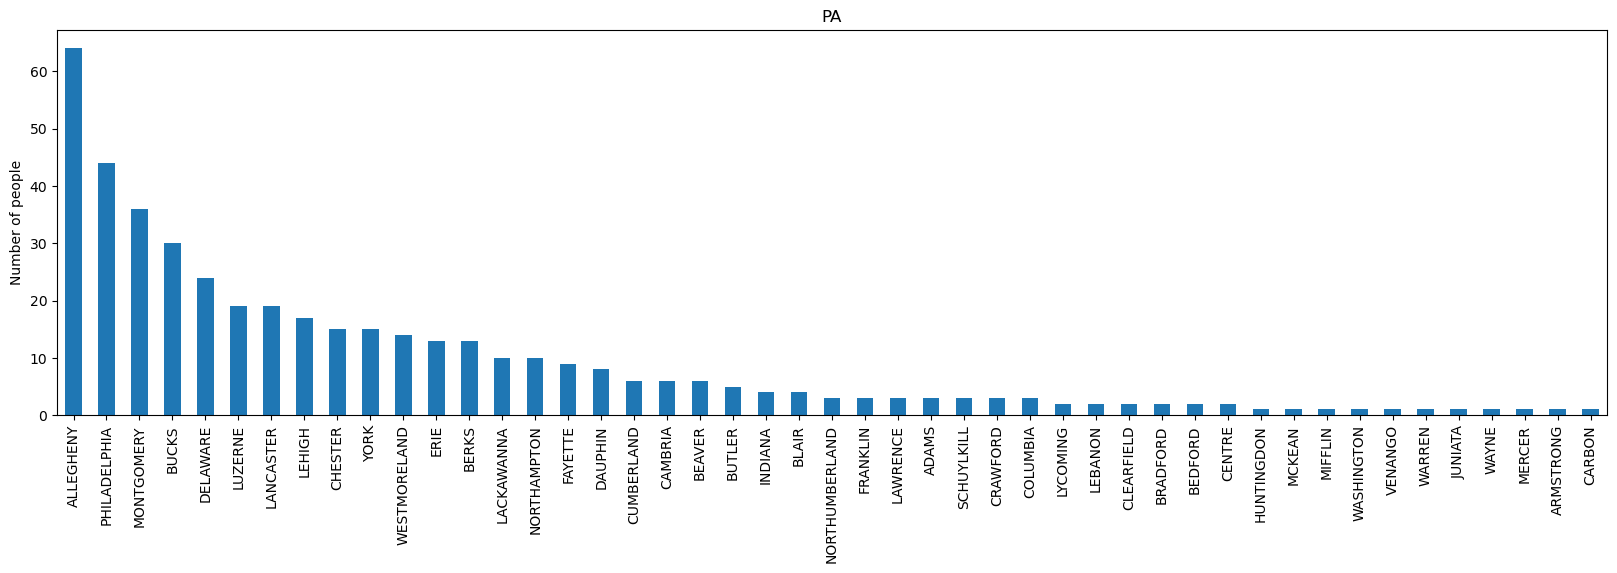

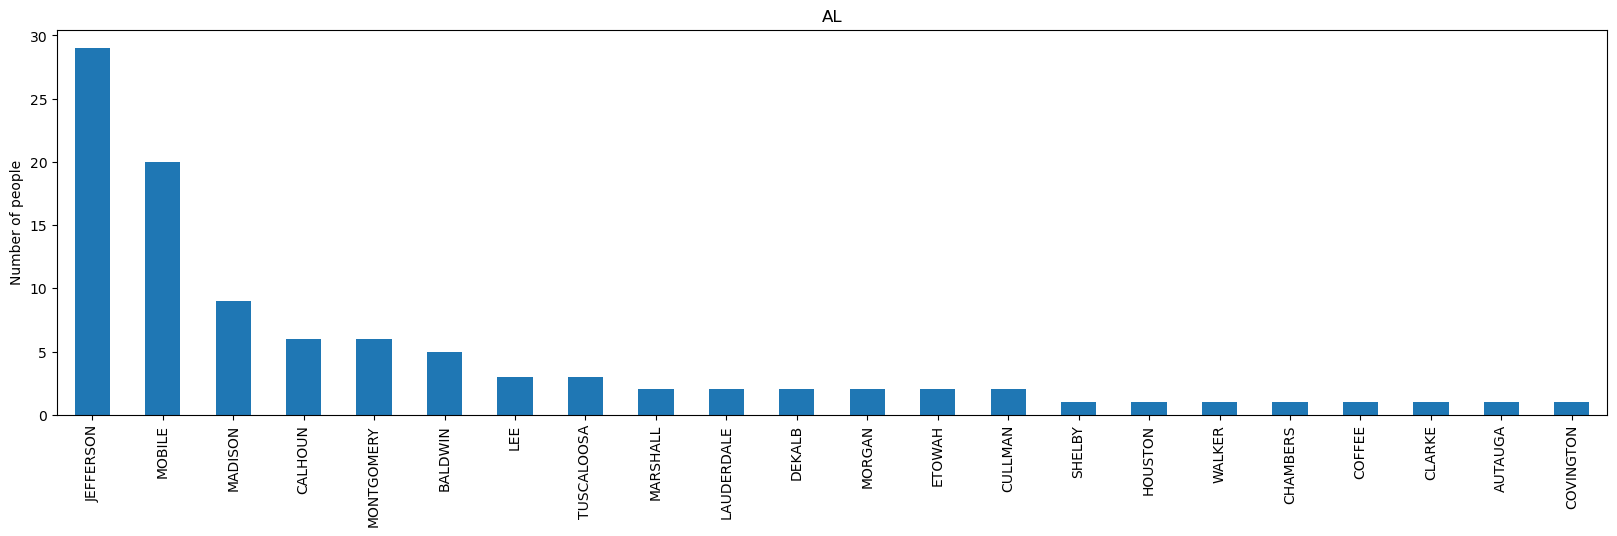

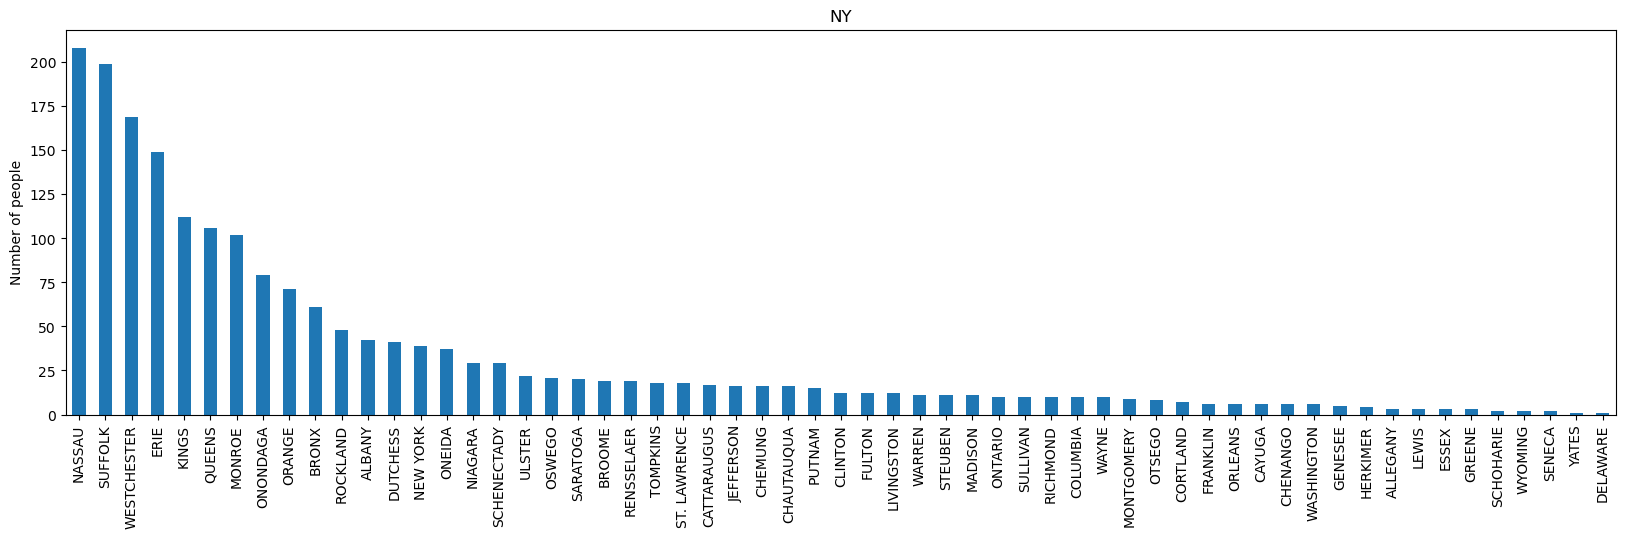

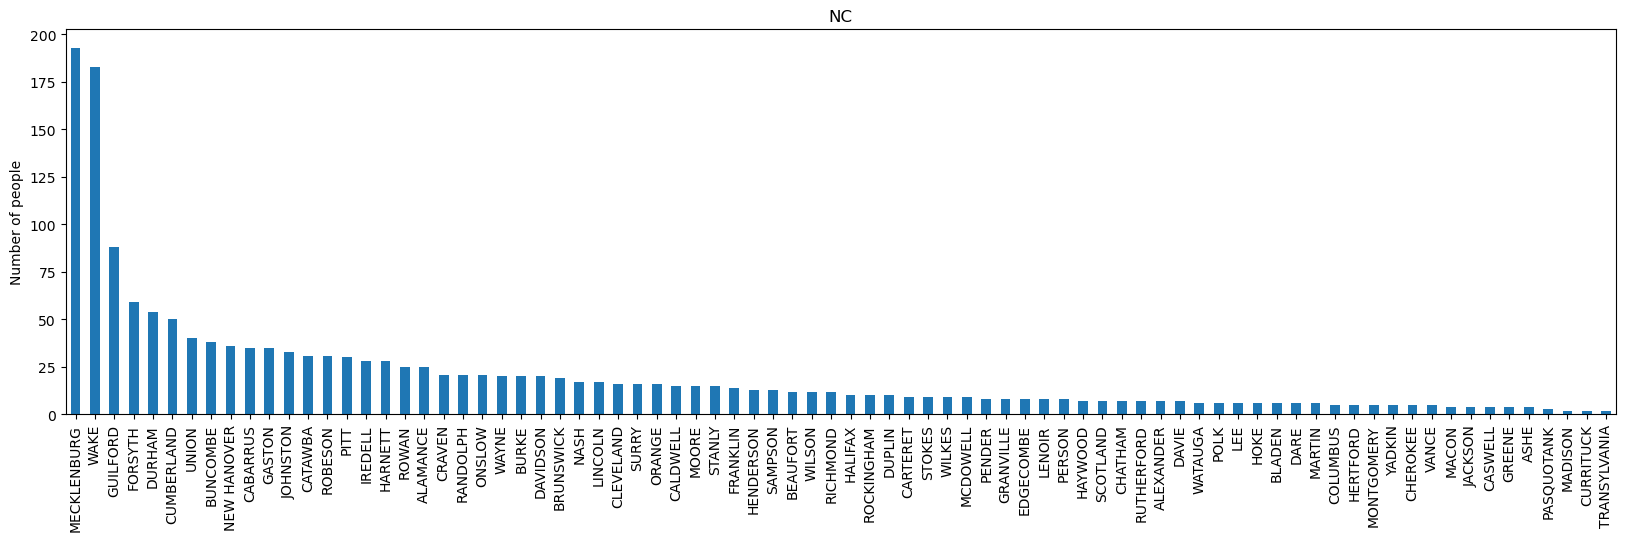

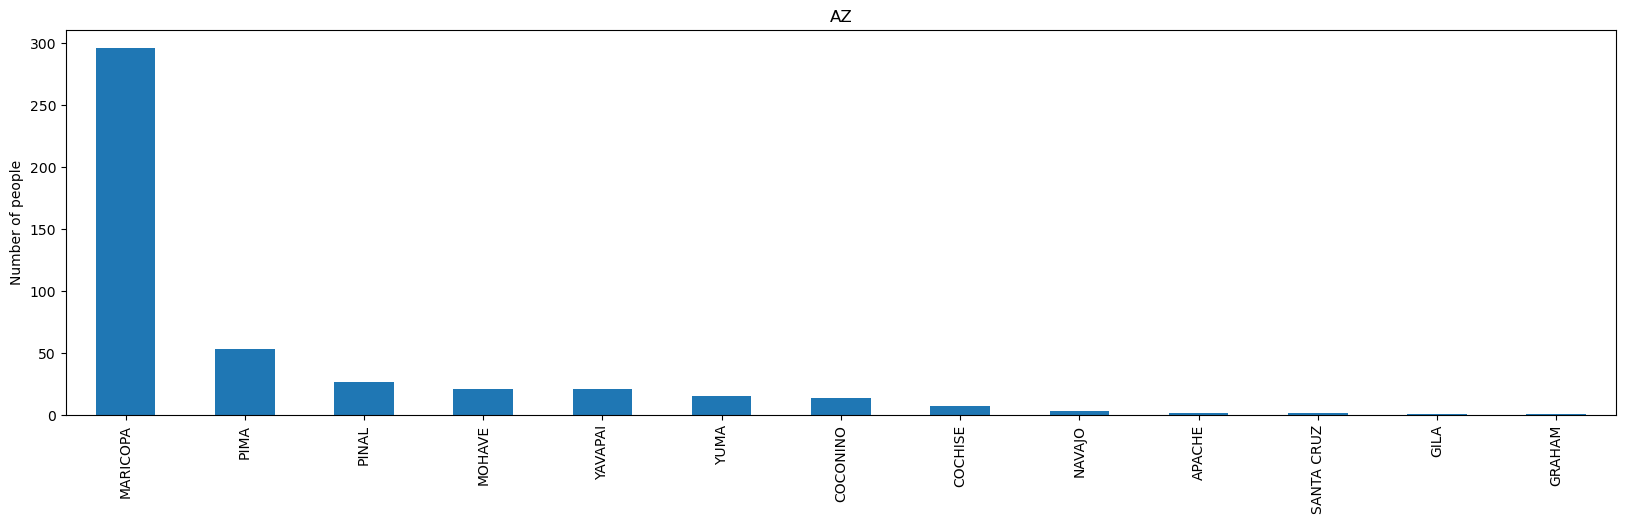

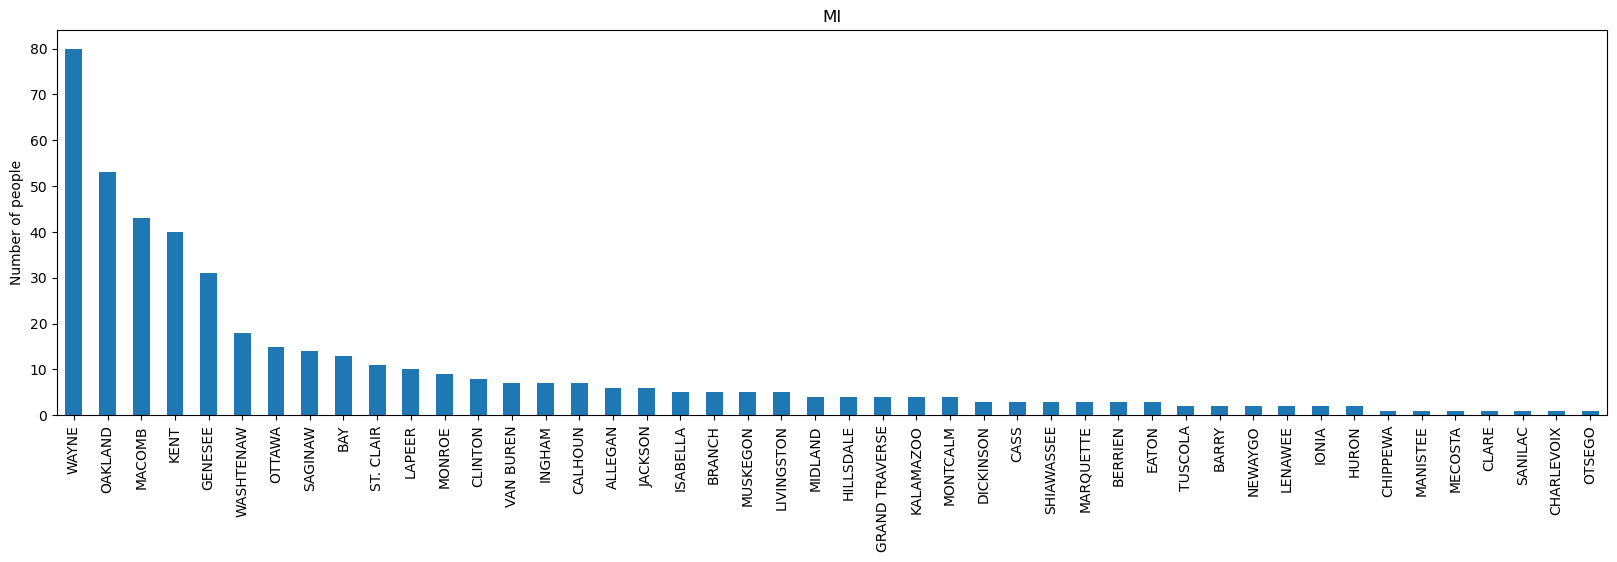

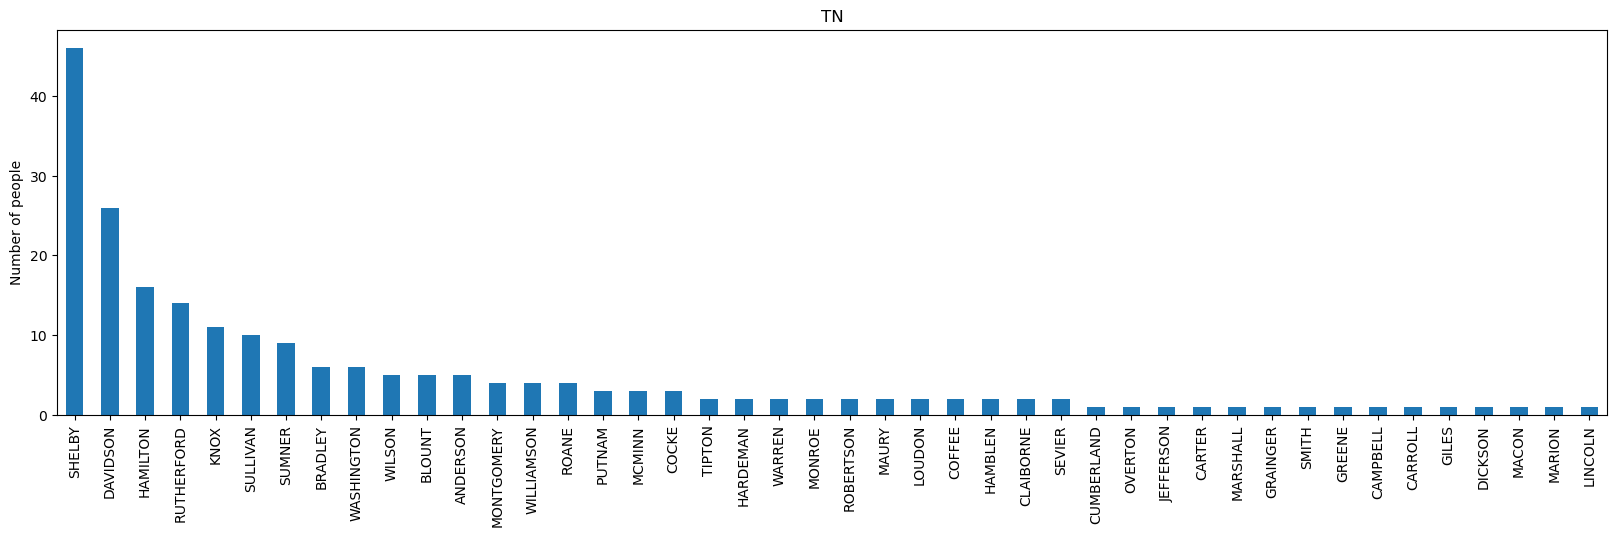

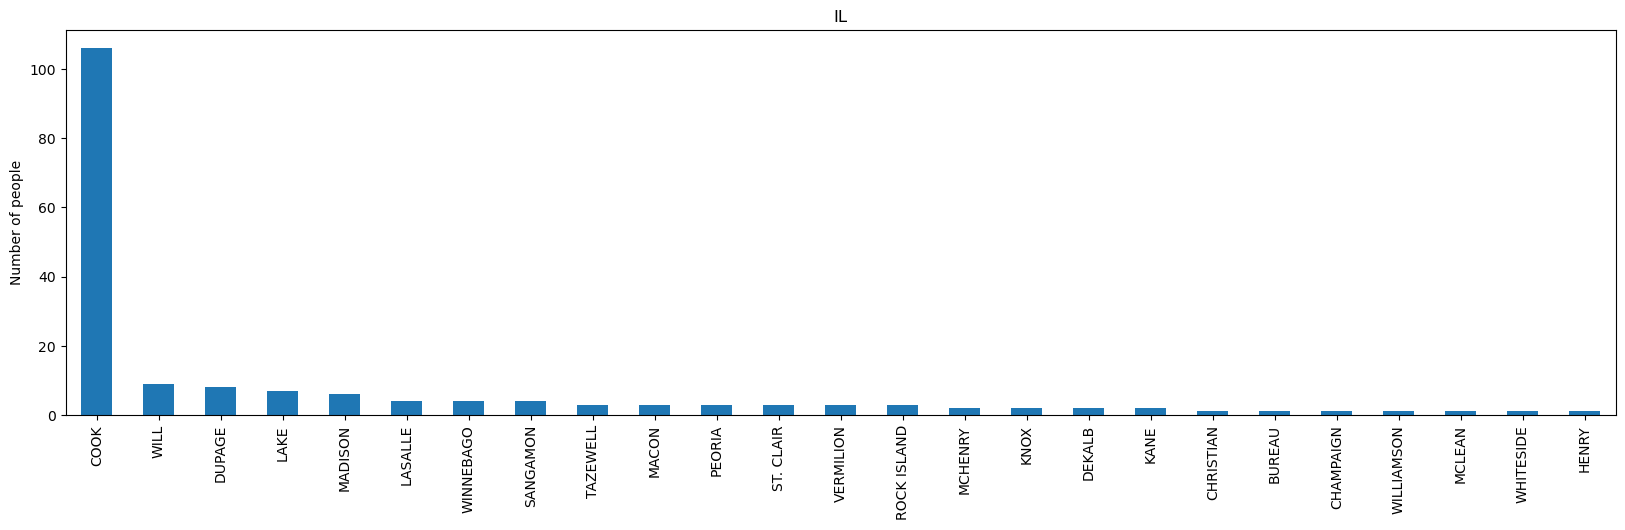

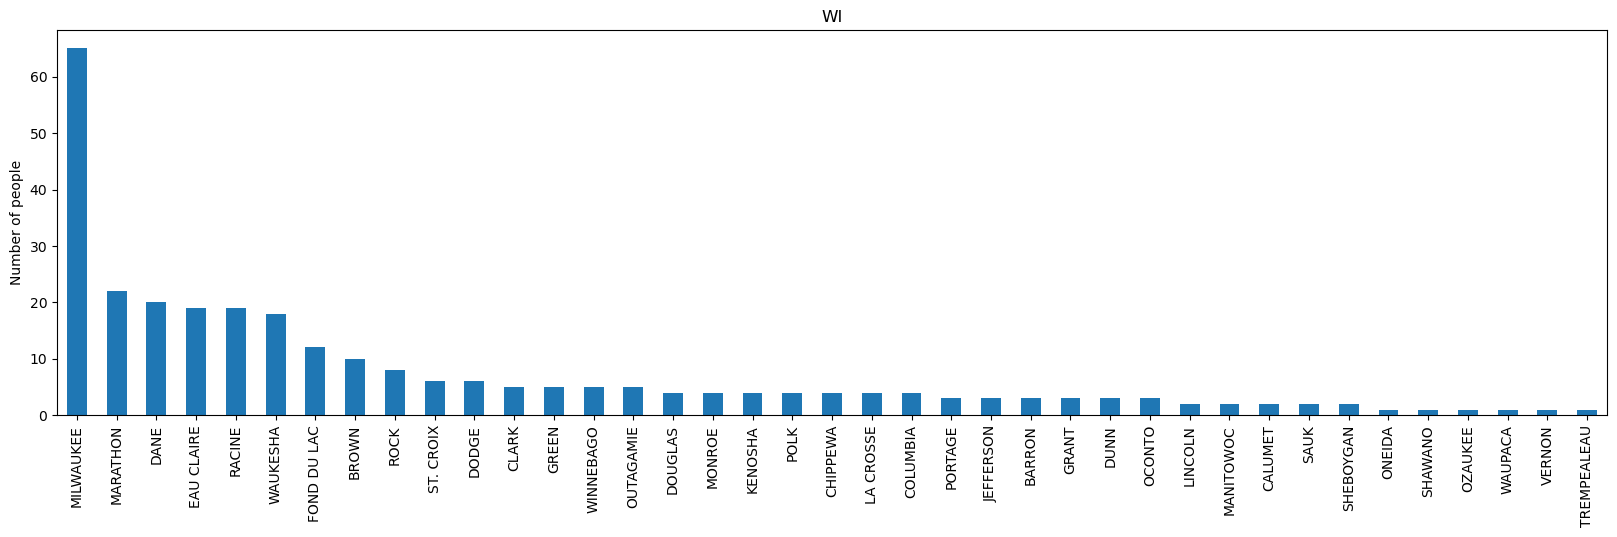

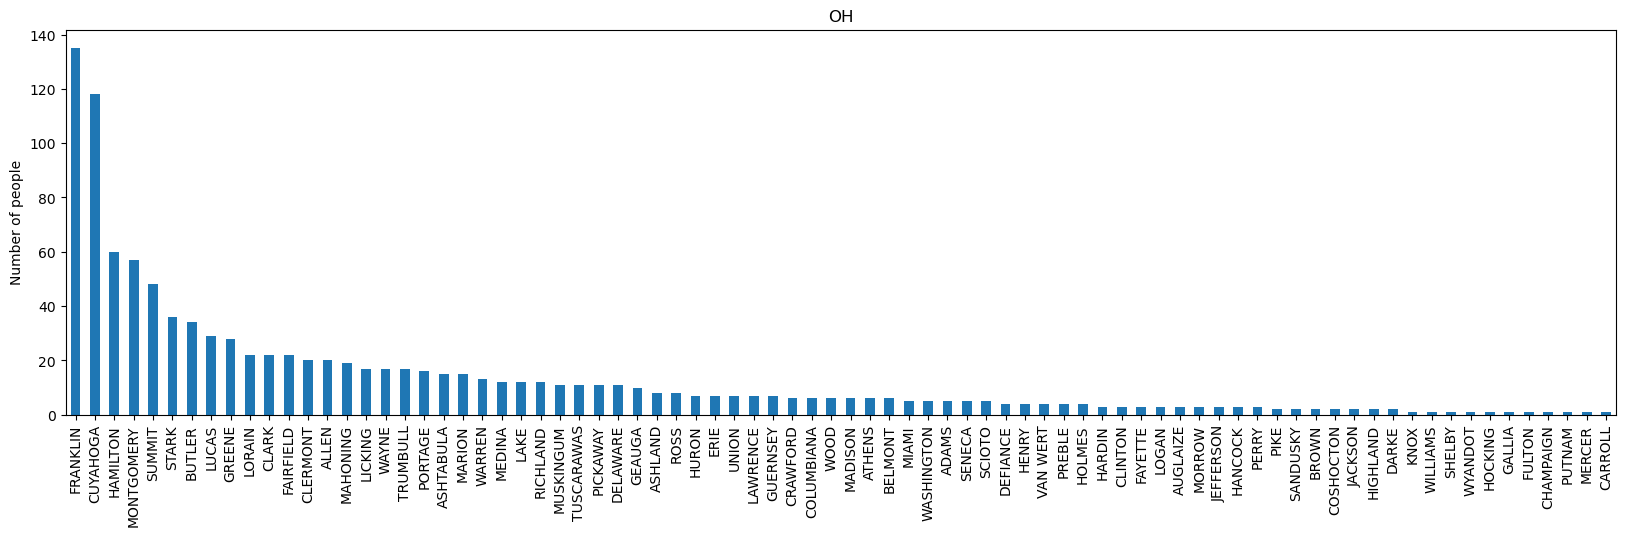

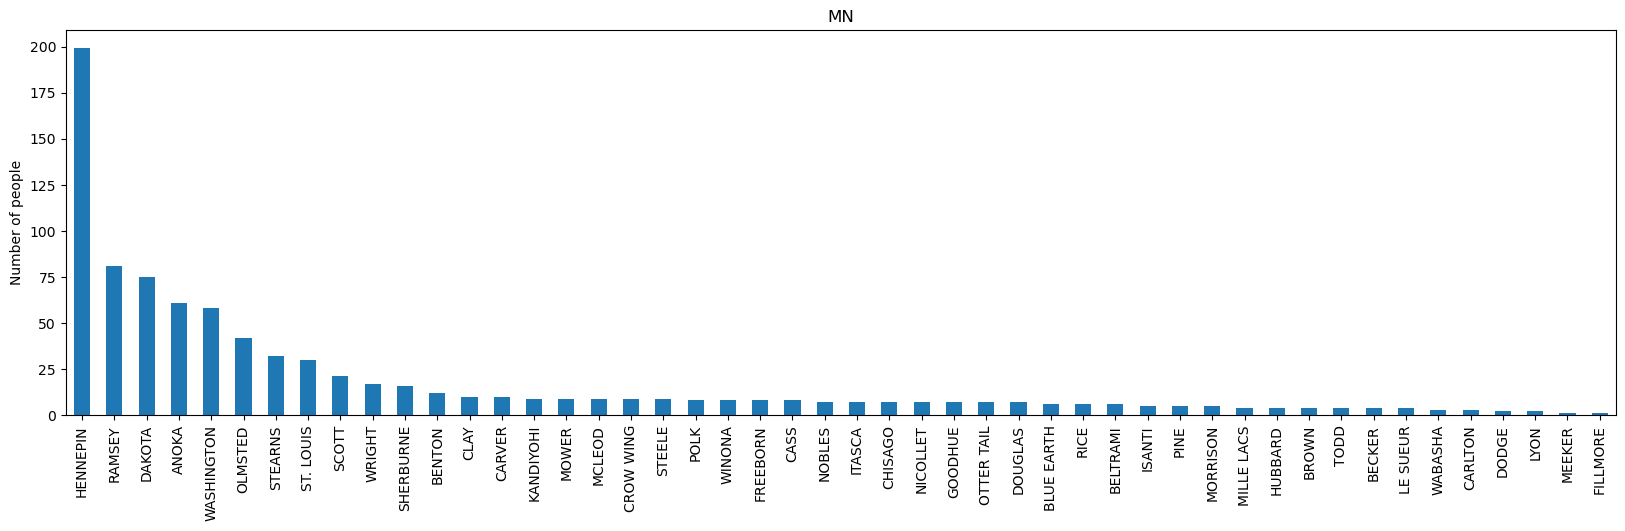

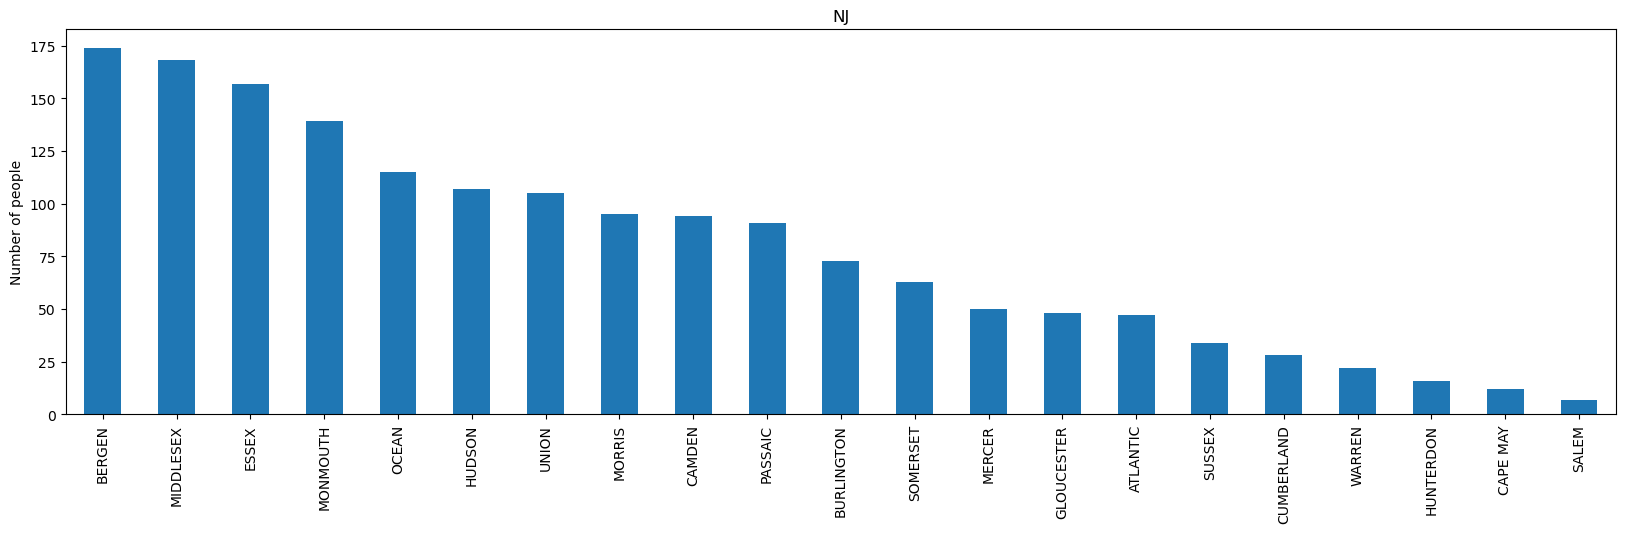

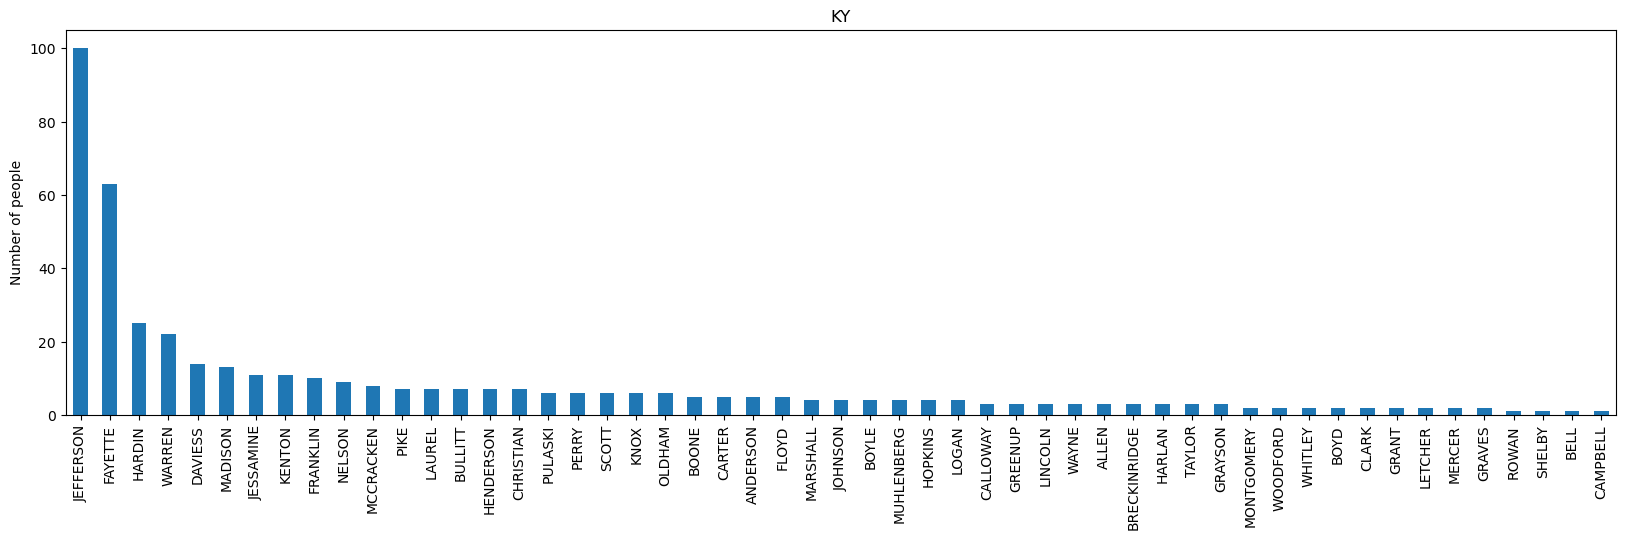

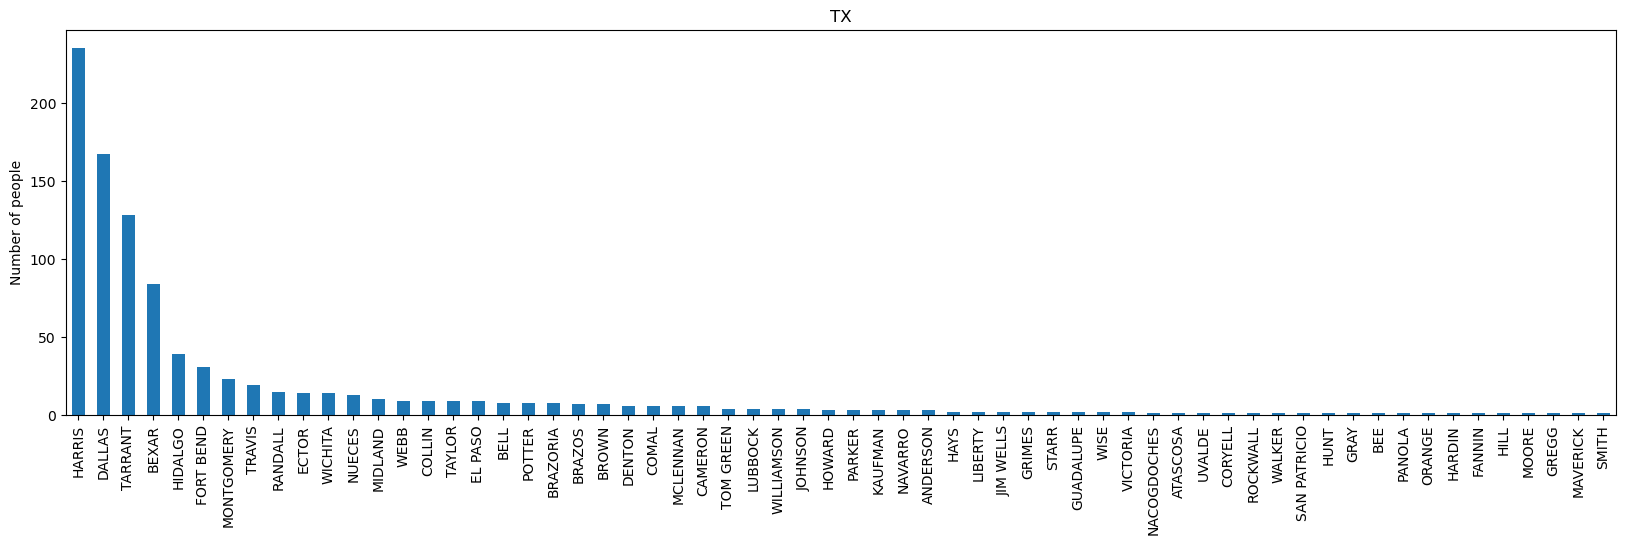

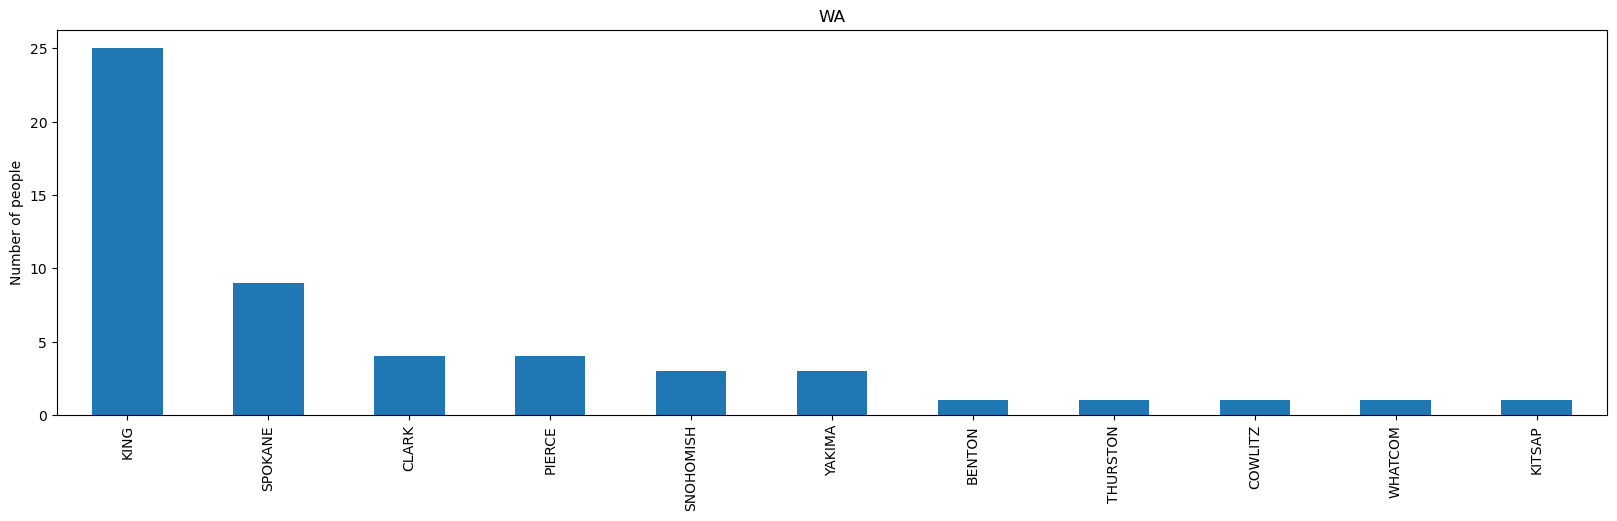

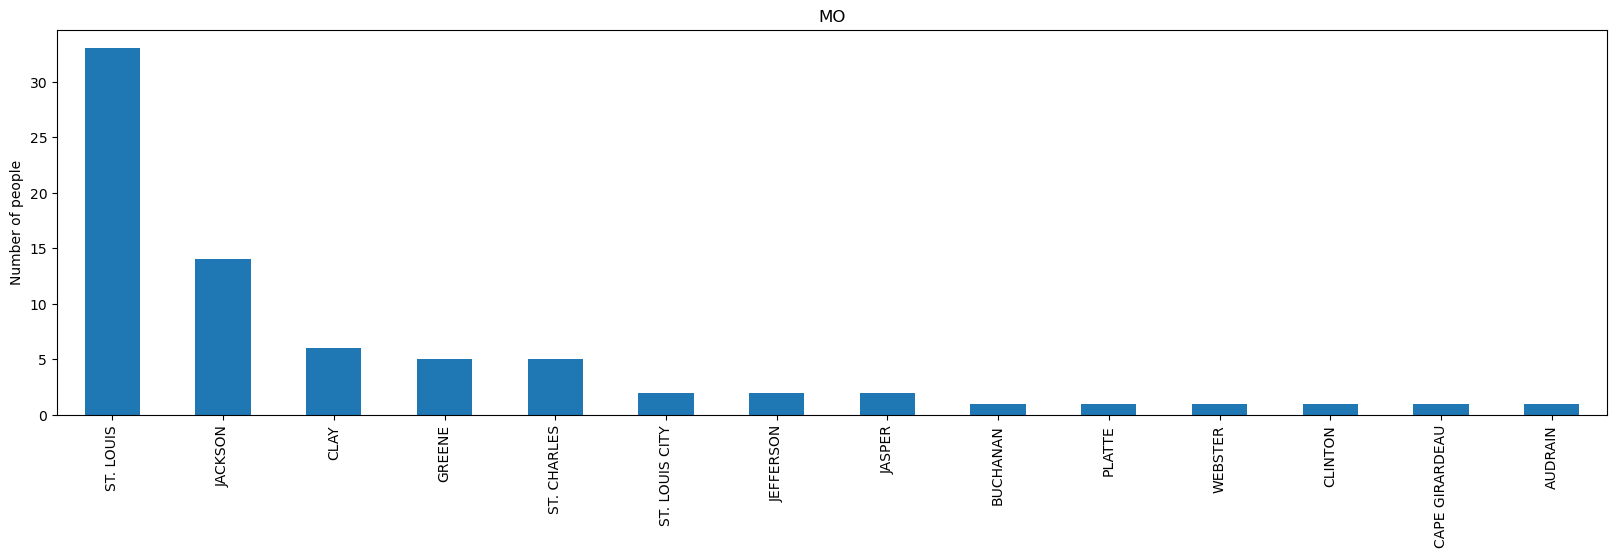

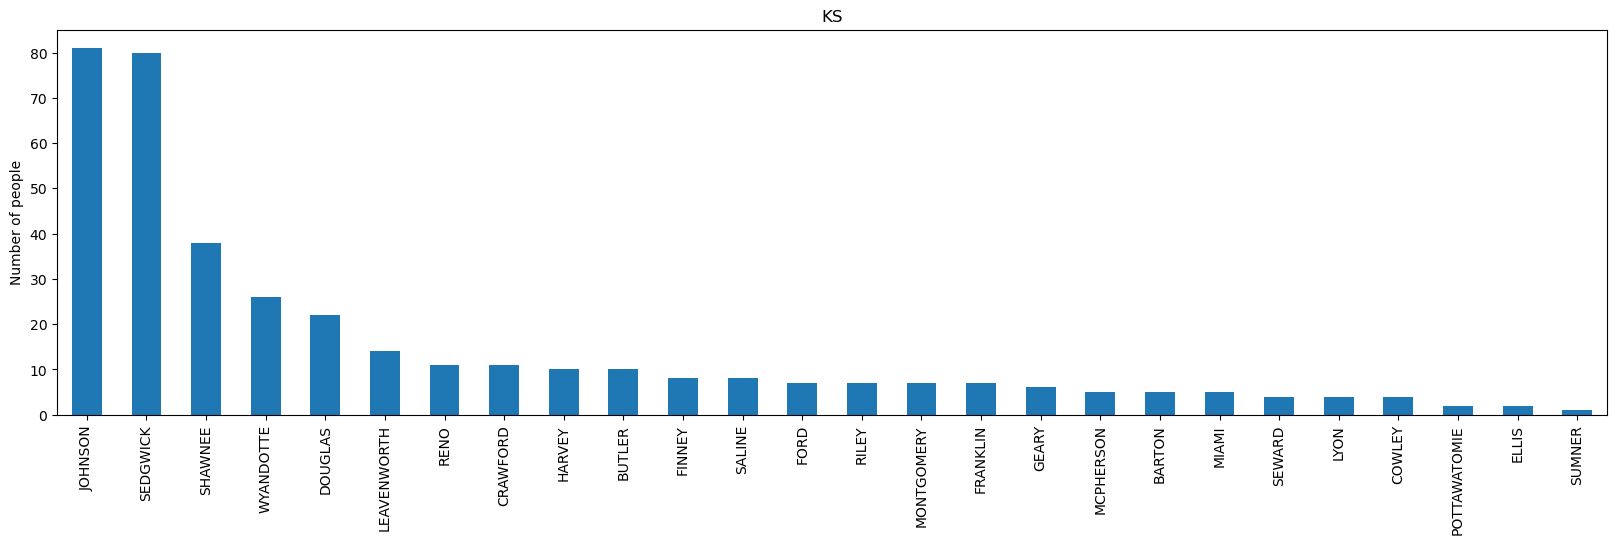

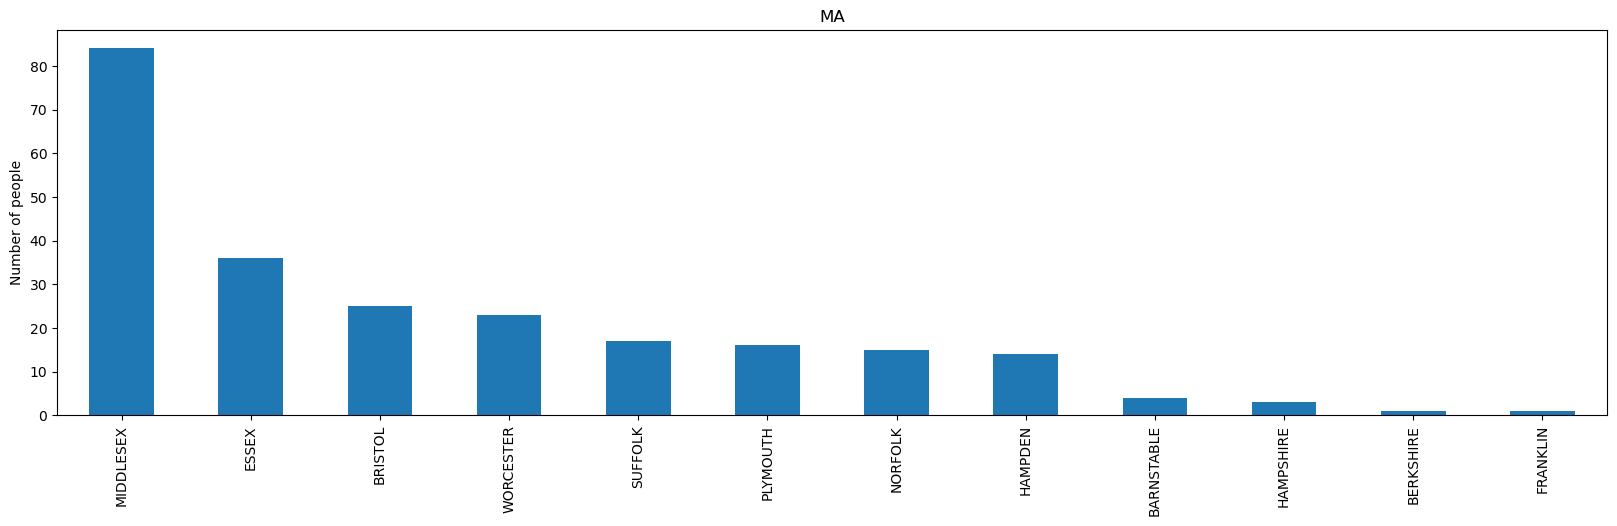

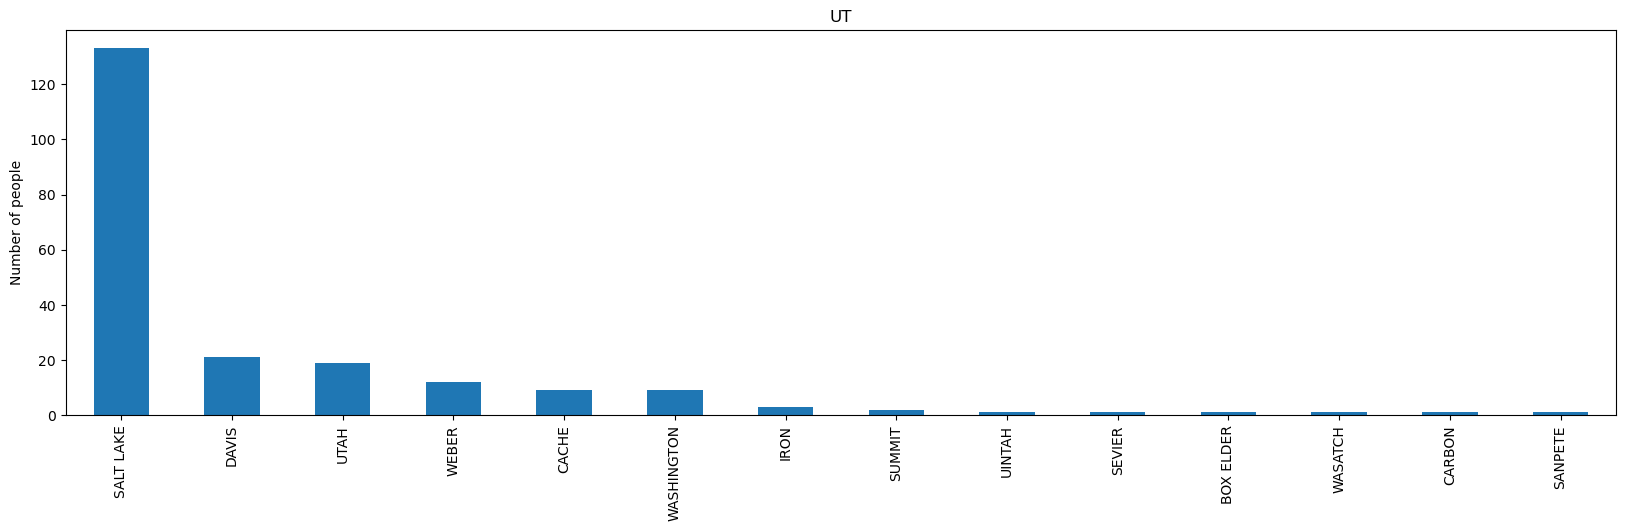

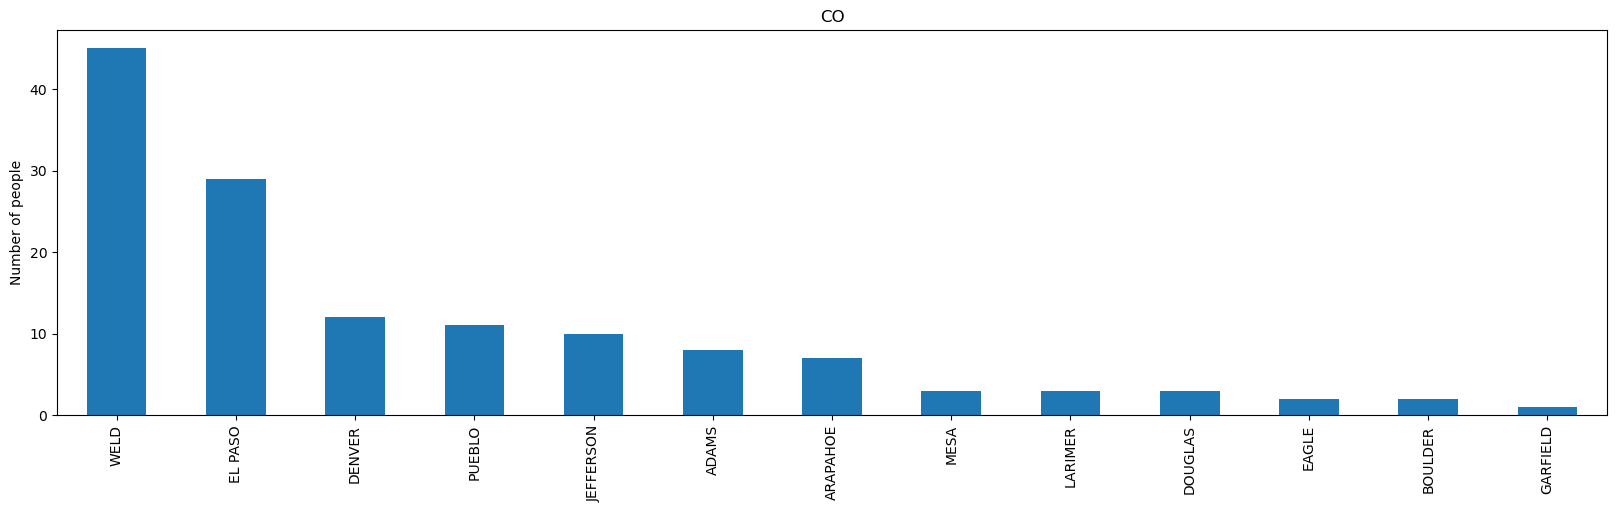

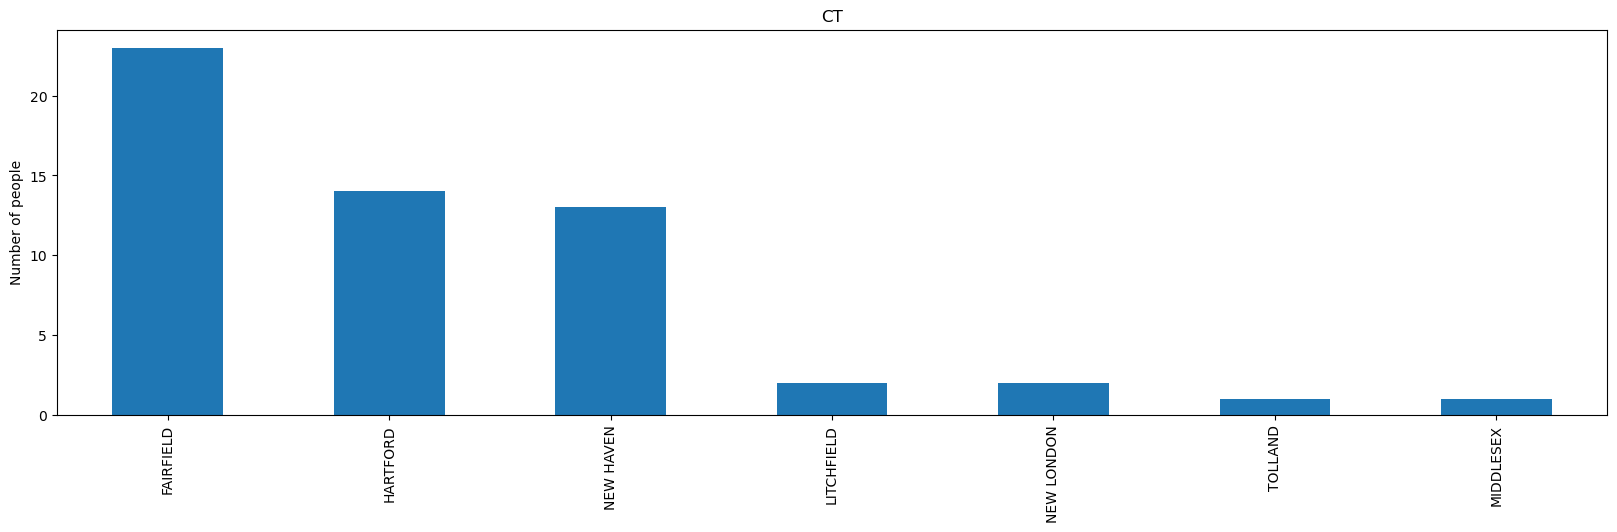

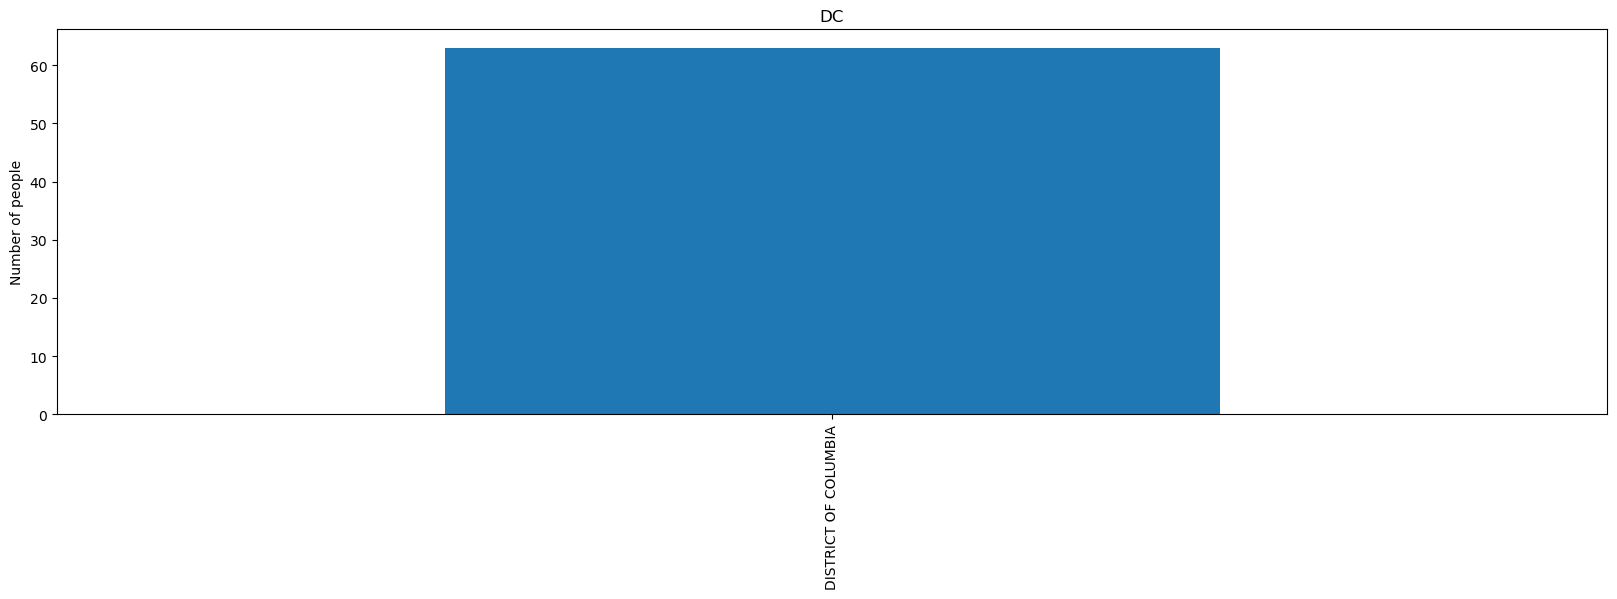

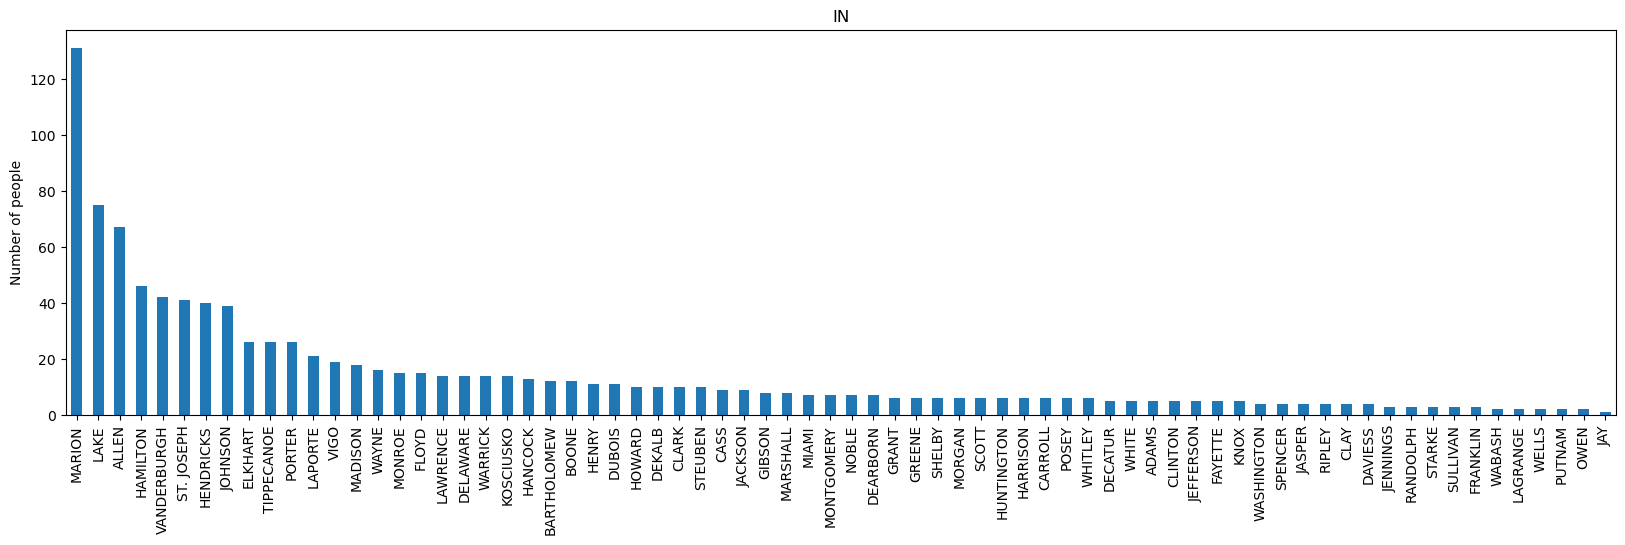

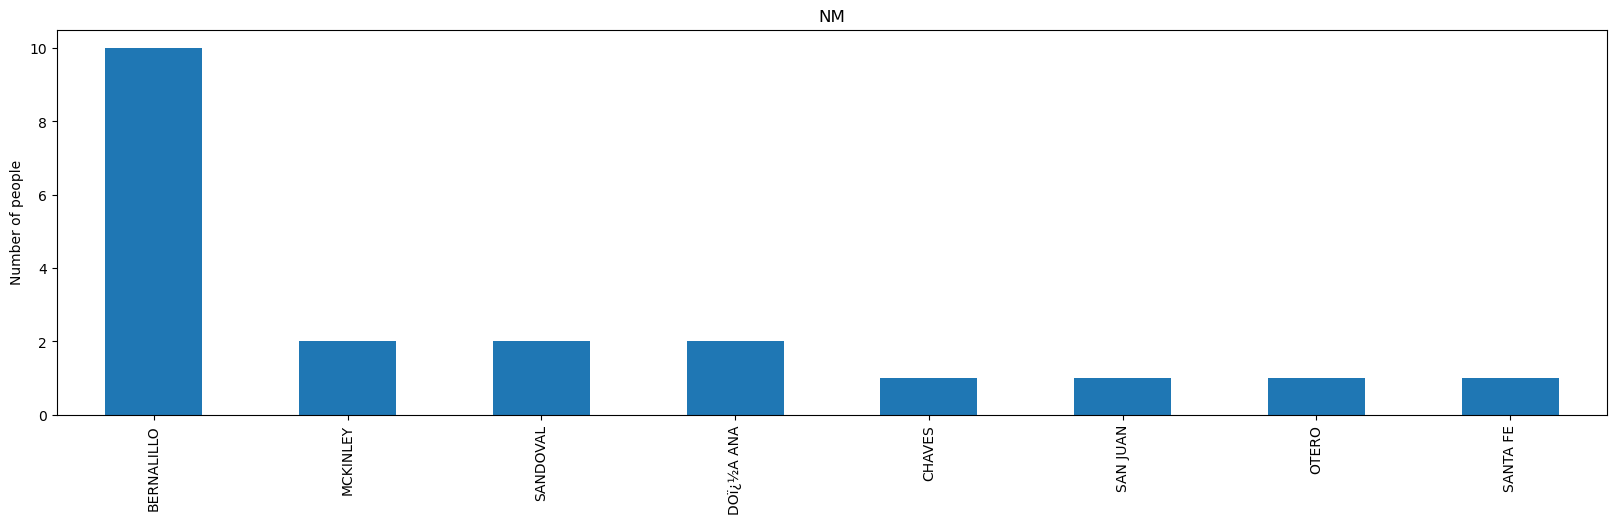

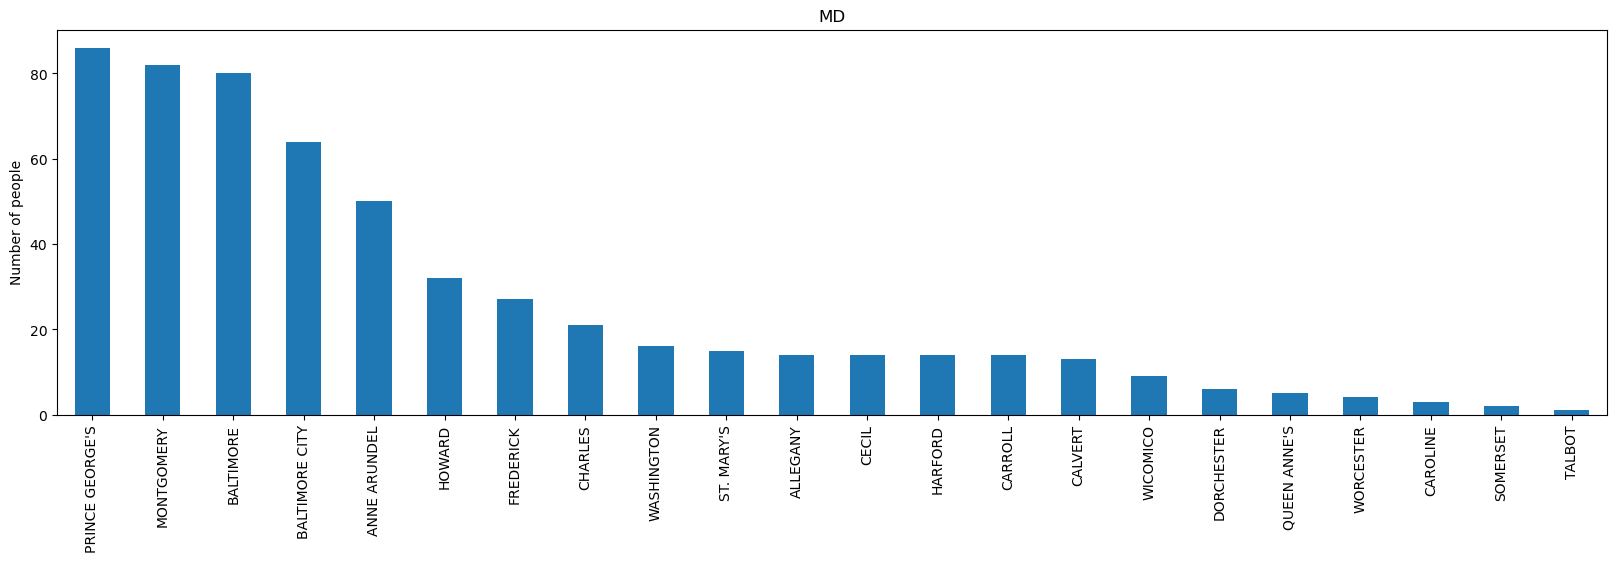

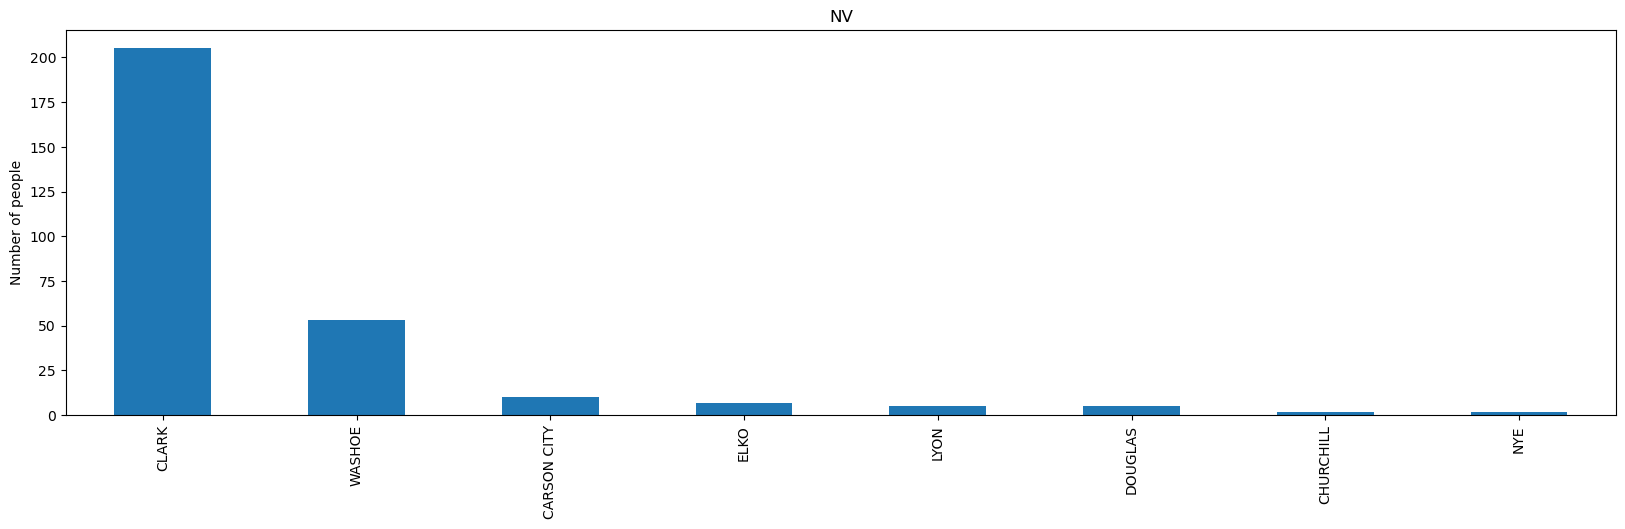

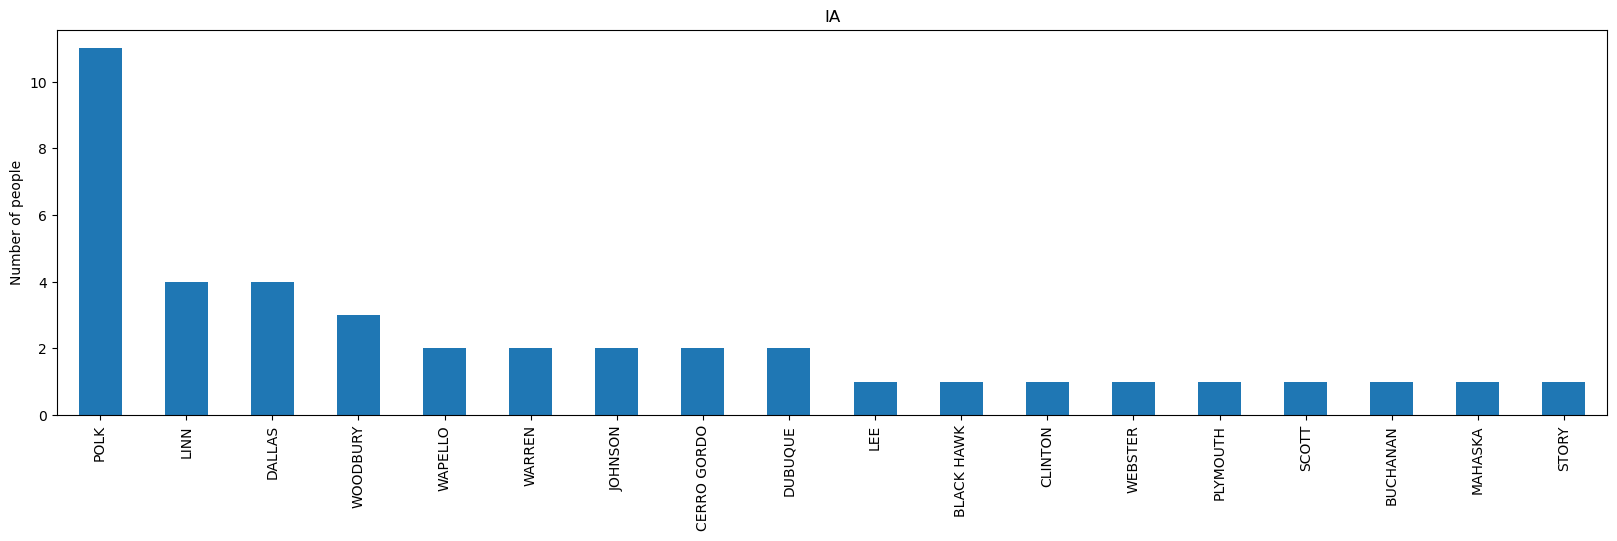

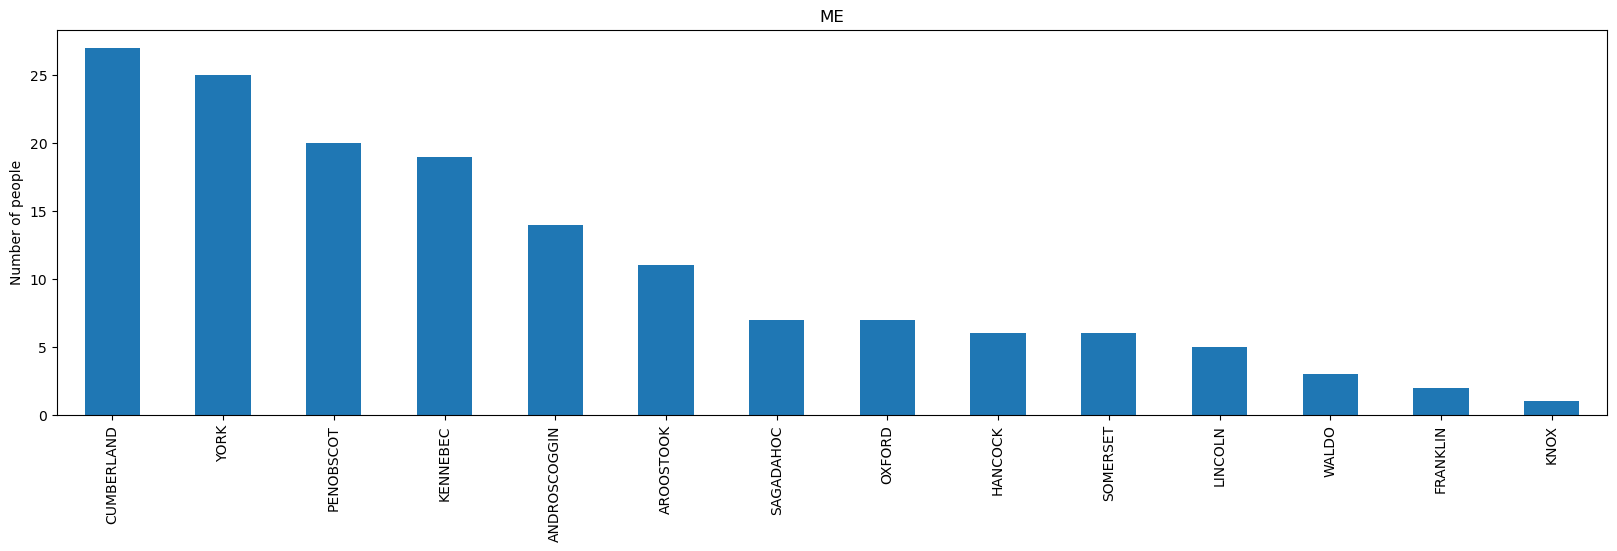

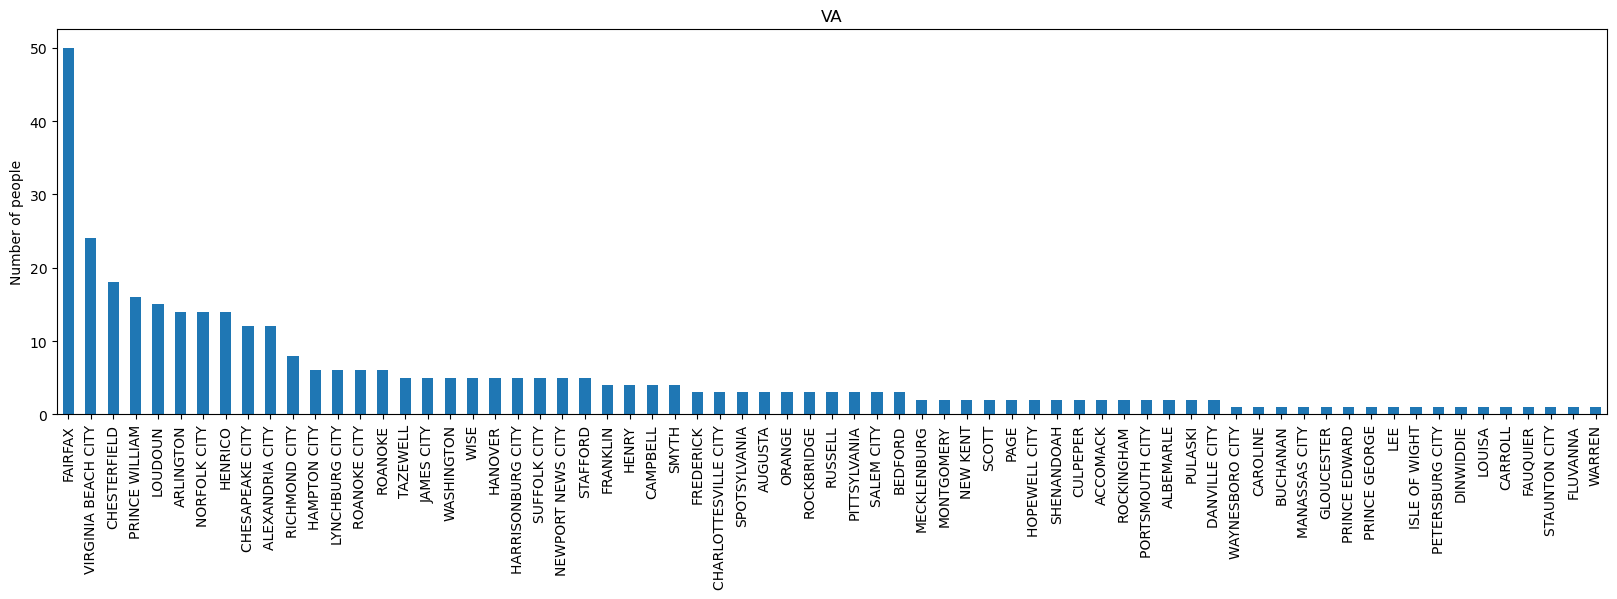

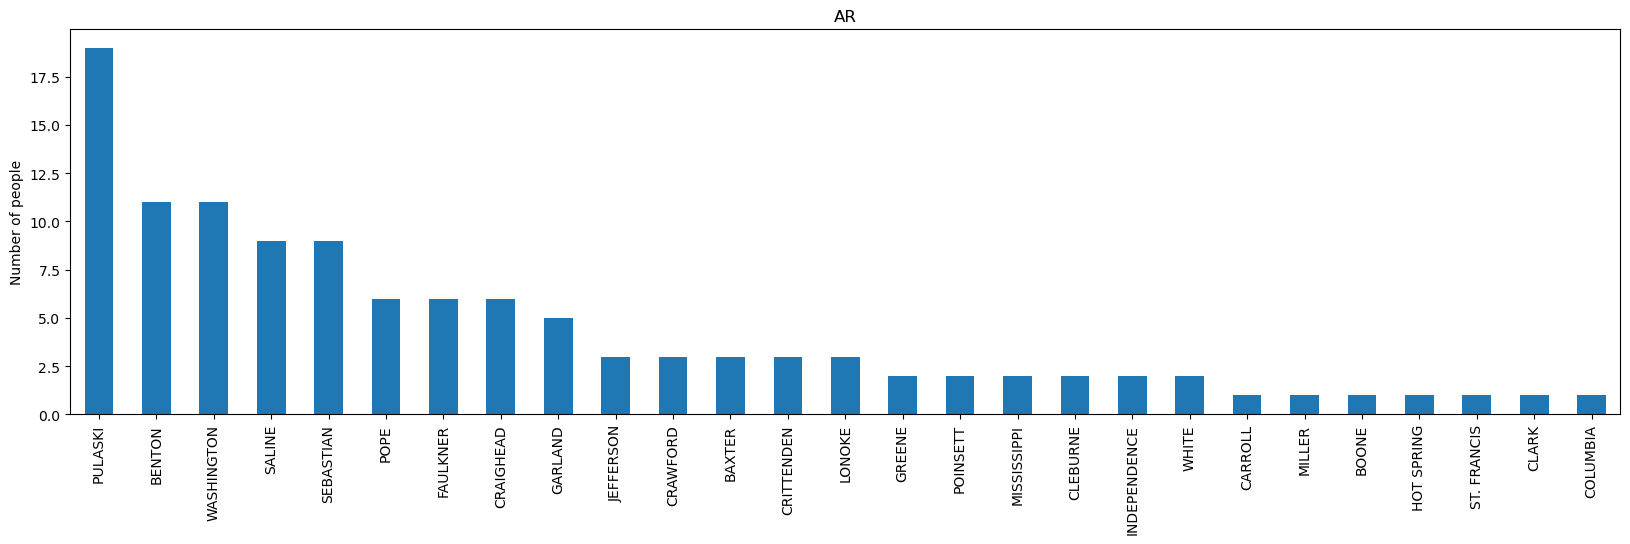

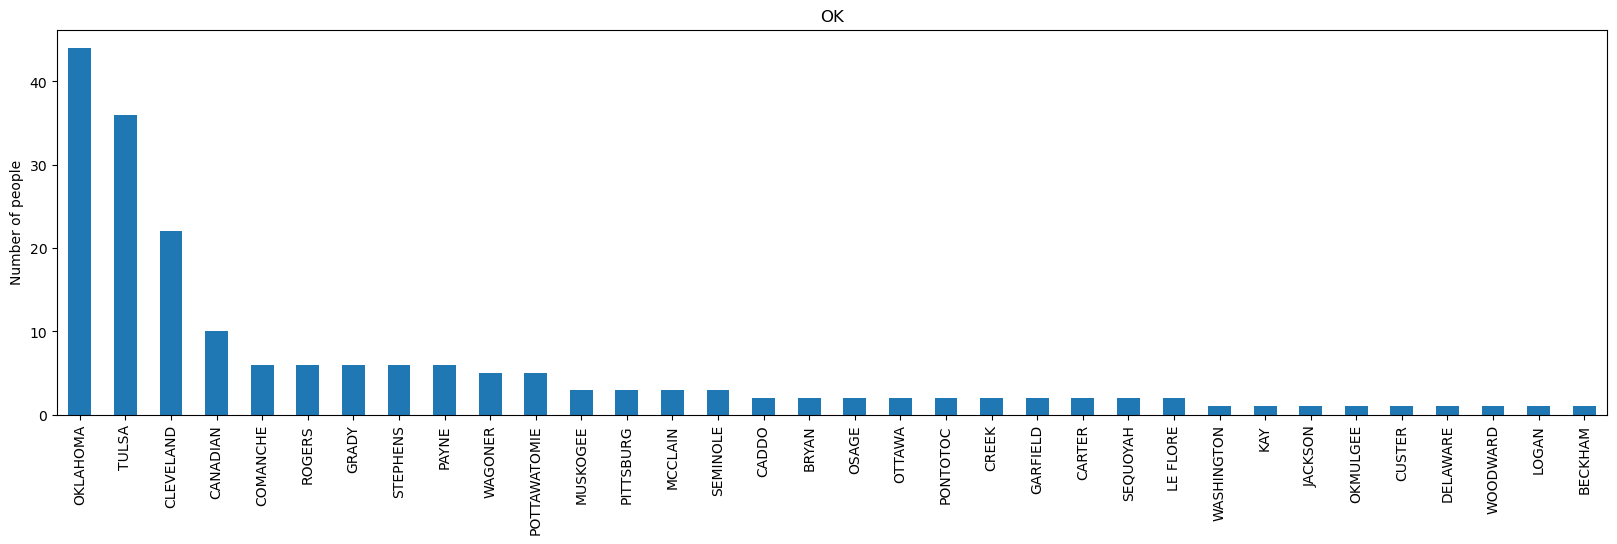

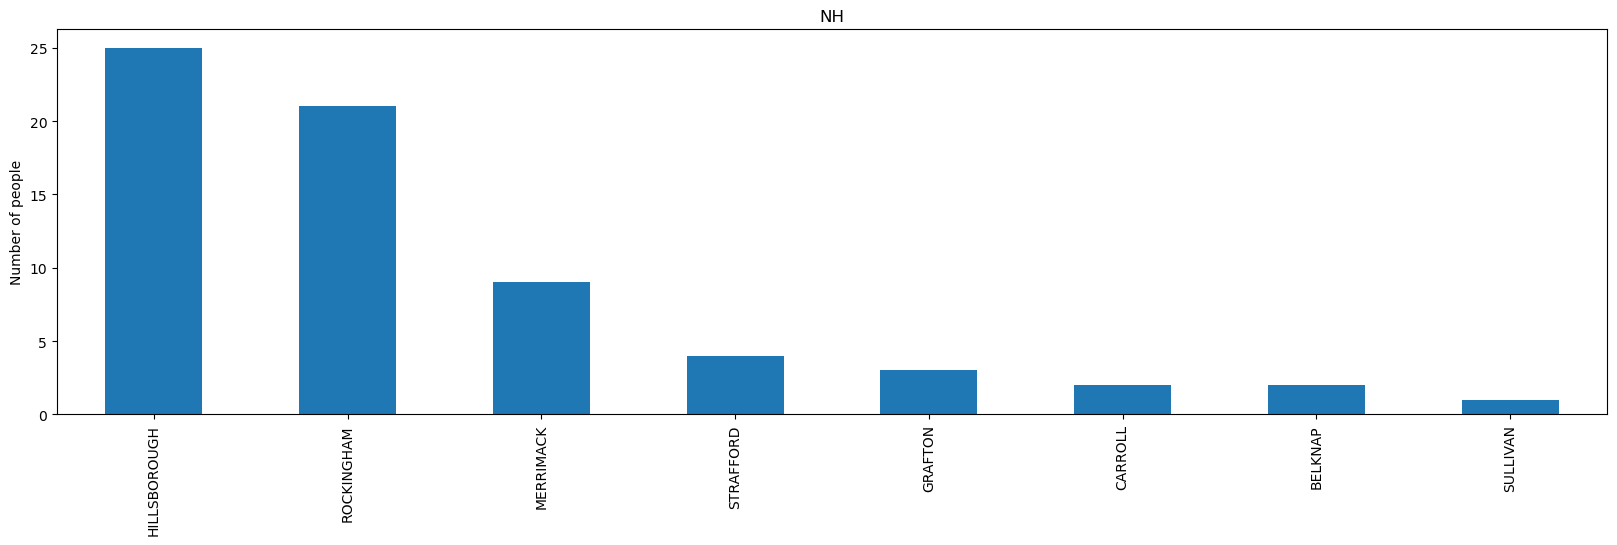

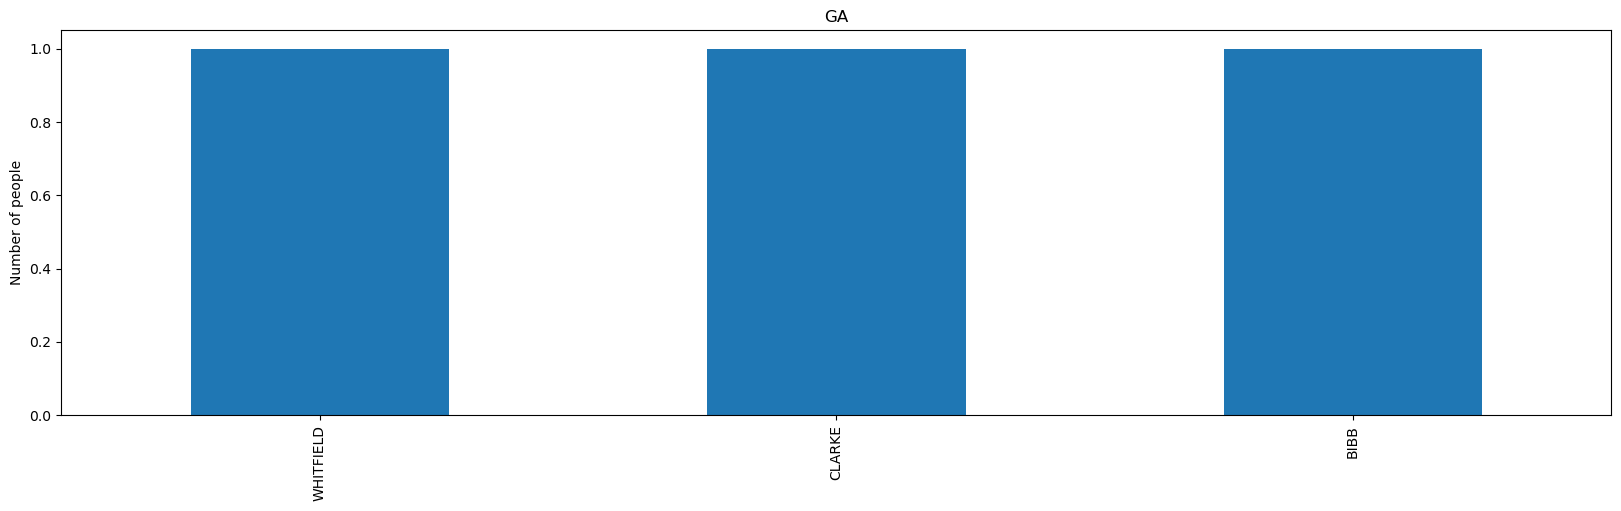

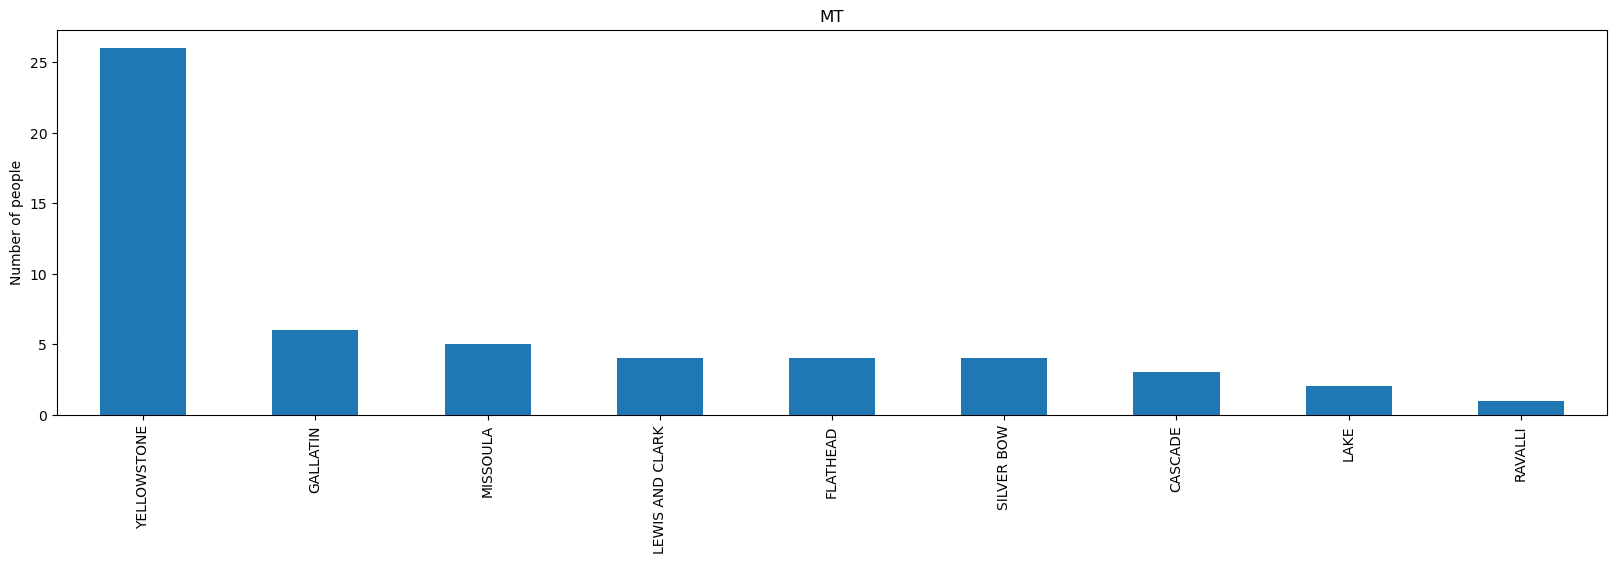

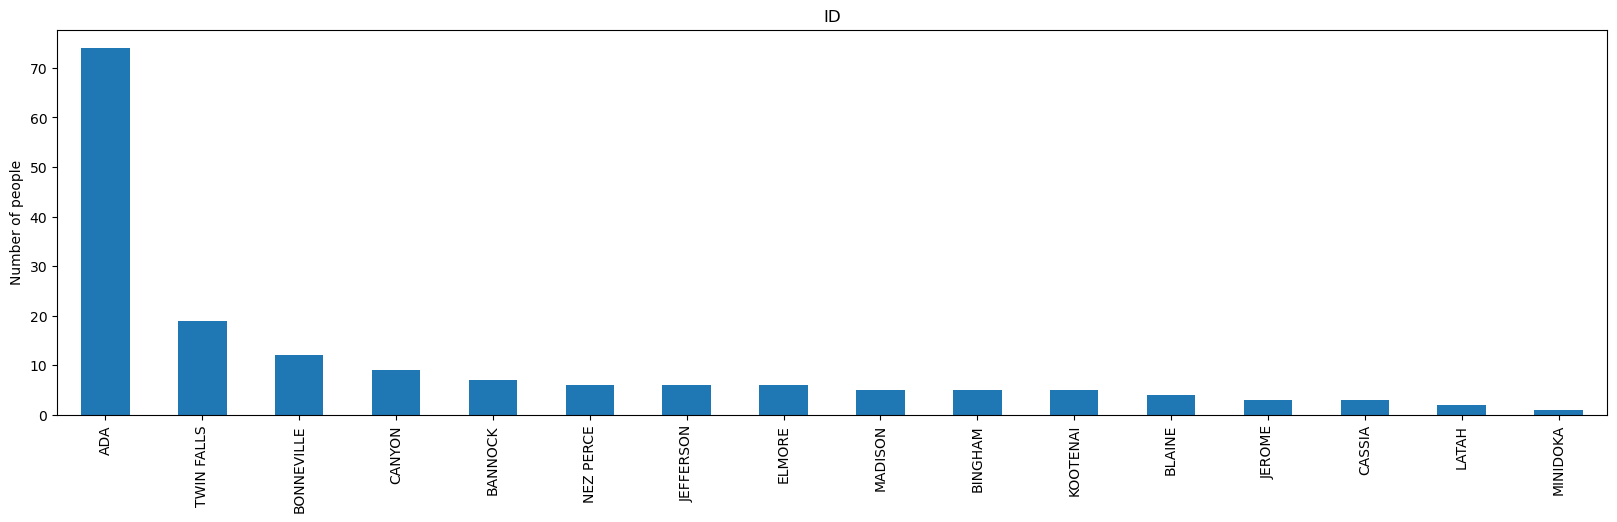

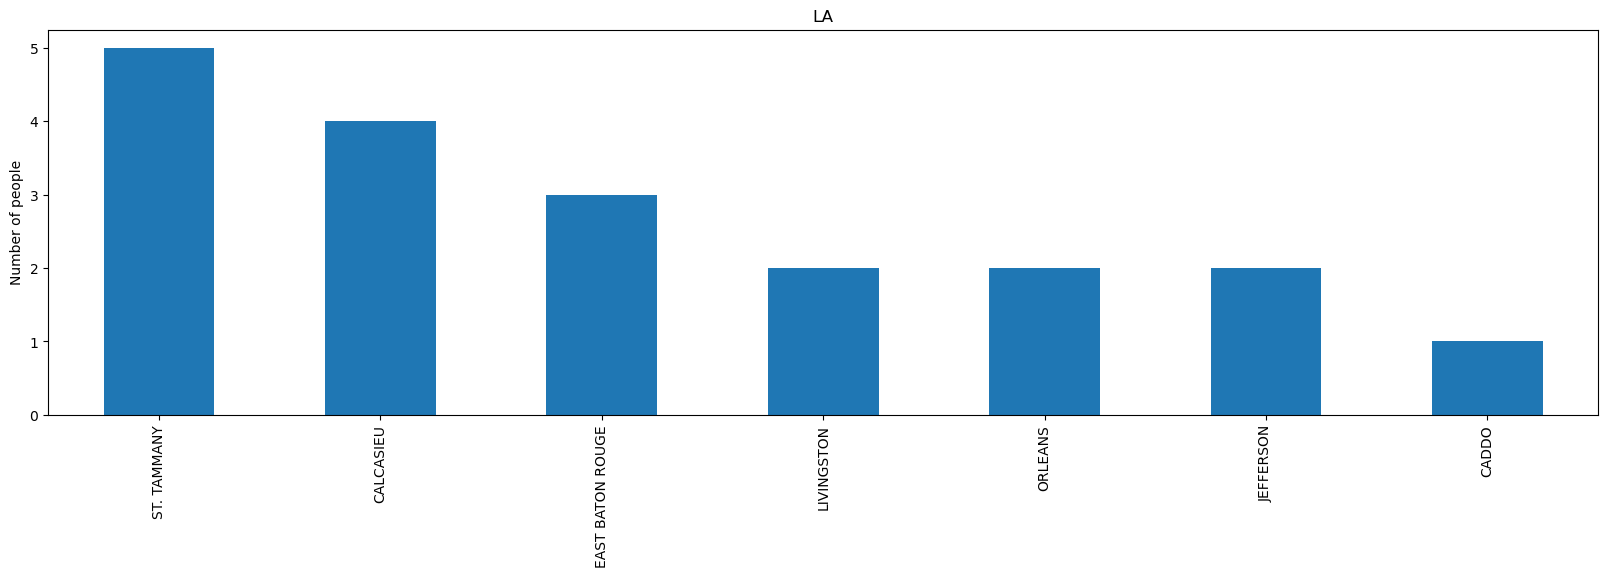

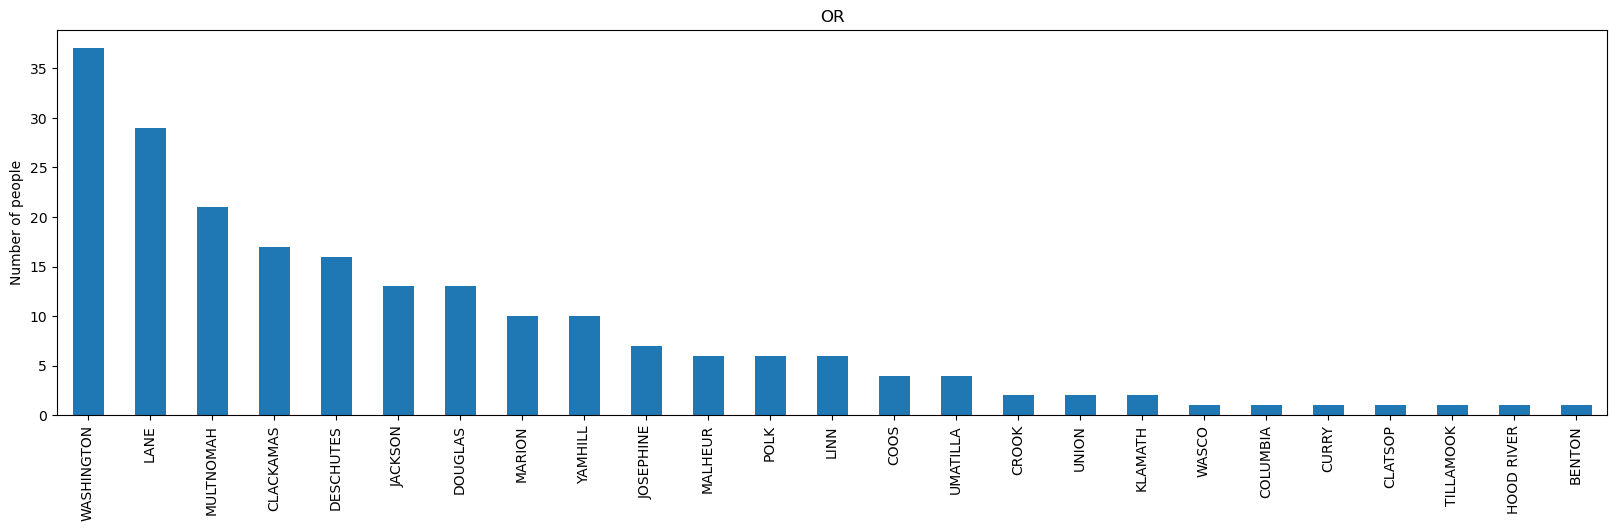

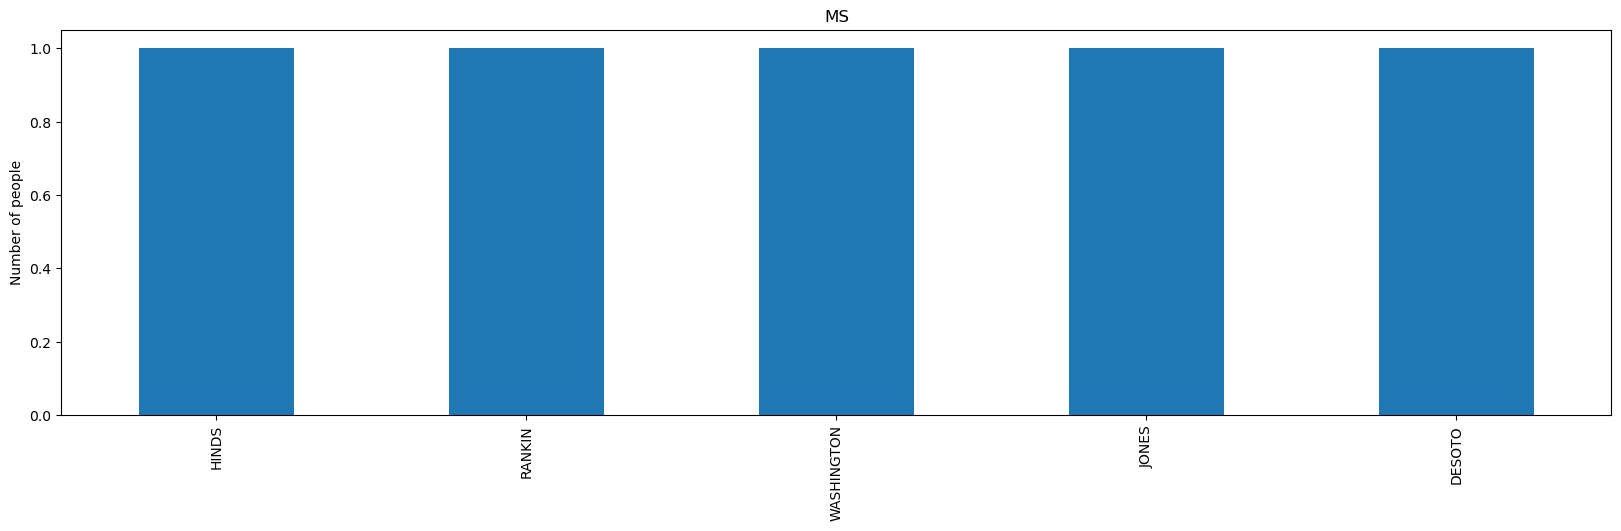

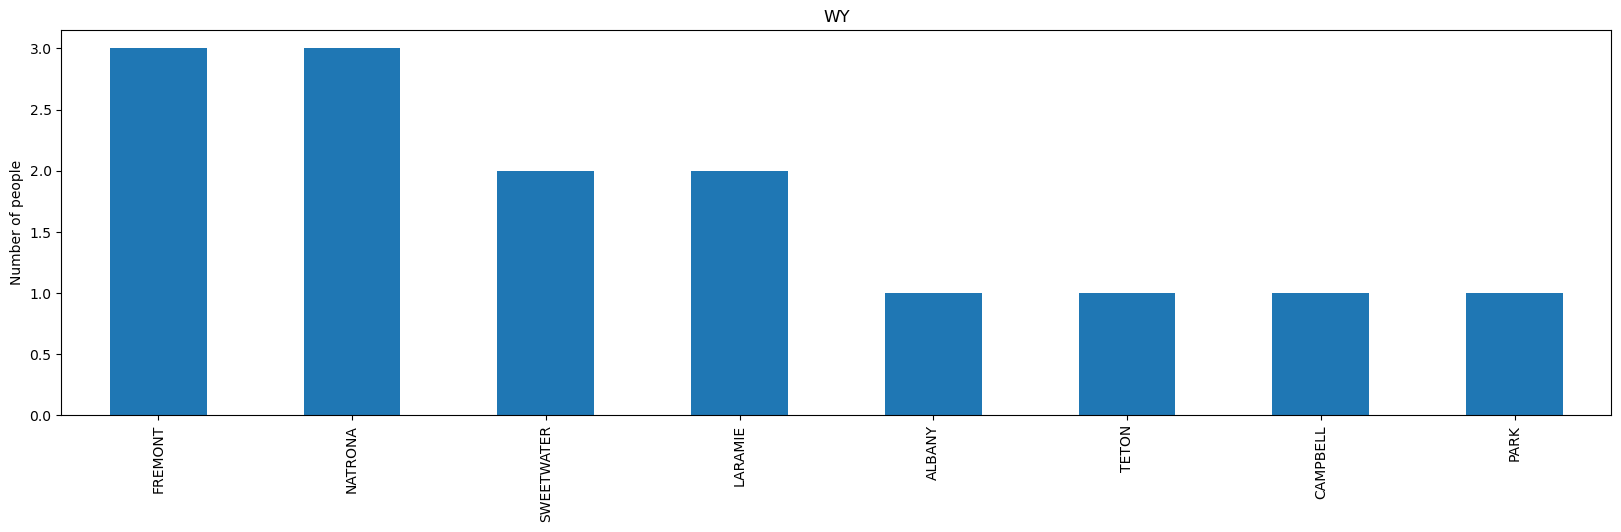

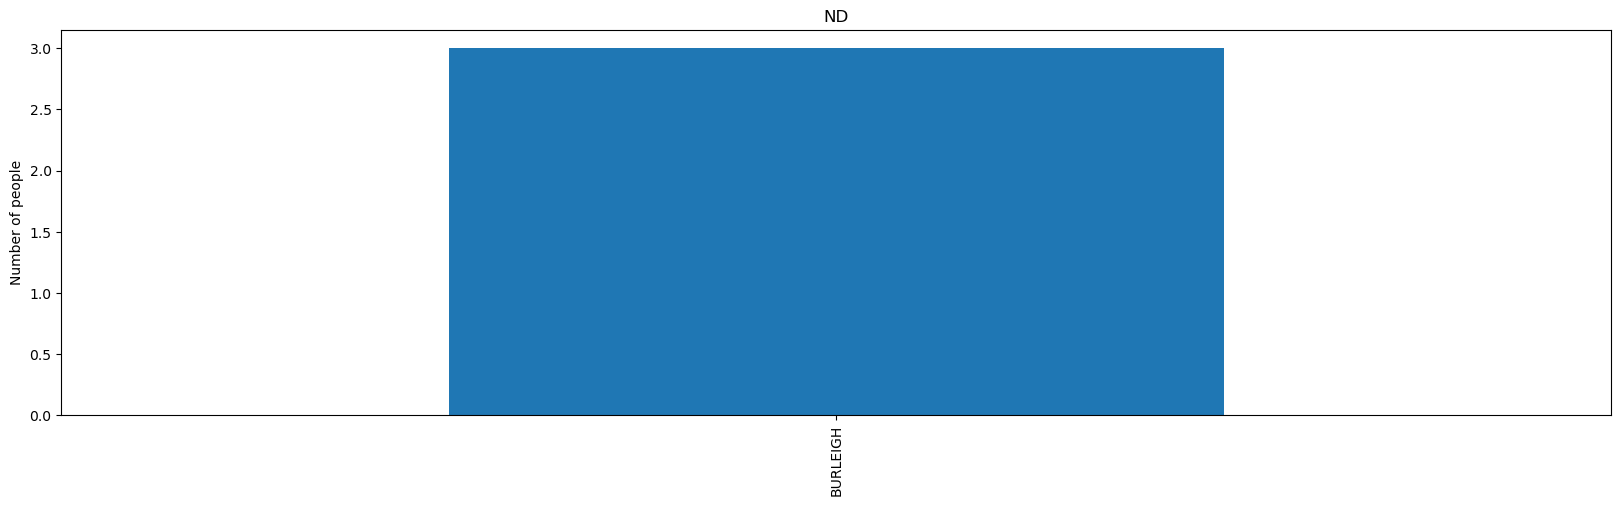

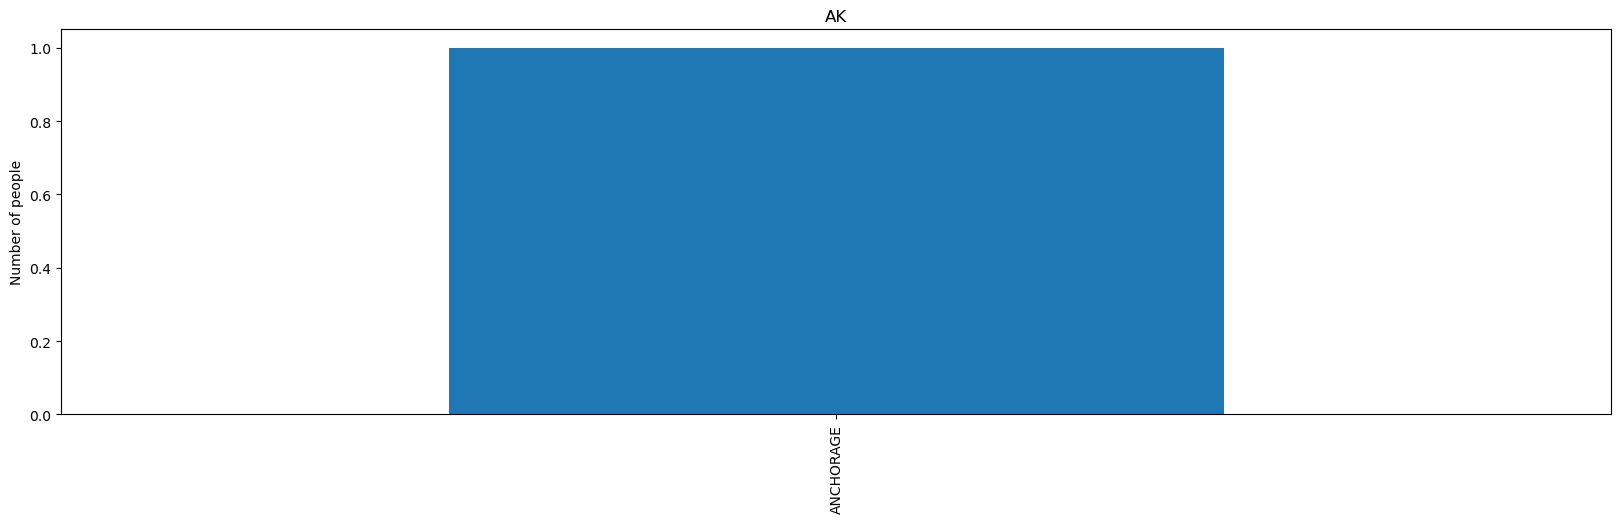

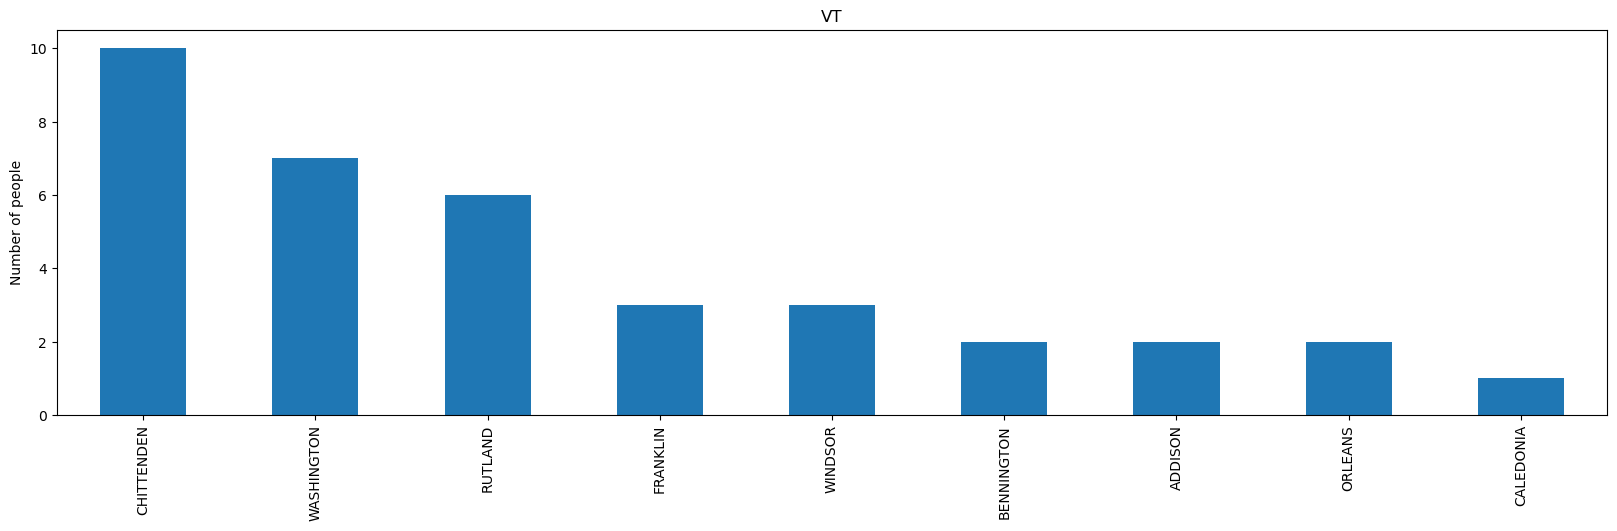

In [28]:
states = data.res_state.unique()
with PdfPages('each_state_barplots.pdf') as pp:
    for state in states:
        state_rows= data[data["res_state"]==state]
        sr = state_rows["res_county"].value_counts()
        if sr.sum()>0:
            f=sr[sr>0].plot(kind='bar', figsize = (20,5))
            plt.title(state)
            plt.ylabel("Number of people")
            pp.savefig(f.get_figure())
            plt.show()

# (2). Data Understanding: Data Quality Plan for the cleaned CSV file.
### The initial list of issues as identified in the **Data_Quality_Report_Initial_Findings.pdf**:
-Too many unnormal data in *case_positive_specimen_interval* and *case_onset_interval* columns so the box can be seen in the boxplot.

-Different scales used for similar features - Categorical features *res_state & res_fips_code* and *res_county & county_fips_code* are measuring the same event but are using different data types mappings. One mapping needs to be picked for consistency.

-Presence of outliers - There are a significant number of outliers present across a range of different features. They initially look plausible but will need to be investigated further.

-Too many empty values. They will need to be investigated further.

-Several columns have over 50 percent of empty values. They will be considered for deletion.

### - Propose solutions to deal with the problems identified. 

1.
- **Remap scales used for similar features**
    -  Categorical features *res_state & res_fips_code* and *res_county & county_fips_code* are measuring the same event but are using different data types mappings. One mapping needs to be picked for consistency.
- **Presence of outliers**
    -  There are a significant number of outliers present across a range of different features. They initailly look plausible but will need to be investigated further. If they don't make sense they will be removed.   
- **Address empty values**
    - Fill the empty values or drop the columns or rows including the empty values. 
- **Address the column which have over  50 percent of empty values**
    - If the column have no effection for prediction, it will be dropped.

In [29]:
# List all features that need to be discussed in the data quality plan
data.nunique()

case_month                           35
res_state                            49
state_fips_code                      49
res_county                          868
county_fips_code                   1210
age_group                             5
sex                                   4
race                                  8
ethnicity                             4
case_positive_specimen_interval      49
case_onset_interval                  46
process                               9
exposure_yn                           3
current_status                        2
symptom_status                        4
hosp_yn                               4
icu_yn                                4
death_yn                              2
underlying_conditions_yn              2
dtype: int64

In [30]:
data.dtypes

case_month                         datetime64[ns]
res_state                                category
state_fips_code                          category
res_county                               category
county_fips_code                         category
age_group                                category
sex                                      category
race                                     category
ethnicity                                category
case_positive_specimen_interval             Int64
case_onset_interval                         Int64
process                                  category
exposure_yn                              category
current_status                           category
symptom_status                           category
hosp_yn                                  category
icu_yn                                   category
death_yn                                 category
underlying_conditions_yn                 category
dtype: object

## Data Understanding: Data Quality Plan
    
| Feature                 | Data Quality Issue         | Handling Strategy         |
|-------------------------|----------------------      |------------------------   |
|**ID (object)**                          |   **Unique identifier not to be used as feature in data preparation**|**Keep to be able to link example to actual customer, but do not use for data preparation**|
case_month(datetime)             | None              | Keep as is       
res_state(category)       | None| Keep as is|
state_fips_code(category)             | None| Keep as is| 
res_county(category)                 | Empty values (6.04%)| Drop them|   
county_fips_code(category)                | Empty values (6.04%)| Drop them|
age_group(category)    | Empty values (0.97%)| Drop them|
sex(category)                  |Empty values (2.61%)|Drop them|
race(category)                 |Empty values (23.83%)|Using Missing to fill them| 
ethnicity(category)|Empty values (30.82%)|Using Missing to fill them|
case_positive_specimen_interval(int64)| Too many outliers, very large value (>50) and very small value (<-50), missing values (46.55%)| Investigate rows where this value appears. If invalid data and only few rows affected, drop rows. Using Missing to fill them.|   
case_onset_interval(int64)             |Too many outliers, very large value (>60) and very small value (<-80), missing value (55.95%)| Investigate cause of outliers and how many rows affected, consider drop these or not.Using the Missing to fill the empty values |
process(category)               | Missing value(91.13%) | Drop this column |
exposure_yn(category)         | Missing value (89.59%)| Drop this column |
current_status(category)         |None| Keep as is|
symptom_status(category)|Missing value (51.80%)| Investigate cause and decide what to do with this feature.Using the Missing to fill the empty values |
hosp_yn(category)|Empty value (33.08%)|Using the Missing to fill the empty values|
icu_yn(category)|Missing value(91.32%)|Drop this column|
death_yn(category)|None|Keep as is|
underlying_conditions_yn(category)|Missing value(90.99%)|Drop this column|

#### Note: The data has many duplicated rows, but they were dropped in the first step.

In [31]:
#Keep a copy of the original data
data_raw = data.copy()

#### Drop the columns that their percentage of empty values are about 90%
Because their percentage of empty values is  too high so that they are useless for prediction and analytics in the future. I select to drop them.

In [32]:
#Drop columns which have over 50 percent of missing value.
data = data.drop(columns = ['process','underlying_conditions_yn','exposure_yn','icu_yn'], axis = 1)

In [33]:
data.shape

(18922, 15)

### Processing all empty values of each columns

#### -Precessing the empty value of *res_county* and *county_fips_code* column.
I think I should drop all rows which is empty in *res_county* and *county_fips_code* column.
Because I can not use other values to fill the empty columns of them. If I use other values to fill them, it will affect the accuracy of the dataset. And Its total is not too many.

In [34]:
#Missing/Unknown/Null will be dropped.
dropped_value = ["Missing","Unknown"]
data=data[data["res_county"].isin(dropped_value) == False]
data=data.dropna(subset=['res_county', 'county_fips_code'])

In [35]:
#Check for successful deletion
data.shape

(17780, 15)

#### -Precessing the missing value of *age_group* and *sex* column.
I think I should drop all rows which is empty in *age_group* and *sex* column.
If I use other values to fill them, it will affect the accuracy of the dataset and the analytics later. And Its total is not too many.

In [36]:
#Missing/Unknown/Null will be dropped.
data= data[data["age_group"].isin(dropped_value) == False]
data= data[data["sex"].isin(dropped_value) == False]
data= data.dropna(subset=['age_group', 'sex'])

In [37]:
#Check for successful deletion
data.shape

(17367, 15)

#### -Precessing the empty value of *race* and *ethnicity* column.
I use Missing to fill the empty values right now. If I use other values to fill these features I think it will affect the accuracy of the dataset. Dropping them is also not suitable. I will take other methods to process  if there is additional demands.

In [38]:
#Fill the empty values
data["race"].fillna("Missing",inplace=True)
data["ethnicity"].fillna("Missing",inplace=True)

In [39]:
#Check the successful filling
print("The total of empty in race is ",data['race'].isnull().sum())
print("The total of empty in ethnicity is ",data['ethnicity'].isnull().sum())

The total of empty in race is  0
The total of empty in ethnicity is  0


#### -Precessing *case_positive_specimen_interval* and *case_onset_interval* column.
I use Missing to fill the empty values right now. 
<br>*case_positive_specimen_interval* means Weeks between earliest date and date of first positive specimen collection.
<br>*case_onset_interval* means Weeks between earliest date and date of symptom onset.
<br>I think an interval should not be a negative number. So the negative number will be dropped.

In [40]:
#Fill the empty values
data["case_positive_specimen_interval"].fillna(0,inplace=True)
data["case_onset_interval"].fillna(0,inplace=True)

In [41]:
#Check the successful filling
print("The total of empty in case_positive_specimen_interval is ",data['case_positive_specimen_interval'].isnull().sum())
print("The total of empty in case_onset_interval is ",data['case_onset_interval'].isnull().sum())

The total of empty in case_positive_specimen_interval is  0
The total of empty in case_onset_interval is  0


In [42]:
#Drop the negative number
data.drop(data[(data["case_positive_specimen_interval"] < 0) | (data["case_onset_interval"] < 0)].index, inplace=True)

In [43]:
#Check the successful deletion
print("The total of negative number in case_positive_specimen_interval is ",len(data[data["case_positive_specimen_interval"] < 0].index))
print("The total of negative number in case_onset_interval is ",len(data[data["case_onset_interval"] < 0].index))

The total of negative number in case_positive_specimen_interval is  0
The total of negative number in case_onset_interval is  0


Besides, there are many outliers need to process.

0     16023
1       827
2       110
3        18
4         9
5         8
9         3
52        3
21        3
16        2
10        2
12        2
33        2
7         2
28        2
31        2
25        2
6         2
30        1
15        1
36        1
14        1
38        1
19        1
22        1
11        1
26        1
34        1
51        1
13        1
8         1
24        1
53        1
Name: case_positive_specimen_interval, dtype: Int64

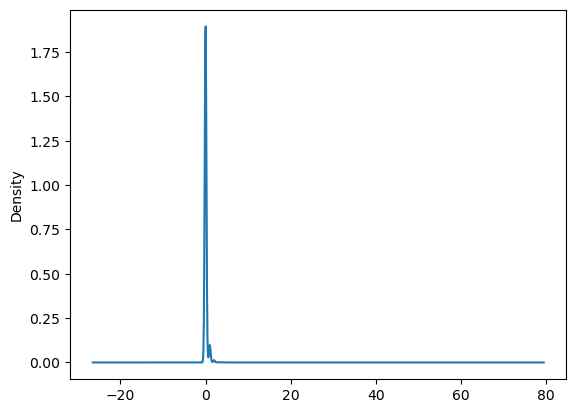

In [44]:
data["case_positive_specimen_interval"].plot.kde()
data["case_positive_specimen_interval"].value_counts()

0     16995
1        17
2         4
4         4
3         3
14        3
10        1
37        1
22        1
6         1
8         1
36        1
25        1
17        1
11        1
9         1
18        1
Name: case_onset_interval, dtype: Int64

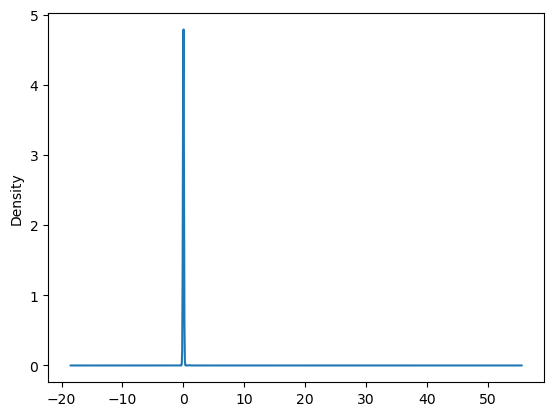

In [45]:
data["case_onset_interval"].plot.kde()
data["case_onset_interval"].value_counts()

According to the above density plots, I found that 0 occurs most frequently.<br>Meanwhile, longer than 10 weeks in *case_positive_specimen_interval* and longer than 5 weeks in *case_onset_interval* are not unnormal and useless. I select to drop them.

In [46]:
#Drop the unnormal and useless number
data.drop(data[(data["case_positive_specimen_interval"] > 10) | (data["case_onset_interval"] > 5)].index, inplace=True)

In [47]:
#Check the successful deletion
print("The total of longer than 10 weeks rows in case_positive_specimen_interval is ",len(data[data["case_positive_specimen_interval"] > 10].index))
print("The total of longer than 5 weeks row in case_onset_interval is ",len(data[data["case_onset_interval"] > 5].index))

The total of longer than 10 weeks rows in case_positive_specimen_interval is  0
The total of longer than 5 weeks row in case_onset_interval is  0


case_positive_specimen_interval       AxesSubplot(0.125,0.11;0.352273x0.77)
case_onset_interval                AxesSubplot(0.547727,0.11;0.352273x0.77)
dtype: object

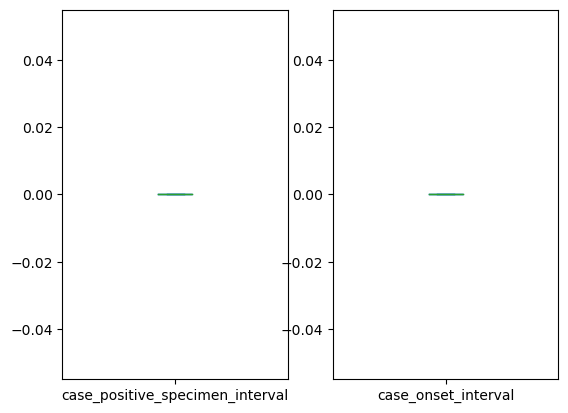

In [48]:
data[continuous_columns].plot(kind='box', subplots=True,sharex=False, sharey=False, showfliers=False)

Even though I drop all negative values and hide other outliers, the box still can not be seen. The reason for that is data is concentrated around 0.

#### -Precessing the empty values of *symptom_status* and *hosp_yn* columns.
I use Missing to fill the empty value of these columns.

In [49]:
#Fill the empty values.
data["symptom_status"].fillna("Missing",inplace=True)
data["hosp_yn"].fillna("Missing",inplace=True)

In [50]:
#Check the successful filling
print("The total of empty in symptom_status is ",data['symptom_status'].isnull().sum())
print("The total of empty in hosp_yn is ",data['hosp_yn'].isnull().sum())

The total of empty in symptom_status is  0
The total of empty in hosp_yn is  0


### Now, I have applied my solutions to obtain a new CSV file where the identified data quality issues were addressed.
File name: *22205061_homework1_cleaned_second.csv*

In [51]:
#Write the cleaned dataframe to a csv file
data.to_csv('22205061_homework1_cleaned_second.csv', index = False)

In [52]:
data.shape

(16992, 15)

In [53]:
#Print table with continuous statistics
data[continuous_features].describe().T

count      mean       std  min  25%  50%  \
case_positive_specimen_interval  16992.0  0.074035  0.372441  0.0  0.0  0.0   
case_onset_interval              16992.0  0.002943  0.085378  0.0  0.0  0.0   

                                 75%   max  
case_positive_specimen_interval  0.0  10.0  
case_onset_interval              0.0   4.0

In [54]:
#Print table with categorical statistics
category_columns = data.select_dtypes(['category']).columns
data[category_columns].describe().T

count unique                        top   freq
res_state         16992     46                         NY   1879
state_fips_code   16992     46                         36   1879
res_county        16992    848                 MIAMI-DADE    363
county_fips_code  16992   1176                      12086    363
age_group         16992      4             18 to 49 years   6587
sex               16992      2                     Female   8843
race              16992      8                      White  10783
ethnicity         16992      4        Non-Hispanic/Latino  10586
current_status    16992      2  Laboratory-confirmed case  14512
symptom_status    16992      4                Symptomatic   7684
hosp_yn           16992      4                         No   8455
death_yn          16992      2                         No  12871

# (3). Exploring relationships between feature pairs:

### - Choose a subset of features you find promising and plot pairwise feature interactions (e.g., continuous-continuous feature plot or continuous-categorical plots or correlation plots). Explain your choices.

The features that I will look at for pairwise feature interaction are the following continuous features:
- case_positive_specimen_interval
- case_onset_interval

and the following categorical features:
- age_group
- sex
- race
- symptom_status
- hosp_yn
- death_yn

### Continuous  VS Continuous features plots

(array([0.5, 1.5]),
 [Text(0.5, 0, 'case_positive_specimen_interval'),
  Text(1.5, 0, 'case_onset_interval')])

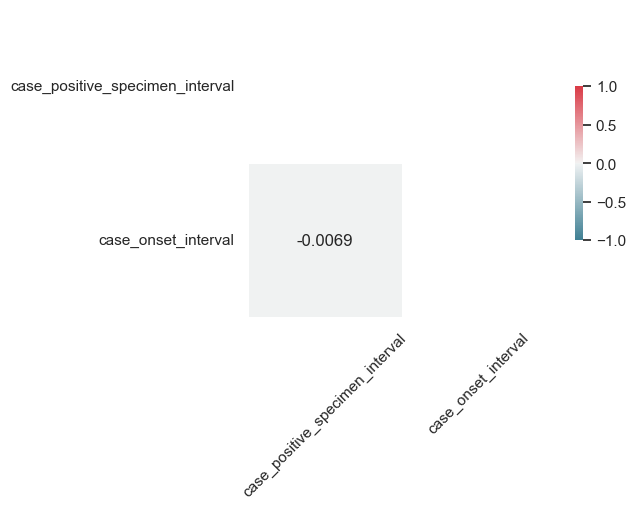

In [55]:
# Correlation matrix using code found on "sample_solution_COMP47350_DQR_DQP_DataExploration_DataPrep_CreditRiskPrediction.ipynb"
sns.set(style="white")
continuous_columns1 = ['case_positive_specimen_interval',
                      'case_onset_interval']
# Calculate correlation of all pairs of continuous features
corr = data[continuous_columns1].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 4))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

<AxesSubplot: xlabel='case_positive_specimen_interval', ylabel='case_onset_interval'>

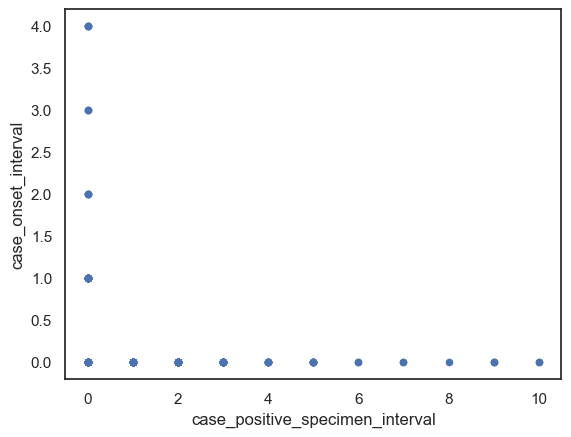

In [56]:
data.plot(kind='scatter', x='case_positive_specimen_interval', y='case_onset_interval')

We can find in the above plot:
   - There are just several points in the plot. The reason is that the values of *case_positive_specimen_interval* and *case_onset_interval* feature are very concentrated. Most of values are from 0 to 10 and 0 occurs most frequently. So this plot looks odd.
   - According to the first plot, we know that *case_positive_specimen_interval* and *case_onset_interval* feature features do not have correlation. A higher absolute value indicates a higher correlation.

### Categorical VS Categorical feature plots

#### *age_group* and *symptom_status*

age_group
Index 		 Count
65+ years 		 5259
50 to 64 years 		 2835
18 to 49 years 		 6587
0 - 17 years 		 2311


(0.0, 100.0)

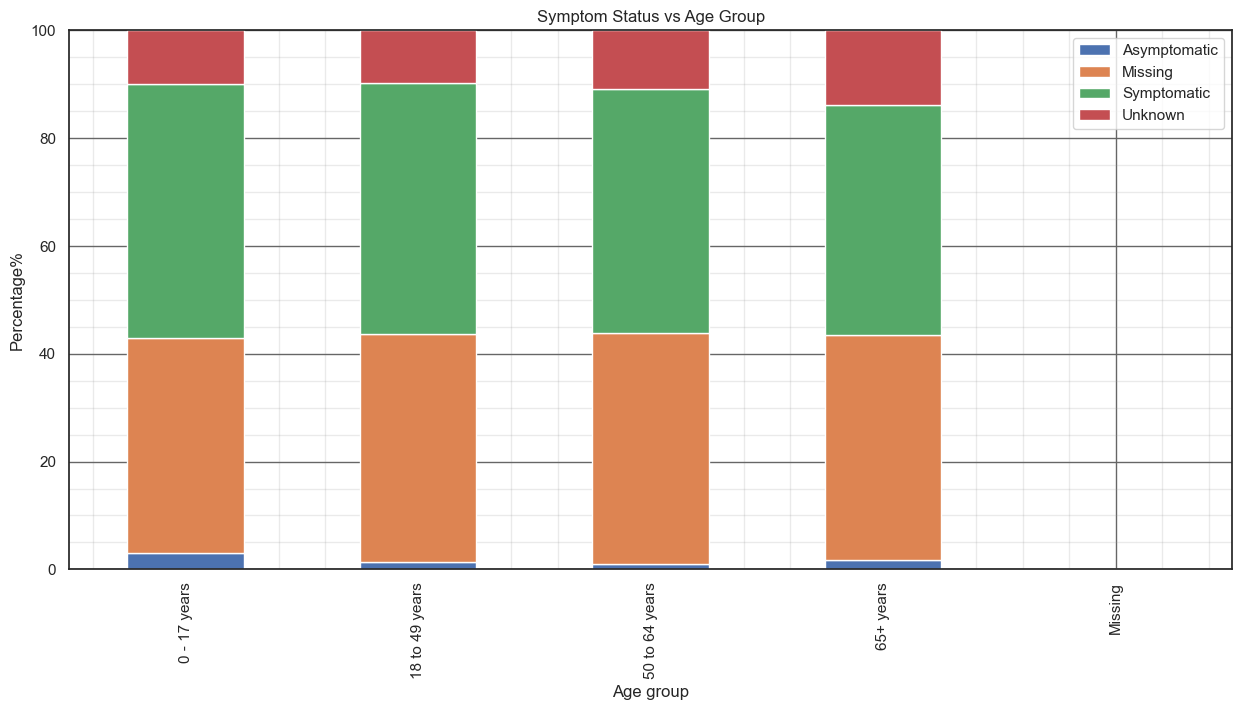

In [57]:
#Using code from the module lab
age_group = pd.unique(data["age_group"].ravel())

# add new column and set values to zero
data['percent'] = 0

#print header
print("age_group")
print("Index \t\t Count")

# for each age group category
for i in age_group:
    
    count = data[data["age_group"] == i].count()['symptom_status']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t\t", count)
    
    index_list = data[data['age_group'] == i].index.tolist()
    for ind in index_list:
        data.loc[ind, 'percent'] = count_percentage
        
group = data[['percent','age_group','symptom_status']].groupby(['age_group','symptom_status']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Symptom Status vs Age Group", figsize=(15,7), grid=True)

# add legend
#red_patch = mpatches.Patch(color='orange', label='Good')
#blue_patch = mpatches.Patch(color='blue', label='Bad')
#my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["Asymptomatic", "Missing", "Symptomatic","Unknown"])
    
# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Age group")
my_plot.set_ylabel("Percentage%")
my_plot.set_ylim([0,100])

When we analyze a plot, we just focus on *Asymptomatic* and *Symptomatic* and ignore *Missing* and *Unknown*. 

There is a plot to show the relationships between *age_group* and *symptom_status* and we found that:
- The presence or absence of symptoms does not appear to be related to age, as the proportion of asymptomatic and symptomatic patients is essentially the same across all age groups. 
- The proportion of asymptomatic patients whose age from 0 to 17 are relatively higher than other age groups but just a little. 
- The proportion of symptomatic patients whose age over 65 years old are relatively less tha other group but just a little.
- Almost all patients are symptomatic based on the proportion of asymptomatic and symptomatic.

#### *sex* and *symptom_status*

Sex
Index 		 Count
Male 		 8149
Female 		 8843


(0.0, 100.0)

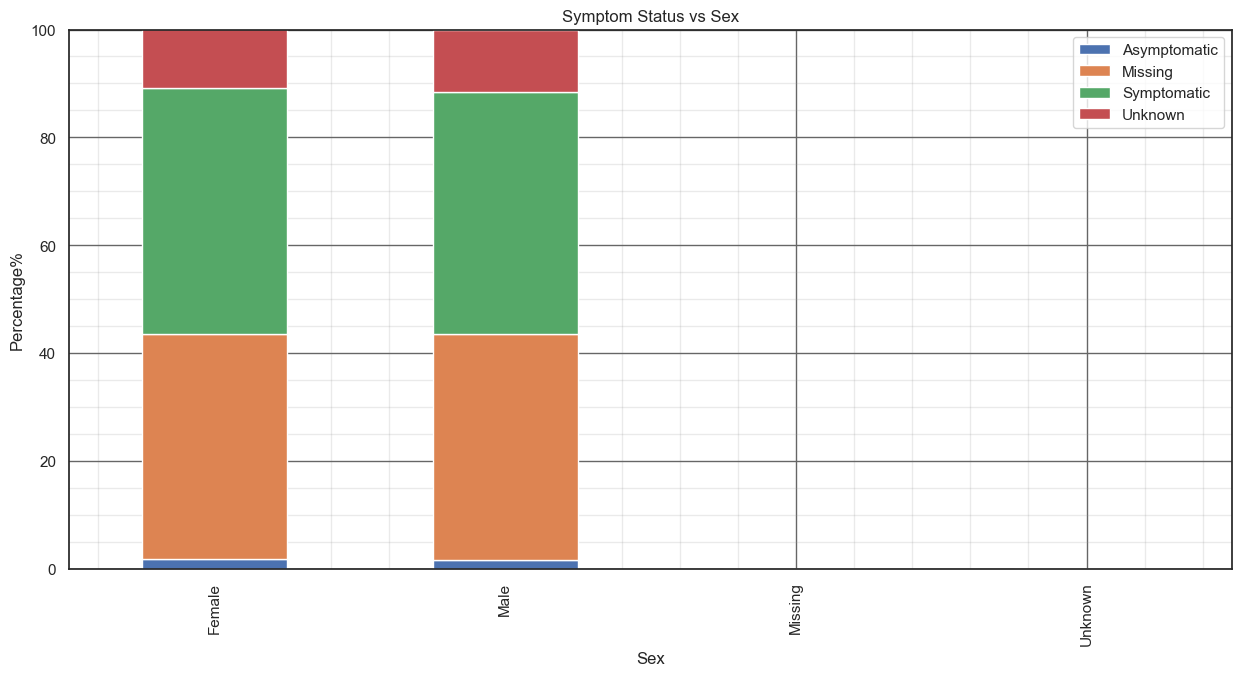

In [58]:
#Using code from the module lab
sex = pd.unique(data["sex"].ravel())

# add new column and set values to zero
data['percent'] = 0

#print header
print("Sex")
print("Index \t\t Count")

# for each age group category
for i in sex:
    
    count = data[data["sex"] == i].count()['symptom_status']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t\t", count)
    
    index_list = data[data['sex'] == i].index.tolist()
    for ind in index_list:
        data.loc[ind, 'percent'] = count_percentage
        
group = data[['percent','sex','symptom_status']].groupby(['sex','symptom_status']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Symptom Status vs Sex", figsize=(15,7), grid=True)

# add legend
#red_patch = mpatches.Patch(color='orange', label='Good')
#blue_patch = mpatches.Patch(color='blue', label='Bad')
#my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["Asymptomatic", "Missing", "Symptomatic","Unknown"])
    
# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Sex")
my_plot.set_ylabel("Percentage%")
my_plot.set_ylim([0,100])

There is a plot to show the relationships between *sex* and *symptom_status* and we found that:
- The presence or absence of symptoms does not appear to be related to sex, as the proportion of asymptomatic and symptomatic patients is essentially the same across different sex.
- Almost all patients are symptomatic based on the proportion of asymptomatic and symptomatic.

#### *race* and *symptom_status*

Race
Index 		 Count
White 		 10783
Black 		 1853
Unknown 		 1363
Missing 		 2364
Asian 		 440
Multiple/Other 		 126
American Indian/Alaska Native 		 61
Native Hawaiian/Other Pacific Islander 		 2


(0.0, 100.0)

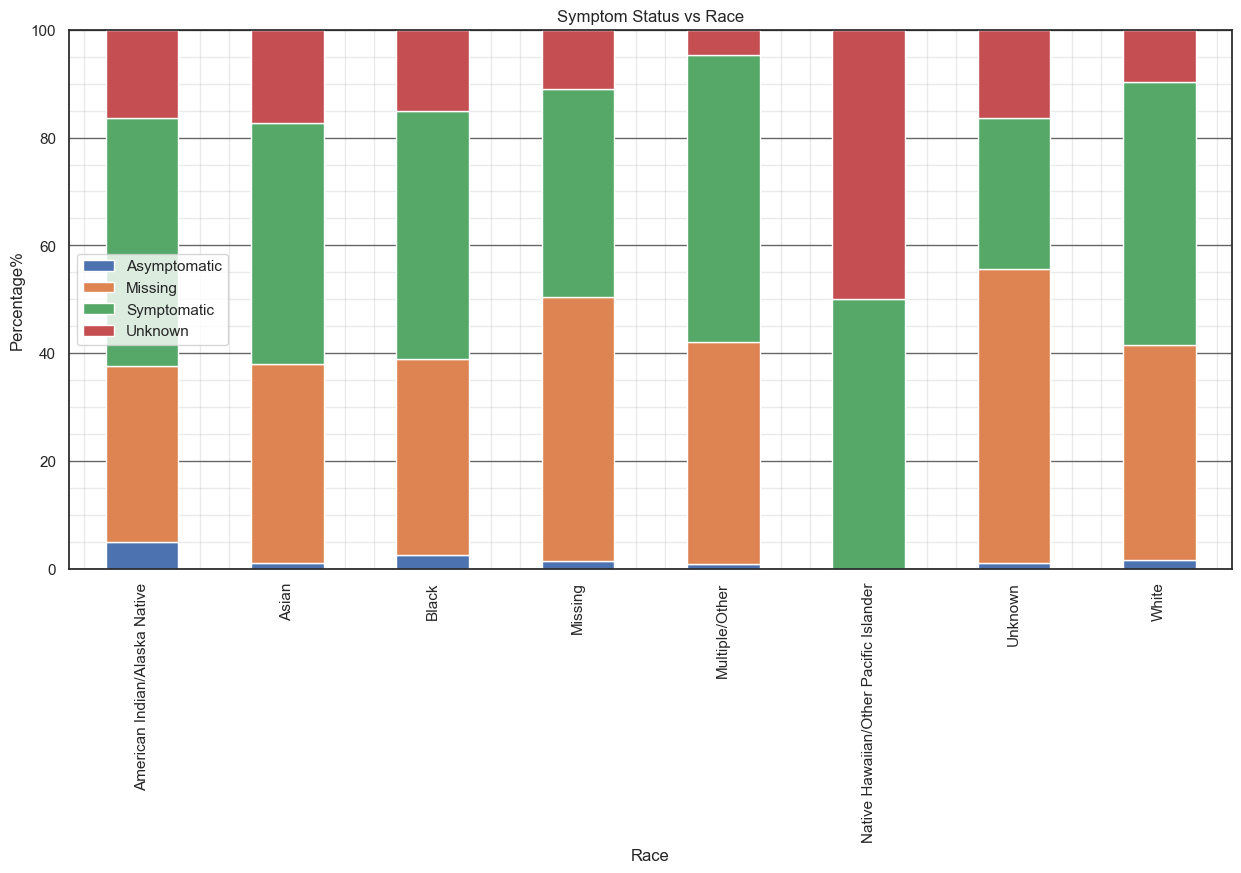

In [59]:
#Using code from the module lab
race = pd.unique(data["race"].ravel())

# add new column and set values to zero
data['percent'] = 0

#print header
print("Race")
print("Index \t\t Count")

# for each age group category
for i in race:
    
    count = data[data["race"] == i].count()['symptom_status']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t\t", count)
    
    index_list = data[data['race'] == i].index.tolist()
    for ind in index_list:
        data.loc[ind, 'percent'] = count_percentage
        
group = data[['percent','race','symptom_status']].groupby(['race','symptom_status']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Symptom Status vs Race", figsize=(15,7), grid=True)

# add legend
#red_patch = mpatches.Patch(color='orange', label='Good')
#blue_patch = mpatches.Patch(color='blue', label='Bad')
#my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["Asymptomatic", "Missing", "Symptomatic","Unknown"])
    
# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Race")
my_plot.set_ylabel("Percentage%")
my_plot.set_ylim([0,100])

There is a plot to show the relationships between *race* and *symptom_status* and we found that:
- The proportion of symptomatic patients does not differ significantly between races.
- The proportion of asymptomatic patients whose race are *American Indian/Alaska Native* and *Black* is higher than other races. *American Indian/Alaska Native's* is higher than *black's*.
- According to current dataset, the patients of *Native Hawaiian/Other Pacific Islander* are all symptomatic.

#### *age_group* and *death_yn*

age_group
Index 		 Count
65+ years 		 5259
50 to 64 years 		 2835
18 to 49 years 		 6587
0 - 17 years 		 2311


(0.0, 100.0)

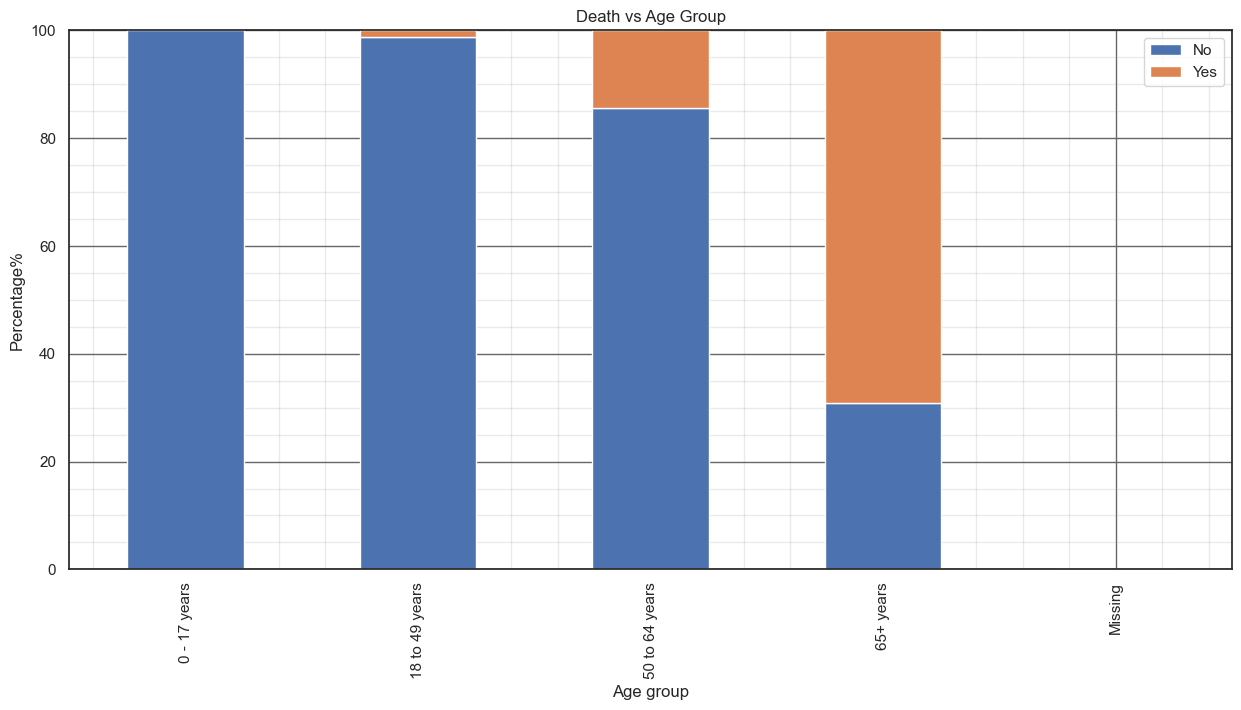

In [60]:
#Using code from the module lab
age_group = pd.unique(data["age_group"].ravel())

# add new column and set values to zero
data['percent'] = 0

#print header
print("age_group")
print("Index \t\t Count")

# for each age group category
for i in age_group:
    
    count = data[data["age_group"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t\t", count)
    
    index_list = data[data['age_group'] == i].index.tolist()
    for ind in index_list:
        data.loc[ind, 'percent'] = count_percentage
        
group = data[['percent','age_group','death_yn']].groupby(['age_group','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Death vs Age Group", figsize=(15,7), grid=True)

# add legend
#red_patch = mpatches.Patch(color='orange', label='Good')
#blue_patch = mpatches.Patch(color='blue', label='Bad')
#my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["No","Yes"])
    
# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Age group")
my_plot.set_ylabel("Percentage%")
my_plot.set_ylim([0,100])

There is a plot to show the relationships between *age_group* and *death_yn* and we found that:
- The proportion of death status does differ significantly between each age group.
- Mortality rates increase significantly with age.
- The survival rate for patients under 17 years of age is essentially 100%. In contrast, the survival rate for patients over 65 years of age is only about 30%. 
- Age and mortality show a clear correlation.

#### *sex* and *death_yn*

sex
Index 		 Count
Male 		 8149
Female 		 8843


(0.0, 100.0)

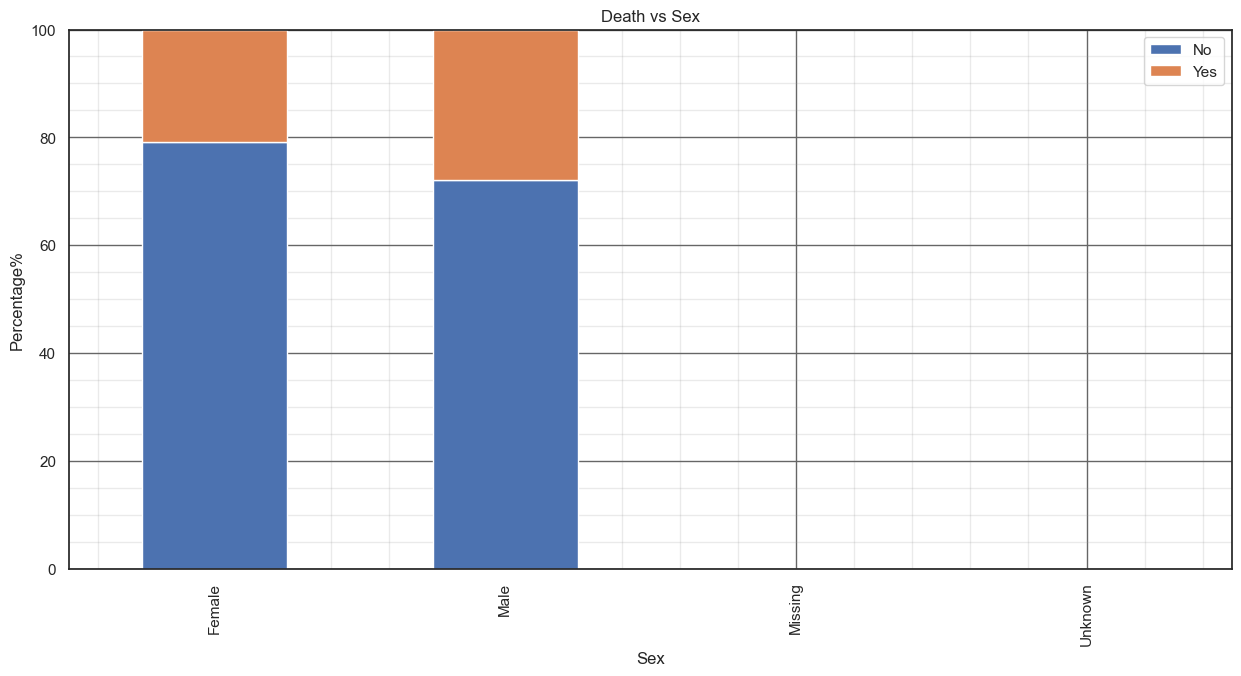

In [61]:
#Using code from the module lab
sex = pd.unique(data["sex"].ravel())

# add new column and set values to zero
data['percent'] = 0

#print header
print("sex")
print("Index \t\t Count")

# for each age group category
for i in sex:
    
    count = data[data["sex"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t\t", count)
    
    index_list = data[data['sex'] == i].index.tolist()
    for ind in index_list:
        data.loc[ind, 'percent'] = count_percentage
        
group = data[['percent','sex','death_yn']].groupby(['sex','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Death vs Sex", figsize=(15,7), grid=True)

# add legend
#red_patch = mpatches.Patch(color='orange', label='Good')
#blue_patch = mpatches.Patch(color='blue', label='Bad')
#my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["No","Yes"])
    
# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Sex")
my_plot.set_ylabel("Percentage%")
my_plot.set_ylim([0,100])

There is a plot to show the relationships between *sex* and *death_yn* and we found that:
- The proportion of death status does differ significantly between female and male.
- The survival rate for female patients is near 80%. In contrast, the survival rate for male patients is about 70%.
- The survival rate of female and male is higher than 70%.
- Sex and mortality show a clear correlation.

#### *race* and *death_yn*

race
Index 				 Count
White 				 10783
Black 				 1853
Unknown 				 1363
Missing 				 2364
Asian 				 440
Multiple/Other 				 126
American Indian/Alaska Native 				 61
Native Hawaiian/Other Pacific Islander 				 2


(0.0, 100.0)

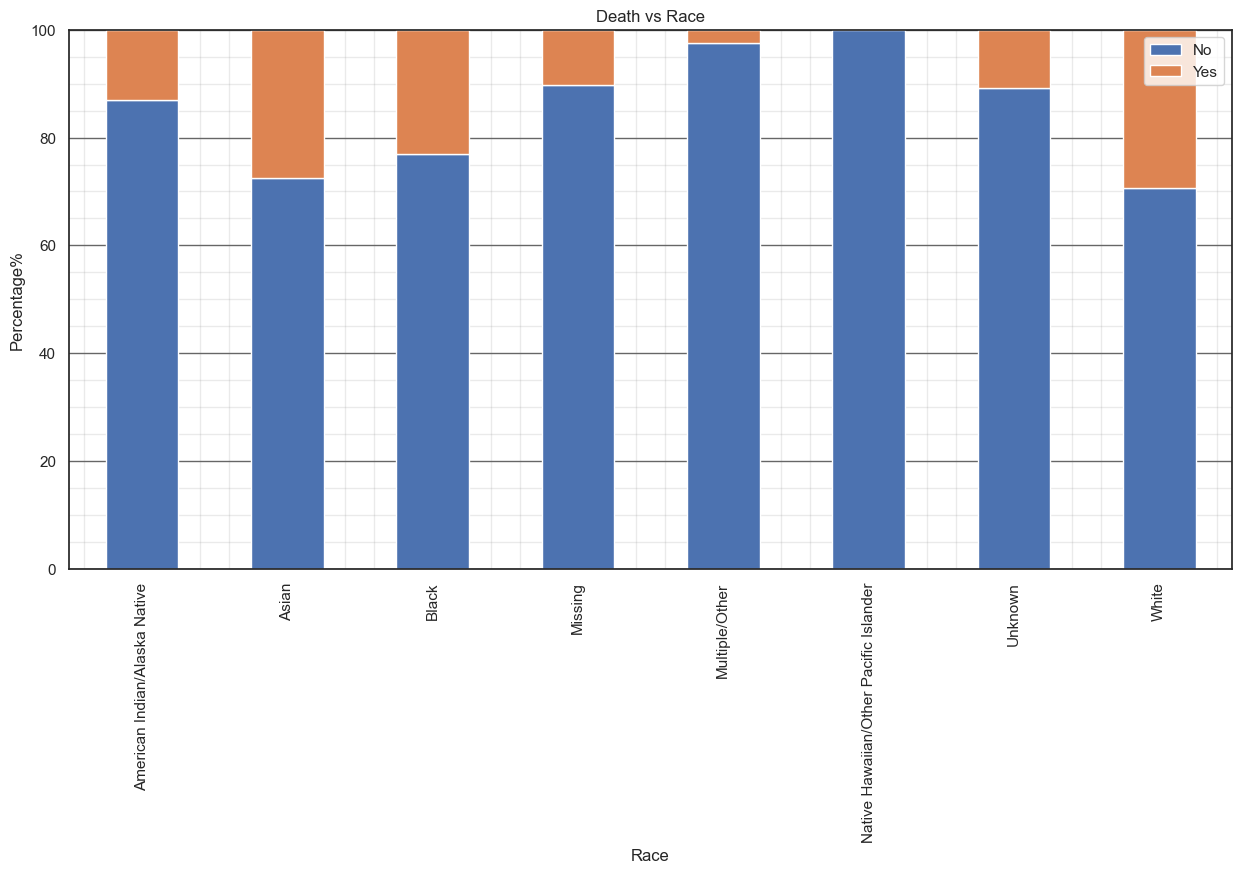

In [62]:
#Using code from the module lab
race = pd.unique(data["race"].ravel())

# add new column and set values to zero
data['percent'] = 0

#print header
print("race")
print("Index \t\t\t\t Count")

# for each age group category
for i in race:
    
    count = data[data["race"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t\t\t\t", count)
    
    index_list = data[data['race'] == i].index.tolist()
    for ind in index_list:
        data.loc[ind, 'percent'] = count_percentage
        
group = data[['percent','race','death_yn']].groupby(['race','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Death vs Race", figsize=(15,7), grid=True)

# add legend
#red_patch = mpatches.Patch(color='orange', label='Good')
#blue_patch = mpatches.Patch(color='blue', label='Bad')
#my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["No", "Yes"])
    
# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Race")
my_plot.set_ylabel("Percentage%")
my_plot.set_ylim([0,100])

There is a plot to show the relationships between *race* and *death_yn* and we found that:
- The proportion of death status does differ significantly between each race.
- The survival rate for patients who is Native Hawaiian/Other Pacific Islander is near 100%. In contrast, the survival rate for patients who us White or Asian is about 70%.
- The survival rate of races shown above is higher than 70%.
- Race and mortality show a clear correlation.

#### *hosp_yn* and *death_yn*

hosp_yn
Index 				 Count
Yes 				 2866
No 				 8455
Missing 				 3697
Unknown 				 1974


(0.0, 100.0)

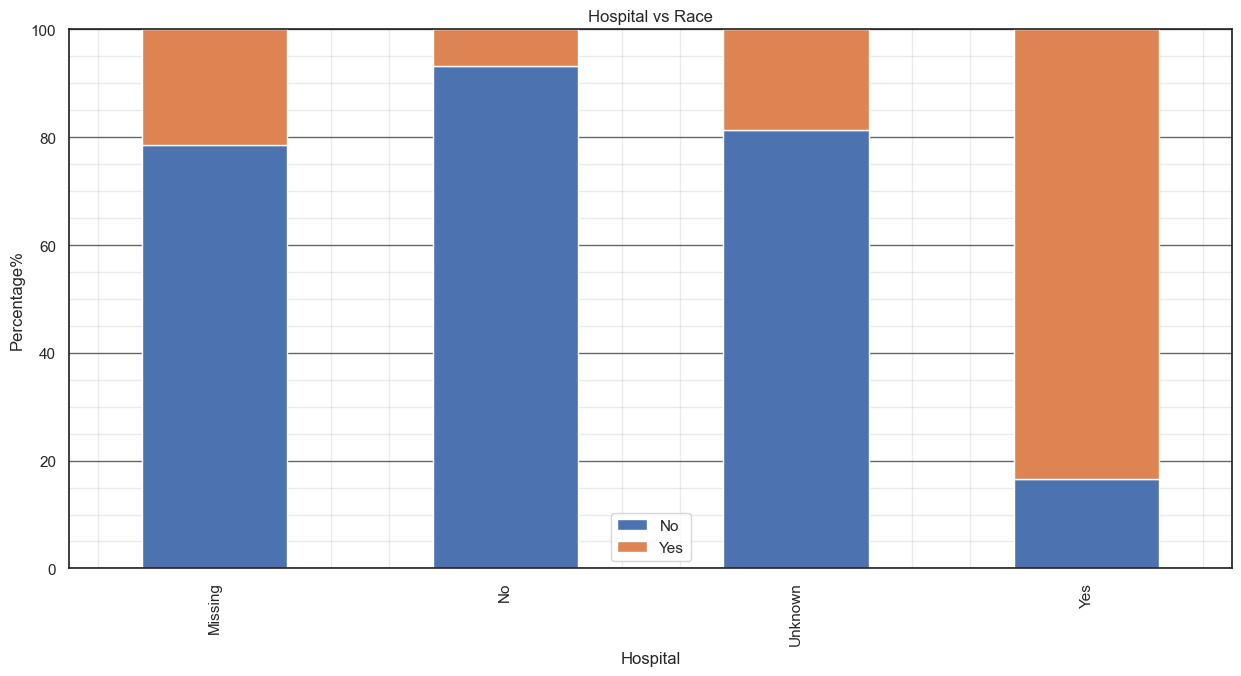

In [63]:
#Using code from the module lab
hosp = pd.unique(data["hosp_yn"].ravel())

# add new column and set values to zero
data['percent'] = 0

#print header
print("hosp_yn")
print("Index \t\t\t\t Count")

# for each age group category
for i in hosp:
    
    count = data[data["hosp_yn"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t\t\t\t", count)
    
    index_list = data[data['hosp_yn'] == i].index.tolist()
    for ind in index_list:
        data.loc[ind, 'percent'] = count_percentage
        
group = data[['percent','hosp_yn','death_yn']].groupby(['hosp_yn','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Hospital vs Race", figsize=(15,7), grid=True)

# add legend
#red_patch = mpatches.Patch(color='orange', label='Good')
#blue_patch = mpatches.Patch(color='blue', label='Bad')
#my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["No", "Yes"])
    
# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Hospital")
my_plot.set_ylabel("Percentage%")
my_plot.set_ylim([0,100])

There is a plot to show the relationships between *hosp_yn* and *death_yn* and we found that:
- Patients who seek medical attention have significantly more severe symptoms and a higher mortality rate.
- In contrast, the survival rate of patients who do not seek medical attention is higher.

In [64]:
#Drop percent feature
data = data.drop(columns = ['percent'], axis = 1)

### - Discuss your findings from the plots above. Do you find any features or feature combinations that are indicative of the target outcome (i.e., churn)? Explain in plain words (a short paragraph) the story of your findings so far.

- Categorical vs Categorical
    - For the above analytics, if a person is a patients, there is no significant relationship between patient's age, race or gender whether patient is symptomatic or not. 
    - There is a strong relationship between mortality and age. The older the patient, the higher the probability of death.
    - There is a obvious relationship between mortality and sex. Female patients have a lower mortality rate. The survival rate for patients who is Native Hawaiian/Other Pacific Islander is near 100%.
    - The rate of death does differ significantly between each race. 
- Continuous vs Continuous
   - Because the data of *case_positive_specimen_interval* and *case_positive_specimen_interval* is concentrated a small range from 0 to 10 and 0 occurs 95% of the total number of times. So I think these features can be considered as constant features. There is no point in analysing them. For this reason, I did not speed much time on that.
- Continuous vs Categorical
   - I did not analytic these. For the reasons given above.



# (4). Transform, extend or combine the existing features to create a few new features (at least 3)

### Aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. Add these features to your clean dataset and save it as a CSV file with a self explanatory name. 

In [65]:
data.head(10)

case_month res_state state_fips_code    res_county county_fips_code  \
0 2020-12-01        SC              45   SPARTANBURG            45083   
1 2021-08-01        FL              12    MIAMI-DADE            12086   
2 2021-01-01        RI              44    PROVIDENCE            44007   
3 2021-01-01        CA               6     SAN DIEGO             6073   
4 2020-12-01        PA              42        BEAVER            42007   
5 2021-01-01        AL               1       BALDWIN             1003   
6 2021-03-01        RI              44    PROVIDENCE            44007   
7 2021-10-01        PA              42  WESTMORELAND            42129   
8 2020-04-01        NY              36         KINGS            36047   
9 2021-01-01        NC              37         ROWAN            37159   

   age_group     sex   race            ethnicity  \
0  65+ years    Male  White  Non-Hispanic/Latino   
1  65+ years    Male  White      Hispanic/Latino   
2  65+ years  Female  White  Non-Hispanic/Latino   
3  65+ years  Female  White  Non-Hispanic/Latino   
4  65+ years  Female  White  Non-Hispanic/Latino   
5  65+ years    Male  White  Non-Hispanic/Latino   
6  65+ years    Male  White  Non-Hispanic/Latino   
7  65+ years    Male  White  Non-Hispanic/Latino   
8  65+ years    Male  Black  Non-Hispanic/Latino   
9  65+ years    Male  White  Non-Hispanic/Latino   

   case_positive_specimen_interval  case_onset_interval  \
0                                0                    0   
1                                0                    0   
2                                0                    0   
3                                0                    0   
4                                0                    0   
5                                0                    0   
6                                0                    0   
7                                0                    0   
8                                0                    0   
9                                0                    0   

              current_status symptom_status  hosp_yn death_yn  
0  Laboratory-confirmed case        Missing      Yes      Yes  
1  Laboratory-confirmed case        Missing       No      Yes  
2  Laboratory-confirmed case        Missing  Missing      Yes  
3  Laboratory-confirmed case    Symptomatic       No      Yes  
4  Laboratory-confirmed case    Symptomatic      Yes      Yes  
5  Laboratory-confirmed case        Missing  Missing      Yes  
6  Laboratory-confirmed case        Missing  Missing      Yes  
7  Laboratory-confirmed case    Symptomatic      Yes      Yes  
8  Laboratory-confirmed case        Unknown      Yes      Yes  
9              Probable Case    Symptomatic  Unknown      Yes

#### New feature 1 : *season*
   - season: Record which season the onset falls into.
   - Based on my review, I found that epidemic virus infections are usually seasonally related.

In America, Spring is from March to May, Summer is from June to August, Autumn is from September to November and Winter is from December to February.

In [66]:
# Add season feature.
conditions = [
    ((data['case_month'].dt.strftime('%m') >= '03') & (data['case_month'].dt.strftime('%m') <= '05')),
    ((data['case_month'].dt.strftime('%m') >= '06') & (data['case_month'].dt.strftime('%m') <= '08')),
    ((data['case_month'].dt.strftime('%m') >= '09') & (data['case_month'].dt.strftime('%m') <= '11')),
    ((data['case_month'].dt.strftime('%m') >= '12') | (data['case_month'].dt.strftime('%m') <= '02'))
]

values = ['Spring', 'Summer', 'Autumn', 'Winter']

data['season'] = np.select(conditions,values)
#Change the data type of season feature
data['season'] = data['season'].astype('category')

In [67]:
#Check for successful modification.
data.head(10)

case_month res_state state_fips_code    res_county county_fips_code  \
0 2020-12-01        SC              45   SPARTANBURG            45083   
1 2021-08-01        FL              12    MIAMI-DADE            12086   
2 2021-01-01        RI              44    PROVIDENCE            44007   
3 2021-01-01        CA               6     SAN DIEGO             6073   
4 2020-12-01        PA              42        BEAVER            42007   
5 2021-01-01        AL               1       BALDWIN             1003   
6 2021-03-01        RI              44    PROVIDENCE            44007   
7 2021-10-01        PA              42  WESTMORELAND            42129   
8 2020-04-01        NY              36         KINGS            36047   
9 2021-01-01        NC              37         ROWAN            37159   

   age_group     sex   race            ethnicity  \
0  65+ years    Male  White  Non-Hispanic/Latino   
1  65+ years    Male  White      Hispanic/Latino   
2  65+ years  Female  White  Non-Hispanic/Latino   
3  65+ years  Female  White  Non-Hispanic/Latino   
4  65+ years  Female  White  Non-Hispanic/Latino   
5  65+ years    Male  White  Non-Hispanic/Latino   
6  65+ years    Male  White  Non-Hispanic/Latino   
7  65+ years    Male  White  Non-Hispanic/Latino   
8  65+ years    Male  Black  Non-Hispanic/Latino   
9  65+ years    Male  White  Non-Hispanic/Latino   

   case_positive_specimen_interval  case_onset_interval  \
0                                0                    0   
1                                0                    0   
2                                0                    0   
3                                0                    0   
4                                0                    0   
5                                0                    0   
6                                0                    0   
7                                0                    0   
8                                0                    0   
9                                0                    0   

              current_status symptom_status  hosp_yn death_yn  season  
0  Laboratory-confirmed case        Missing      Yes      Yes  Winter  
1  Laboratory-confirmed case        Missing       No      Yes  Summer  
2  Laboratory-confirmed case        Missing  Missing      Yes  Winter  
3  Laboratory-confirmed case    Symptomatic       No      Yes  Winter  
4  Laboratory-confirmed case    Symptomatic      Yes      Yes  Winter  
5  Laboratory-confirmed case        Missing  Missing      Yes  Winter  
6  Laboratory-confirmed case        Missing  Missing      Yes  Spring  
7  Laboratory-confirmed case    Symptomatic      Yes      Yes  Autumn  
8  Laboratory-confirmed case        Unknown      Yes      Yes  Spring  
9              Probable Case    Symptomatic  Unknown      Yes  Winter

<AxesSubplot: >

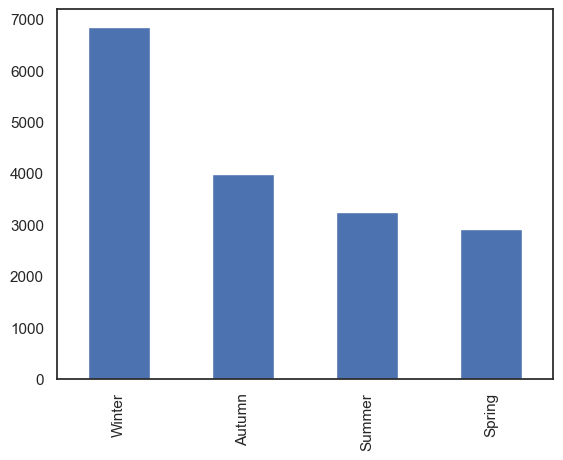

In [68]:
# Plot bar plot to analyze the effect of seasons on disease
data['season'].value_counts().plot(kind='bar')

Season
Index 	 Count
Winter 	 6846
Summer 	 3248
Spring 	 2917
Autumn 	 3981


(0.0, 100.0)

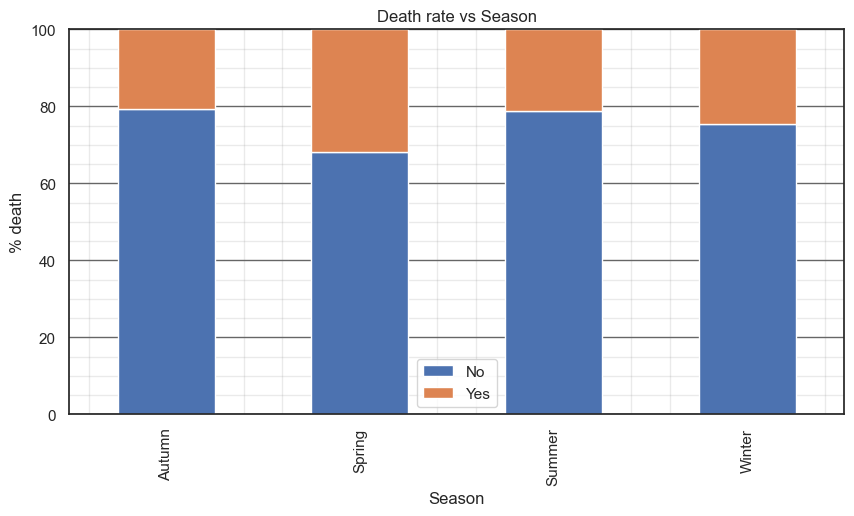

In [69]:
#Using code from the module lab
season = pd.unique(data['season'].ravel())

# add new column and set values to zero
data['percent'] = 0

#print header
print('Season')
print("Index \t Count")

# for each income level
for i in season:
    
    count = data[data['season'] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
    
    # print out index vs count
    print(i, "\t", count)
    
    index_list = data[data['season'] == i].index.tolist()
    for ind in index_list:
        data.loc[ind, 'percent'] = count_percentage
        
group = data[['percent','season','death_yn']].groupby(['season','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Death rate vs Season", figsize=(10,5))

# add legend
my_plot.legend(["No", "Yes"])

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# set labels
my_plot.set_xlabel("Season")
my_plot.set_ylabel("% death")
my_plot.set_ylim([0,100])

There is a plot to show the relationships between *death_yn* and *season* and we found that:
- The death rate does differ significantly between each season.
- The death rate during spring is lowest, about 30%.
- The death rate during other season has little differences and Winter(25%) is slightly lower than Autumn(20%) and Summer(about 20%).
- Season and mortality show a clear correlation.

#### *season* and *death_yn*

Season
Index 	 Count
Winter 	 6846
Summer 	 3248
Spring 	 2917
Autumn 	 3981


(0.0, 100.0)

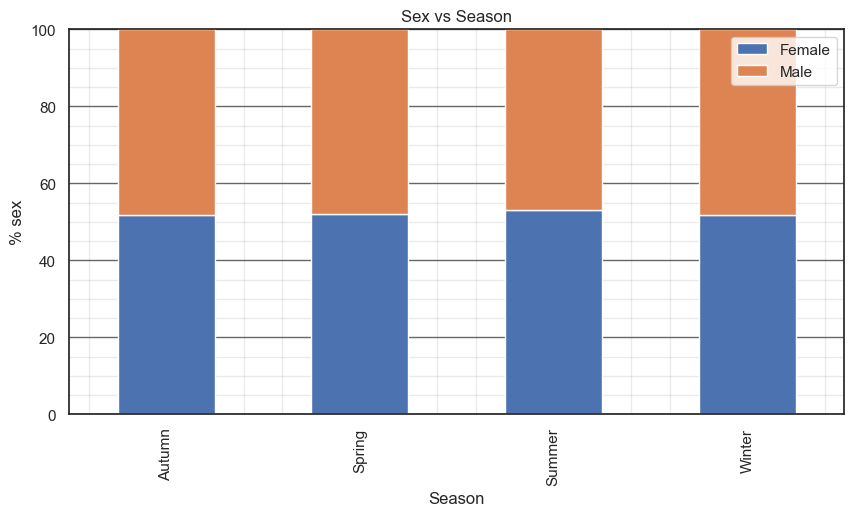

In [70]:
#Using code from the module lab
season = pd.unique(data['season'].ravel())

# add new column and set values to zero
data['percent'] = 0

#print header
print('Season')
print("Index \t Count")

# for each income level
for i in season:
    
    count = data[data['season'] == i].count()['sex']
    count_percentage = (1 / count) * 100
    
    # print out index vs count
    print(i, "\t", count)
    
    index_list = data[data['season'] == i].index.tolist()
    for ind in index_list:
        data.loc[ind, 'percent'] = count_percentage
        
group = data[['percent','season','sex']].groupby(['season','sex']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Sex vs Season", figsize=(10,5))

# add legend
my_plot.legend(["Female", "Male"])

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# set labels
my_plot.set_xlabel("Season")
my_plot.set_ylabel("% sex")
my_plot.set_ylim([0,100])

There is a plot to show the relationships between *sex* and *season* and we found that:
- The incidence is essentially the same across the seasons for both male and female.
- *sex* and *season* do not show clear correlation.

#### New feature 2 : *res_state*
   - Conbine *res_state* and *state_fips_code*. I think these two features are duplicated.

In [71]:
data['res_state'] = data['res_state'].astype('str') + "(" +data['state_fips_code'].astype('str') + ")"
data['res_state'] = data['res_state'].astype('category')
data = data.drop(columns=['state_fips_code'], axis = 1)

#### New feature 3 : *Symptom_severity*
   - *Symptom_severity*: Record the severity of the patient's symptoms.
   - If a patient was symptomatic and was dead, it shows his symptoms are very serious. Note that the cause of the patient's death may not have been due to the symptoms being too severe, there may have been other causes, here simply considered to be the above reason.

In [72]:
# Add symptom_severity feature.
conditions = [
    ((data['symptom_status'] == 'Symptomatic') & (data['death_yn'] == 'Yes')),
    ((data['symptom_status'] == 'Symptomatic') & (data['death_yn'] == 'No')),
    ((data['symptom_status'] == 'Asymptomatic') & (data['death_yn'] == 'Yes')),
    ((data['symptom_status'] == 'Asymptomatic') & (data['death_yn'] == 'No')),
    ((data['symptom_status'] == 'Missing') | (data['symptom_status'] == 'Unknown'))
]

values = ['Severe', 'Mild', 'None', 'None','Unknown']

data['symptom_severity'] = np.select(conditions,values)
#Change the data type of season feature
data['symptom_severity'] = data['symptom_severity'].astype('category')

In [73]:
#check for successful add new feature
data.head(10)

case_month res_state    res_county county_fips_code  age_group     sex  \
0 2020-12-01    SC(45)   SPARTANBURG            45083  65+ years    Male   
1 2021-08-01    FL(12)    MIAMI-DADE            12086  65+ years    Male   
2 2021-01-01    RI(44)    PROVIDENCE            44007  65+ years  Female   
3 2021-01-01     CA(6)     SAN DIEGO             6073  65+ years  Female   
4 2020-12-01    PA(42)        BEAVER            42007  65+ years  Female   
5 2021-01-01     AL(1)       BALDWIN             1003  65+ years    Male   
6 2021-03-01    RI(44)    PROVIDENCE            44007  65+ years    Male   
7 2021-10-01    PA(42)  WESTMORELAND            42129  65+ years    Male   
8 2020-04-01    NY(36)         KINGS            36047  65+ years    Male   
9 2021-01-01    NC(37)         ROWAN            37159  65+ years    Male   

    race            ethnicity  case_positive_specimen_interval  \
0  White  Non-Hispanic/Latino                                0   
1  White      Hispanic/Latino                                0   
2  White  Non-Hispanic/Latino                                0   
3  White  Non-Hispanic/Latino                                0   
4  White  Non-Hispanic/Latino                                0   
5  White  Non-Hispanic/Latino                                0   
6  White  Non-Hispanic/Latino                                0   
7  White  Non-Hispanic/Latino                                0   
8  Black  Non-Hispanic/Latino                                0   
9  White  Non-Hispanic/Latino                                0   

   case_onset_interval             current_status symptom_status  hosp_yn  \
0                    0  Laboratory-confirmed case        Missing      Yes   
1                    0  Laboratory-confirmed case        Missing       No   
2                    0  Laboratory-confirmed case        Missing  Missing   
3                    0  Laboratory-confirmed case    Symptomatic       No   
4                    0  Laboratory-confirmed case    Symptomatic      Yes   
5                    0  Laboratory-confirmed case        Missing  Missing   
6                    0  Laboratory-confirmed case        Missing  Missing   
7                    0  Laboratory-confirmed case    Symptomatic      Yes   
8                    0  Laboratory-confirmed case        Unknown      Yes   
9                    0              Probable Case    Symptomatic  Unknown   

  death_yn  season   percent symptom_severity  
0      Yes  Winter  0.014607          Unknown  
1      Yes  Summer  0.030788          Unknown  
2      Yes  Winter  0.014607          Unknown  
3      Yes  Winter  0.014607           Severe  
4      Yes  Winter  0.014607           Severe  
5      Yes  Winter  0.014607          Unknown  
6      Yes  Spring  0.034282          Unknown  
7      Yes  Autumn  0.025119           Severe  
8      Yes  Spring  0.034282          Unknown  
9      Yes  Winter  0.014607           Severe

#### Show the correlation between *symptom_severity* and *death_yn*

symptom_severity
Index 	 Count
Unknown 	 9032
Severe 	 1706
None 	 276
Mild 	 5978


(0.0, 100.0)

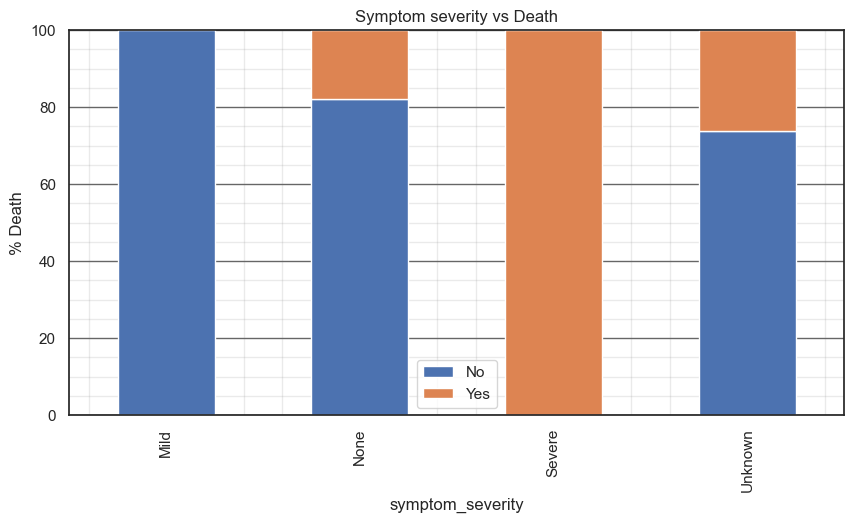

In [74]:
#Using code from the module lab
symptom_severity = pd.unique(data['symptom_severity'].ravel())

# add new column and set values to zero
data['percent'] = 0

#print header
print('symptom_severity')
print("Index \t Count")

# for each income level
for i in symptom_severity:
    
    count = data[data['symptom_severity'] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
    
    # print out index vs count
    print(i, "\t", count)
    
    index_list = data[data['symptom_severity'] == i].index.tolist()
    for ind in index_list:
        data.loc[ind, 'percent'] = count_percentage
        
group = data[['percent','symptom_severity','death_yn']].groupby(['symptom_severity','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Symptom severity vs Death", figsize=(10,5))

# add legend
my_plot.legend(["No", "Yes"])

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# set labels
my_plot.set_xlabel("symptom_severity")
my_plot.set_ylabel("% Death")
my_plot.set_ylim([0,100])

#### *symtom_severity* and *sex*

symptom_severity
Index 	 Count
Unknown 	 9032
Severe 	 1706
None 	 276
Mild 	 5978


(0.0, 100.0)

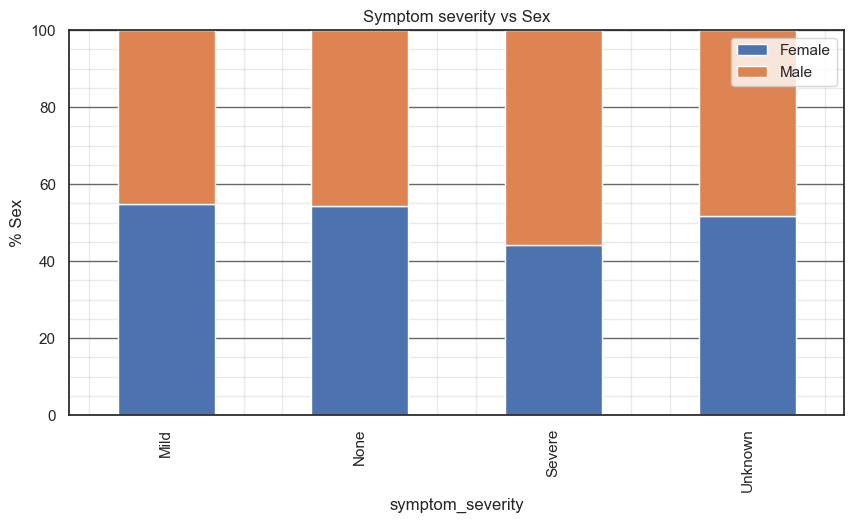

In [75]:
#Using code from the module lab
symptom_severity = pd.unique(data['symptom_severity'].ravel())

# add new column and set values to zero
data['percent'] = 0

#print header
print('symptom_severity')
print("Index \t Count")

# for each income level
for i in symptom_severity:
    
    count = data[data['symptom_severity'] == i].count()['sex']
    count_percentage = (1 / count) * 100
    
    # print out index vs count
    print(i, "\t", count)
    
    index_list = data[data['symptom_severity'] == i].index.tolist()
    for ind in index_list:
        data.loc[ind, 'percent'] = count_percentage
        
group = data[['percent','symptom_severity','sex']].groupby(['symptom_severity','sex']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Symptom severity vs Sex", figsize=(10,5))

# add legend
my_plot.legend(["Female", "Male"])

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# set labels
my_plot.set_xlabel("symptom_severity")
my_plot.set_ylabel("% Sex")
my_plot.set_ylim([0,100])

There is a plot to show the relationships between *symptom_severity* and *sex* and we found that:
- Male patients are more likely to develop severe symptoms than female patients.
- The difference in the probability of mild symptoms between male and female patients is not significant, both at 50%.

#### *symptom_severity* and *age_group*

symptom_severity
Index 	 Count
Unknown 	 9032
Severe 	 1706
None 	 276
Mild 	 5978


(0.0, 100.0)

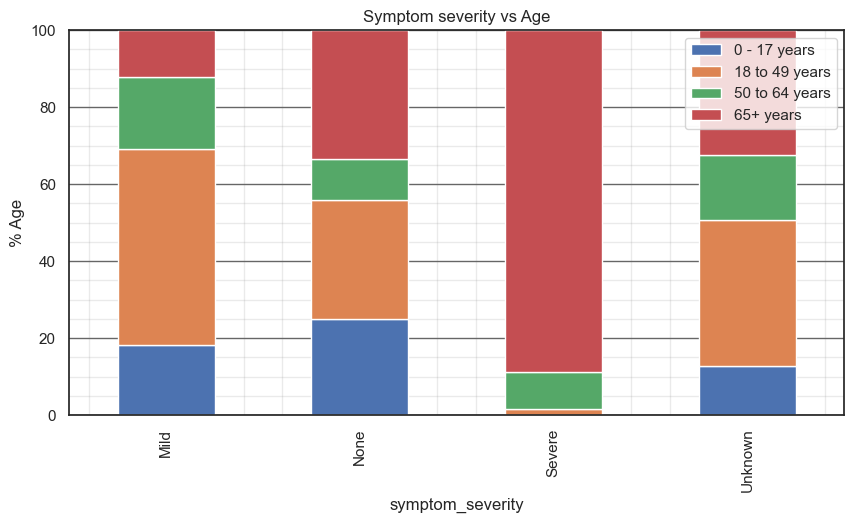

In [76]:
#Using code from the module lab
symptom_severity = pd.unique(data['symptom_severity'].ravel())

# add new column and set values to zero
data['percent'] = 0

#print header
print('symptom_severity')
print("Index \t Count")

# for each income level
for i in symptom_severity:
    
    count = data[data['symptom_severity'] == i].count()['age_group']
    count_percentage = (1 / count) * 100
    
    # print out index vs count
    print(i, "\t", count)
    
    index_list = data[data['symptom_severity'] == i].index.tolist()
    for ind in index_list:
        data.loc[ind, 'percent'] = count_percentage
        
group = data[['percent','symptom_severity','age_group']].groupby(['symptom_severity','age_group']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Symptom severity vs Age", figsize=(10,5))

# add legend
my_plot.legend(["0 - 17 years","18 to 49 years",  "50 to 64 years","65+ years"])

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# set labels
my_plot.set_xlabel("symptom_severity")
my_plot.set_ylabel("% Age")
my_plot.set_ylim([0,100])

There is a plot to show the relationships between *symptom_severity* and *age_group* and we found that:
- The probability of experiencing different levels of symptoms varies by age.
- Approximately 90% of patients with severe symptoms are older than 65 years of age. And there is no patients who are under 17 years old with severe symptoms. 
- Approximately 50% of patients with mild symptoms are over 18 years old and under 49 years old.

In [77]:
#Drop the percent column
data = data.drop(columns = ['percent'], axis = 1)

### Show summary of the dataset

In [78]:
data.shape

(16992, 16)

In [79]:
data.head(10)

case_month res_state    res_county county_fips_code  age_group     sex  \
0 2020-12-01    SC(45)   SPARTANBURG            45083  65+ years    Male   
1 2021-08-01    FL(12)    MIAMI-DADE            12086  65+ years    Male   
2 2021-01-01    RI(44)    PROVIDENCE            44007  65+ years  Female   
3 2021-01-01     CA(6)     SAN DIEGO             6073  65+ years  Female   
4 2020-12-01    PA(42)        BEAVER            42007  65+ years  Female   
5 2021-01-01     AL(1)       BALDWIN             1003  65+ years    Male   
6 2021-03-01    RI(44)    PROVIDENCE            44007  65+ years    Male   
7 2021-10-01    PA(42)  WESTMORELAND            42129  65+ years    Male   
8 2020-04-01    NY(36)         KINGS            36047  65+ years    Male   
9 2021-01-01    NC(37)         ROWAN            37159  65+ years    Male   

    race            ethnicity  case_positive_specimen_interval  \
0  White  Non-Hispanic/Latino                                0   
1  White      Hispanic/Latino                                0   
2  White  Non-Hispanic/Latino                                0   
3  White  Non-Hispanic/Latino                                0   
4  White  Non-Hispanic/Latino                                0   
5  White  Non-Hispanic/Latino                                0   
6  White  Non-Hispanic/Latino                                0   
7  White  Non-Hispanic/Latino                                0   
8  Black  Non-Hispanic/Latino                                0   
9  White  Non-Hispanic/Latino                                0   

   case_onset_interval             current_status symptom_status  hosp_yn  \
0                    0  Laboratory-confirmed case        Missing      Yes   
1                    0  Laboratory-confirmed case        Missing       No   
2                    0  Laboratory-confirmed case        Missing  Missing   
3                    0  Laboratory-confirmed case    Symptomatic       No   
4                    0  Laboratory-confirmed case    Symptomatic      Yes   
5                    0  Laboratory-confirmed case        Missing  Missing   
6                    0  Laboratory-confirmed case        Missing  Missing   
7                    0  Laboratory-confirmed case    Symptomatic      Yes   
8                    0  Laboratory-confirmed case        Unknown      Yes   
9                    0              Probable Case    Symptomatic  Unknown   

  death_yn  season symptom_severity  
0      Yes  Winter          Unknown  
1      Yes  Summer          Unknown  
2      Yes  Winter          Unknown  
3      Yes  Winter           Severe  
4      Yes  Winter           Severe  
5      Yes  Winter          Unknown  
6      Yes  Spring          Unknown  
7      Yes  Autumn           Severe  
8      Yes  Spring          Unknown  
9      Yes  Winter           Severe

In [80]:
# List all features that need to be discussed in the data quality plan
data.nunique()

case_month                           35
res_state                            46
res_county                          848
county_fips_code                   1176
age_group                             4
sex                                   2
race                                  8
ethnicity                             4
case_positive_specimen_interval      11
case_onset_interval                   5
current_status                        2
symptom_status                        4
hosp_yn                               4
death_yn                              2
season                                4
symptom_severity                      4
dtype: int64

In [81]:
# List all features' data type
data.dtypes

case_month                         datetime64[ns]
res_state                                category
res_county                               category
county_fips_code                         category
age_group                                category
sex                                      category
race                                     category
ethnicity                                category
case_positive_specimen_interval             Int64
case_onset_interval                         Int64
current_status                           category
symptom_status                           category
hosp_yn                                  category
death_yn                                 category
season                                   category
symptom_severity                         category
dtype: object

### Save dataset to a new csv file
name: 22205061_homework1_final.csv

In [82]:
data.to_csv('22205061_homework1_final.csv')